<h1 style='font-size:38px; align-item: center; color: #92B24B;'>Classification with an Academic Success Dataset</h1>


<img src="header.png" style="margin: 0 auto; " />


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
from sklearn.preprocessing import LabelEncoder
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,\
                                  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from livelossplot import PlotLossesKerasTF
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)


<h1 style="color: #92B24B;">Reading the data  </h1>

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test  = pd.read_csv('data/test.csv')

In [5]:
#Seeing the head of df_train
df_train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
#Seeing the head of df_test
df_test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,1,2,3,152.1,0,0,0,0,0,0,18,0,0,7,0,0,0.000000,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,19,4,5,116.5,0,0,0,1,0,0,19,0,0,6,7,6,14.857143,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,19,4,9,114.2,0,0,0,1,0,1,18,0,0,6,11,6,12.000000,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,19,3,3,130.0,0,0,0,1,0,1,23,0,2,6,15,5,11.500000,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,37,5,5,106.0,1,0,0,1,0,0,26,0,0,6,9,3,11.000000,0,0,6,9,4,10.666667,2,7.6,2.6,0.32



<h3 style="color: #92B24B;">Seeing the shape of the data</h3>

In [7]:
print('The shape of train data is: ', df_train.shape)
print('The shape of test data is: ', df_test.shape)

The shape of train data is:  (76518, 38)
The shape of test data is:  (51012, 37)


In [8]:
#Seeing the columns
df_train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [9]:
#Let's see the info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [10]:
#Let's see the describtion of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000



<h3 style="color: #92B24B;">Checking for null data </h3>

In [11]:
df_train.isna().sum()
#As we can see, we do not have any null data

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 


<h3 style="color: #92B24B;">Checking for duplicated data</h3>

In [12]:
df_train.duplicated().sum()
#As we can see, we do not have any duplicated data 

0



<h2 style="color: #92B24B;">EDA </h2>

<h3 style="color: #92B24B;">id</h3>

<p style="color: #0E66AD; font-weight: bold;">For id column, we are not goint to keep it as it does not give any meaning</p>

In [13]:
df_train.drop('id', axis=1, inplace=True)

In [14]:
#Checking after dropping the id column
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<hr/>



<h3 style="color: #92B24B;">Marital status</h3>

<ul>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1-</span>
        single
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2-</span>
        married
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3-</span>
        widower
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4-</span>
        divorced
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5-</span>
        facto union
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6-</span>
        legally separated
    </li>
</ul>

In [14]:
df_train['Marital status'].value_counts()

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

In [14]:
enrolled_Marital = df_train.loc[df_train['Target'] == 'Enrolled', 'Marital status'].value_counts()
dropout_Marital = df_train.loc[df_train['Target'] == 'Dropout', 'Marital status'].value_counts()
graduate_Marital= df_train.loc[df_train['Target'] == 'Graduate', 'Marital status'].value_counts()


data_Marital = {
    'Enrolled': enrolled_Marital,
    'Dropout': dropout_Marital,
    'Graduate': graduate_Marital
}

df_Marital = pd.DataFrame(data_Marital)


df_Marital

,Enrolled,Dropout,Graduate
Marital status,,,
1,14036,21726,34427
2,735,2968,1593
3,2,7,7
4,147,509,210
5,13,63,40
6,7,23,5


<hr/>



<h3 style="color: #92B24B;">Application mode</h3>

<ul>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span>
        1st phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span>
        Ordinance No. 612/93
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span>
        1st phase - special contingent (Azores Island)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">7 -</span>
        Holders of other higher courses
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span>
        Ordinance No. 854-B/99
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">15 -</span>
        International student (bachelor)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">16 -</span>
        1st phase - special contingent (Madeira Island)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">17 -</span>
        2nd phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span>
        3rd phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span>
        Ordinance No. 533-A/99, item b2) (Different Plan)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span>
        Ordinance No. 533-A/99, item b3 (Other Institution)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span>
        Over 23 years old
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span>
        Transfer
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span>
        Change of course
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span>
        Technological specialization diploma holders
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">51 -</span>
        Change of institution/course
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">53 -</span>
        Short cycle diploma holders
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">57 -</span>
        Change of institution/course (International)
    </li>
</ul>

In [14]:
df_train['Application mode'].value_counts()

Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64

<hr/>


<h3 style="color: #92B24B;">Application order </h3>

<ul>
    <li>Application order (between 0 - first choice; and 9 last choice)</li>
</ul>


In [15]:
df_train['Application order'].value_counts()

Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64

In [15]:
enrolled_Application = df_train.loc[df_train['Target'] == 'Enrolled', 'Application order'].value_counts()
dropout_Application = df_train.loc[df_train['Target'] == 'Dropout', 'Application order'].value_counts()
graduate_Application = df_train.loc[df_train['Target'] == 'Graduate', 'Application order'].value_counts()


data_Application = {
    'Enrolled': enrolled_Application,
    'Dropout': dropout_Application,
    'Graduate': graduate_Application
}

df_Application = pd.DataFrame(data_Application)


df_Application

,Enrolled,Dropout,Graduate
Application order,,,
0,NaN,2.0,1.0
1,11203.0,19829.0,23349.0
2,1726.0,2372.0,4777.0
3,919.0,1142.0,3303.0
4,470.0,865.0,2487.0
5,385.0,764.0,976.0
6,236.0,322.0,1389.0
9,1.0,NaN,NaN


<hr/>


<h3 style="color: #92B24B;">Course</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">33 -</span> Biofuel Production Technologies </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">171 -</span> Animation and Multimedia Design </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">8014 -</span> Social Service (evening attendance) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9003 -</span> Agronomy </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9070 -</span> Communication Design </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9085 -</span> Veterinary Nursing </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9119 -</span> Informatics Engineering </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9130 -</span> Equinculture </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9147 -</span> Management </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9238 -</span> Social Service </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9254 -</span> Tourism </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9500 -</span> Nursing </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9556 -</span> Oral Hygiene </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9670 -</span> Advertising and Marketing Management </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9773 -</span> Journalism and Communication </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9853 -</span> Basic Education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9991 -</span> Management (evening attendance) </li> </ul>

In [16]:
df_train['Course'].value_counts()

Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64

<Axes: xlabel='Course'>

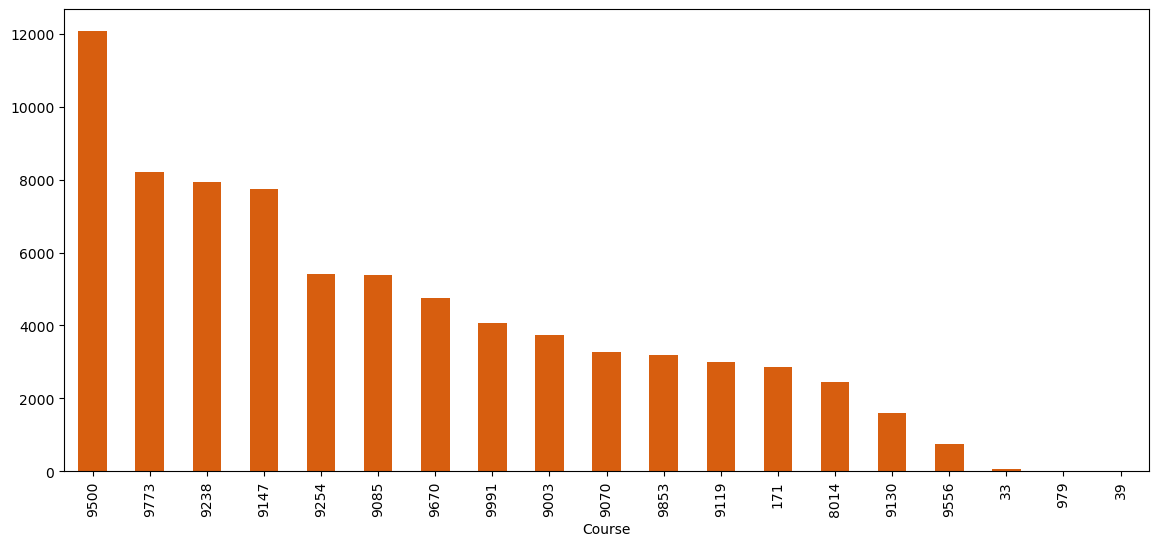

In [17]:
df_train['Course'].value_counts().plot(kind='bar', figsize=(14, 6), color='#D75E0F')

In [16]:
enrolled_Course = df_train.loc[df_train['Target'] == 'Enrolled', 'Course'].value_counts()
dropout_Course= df_train.loc[df_train['Target'] == 'Dropout', 'Course'].value_counts()
graduate_Course= df_train.loc[df_train['Target'] == 'Graduate', 'Course'].value_counts()


data_Course = {
    'Enrolled': enrolled_Course,
    'Dropout': dropout_Course,
    'Graduate': graduate_Course
}

df_Course = pd.DataFrame(data_Course)


df_Course

,Enrolled,Dropout,Graduate
Course,,,
33,10.0,54,8.0
39,NaN,1,NaN
171,208.0,2037,614.0
979,NaN,1,NaN
8014,257.0,1017,1164.0
9003,728.0,1962,1043.0
9070,487.0,691,2103.0
9085,1366.0,1741,2266.0
9119,1058.0,1797,149.0


<hr/>



<h3 style="color: #92B24B;">Daytime/evening attendance</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Daytime
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> Evening
  </li>
</ul>

In [18]:
df_train['Daytime/evening attendance'].value_counts()

Daytime/evening attendance
1    70038
0     6480
Name: count, dtype: int64

<Axes: ylabel='count'>

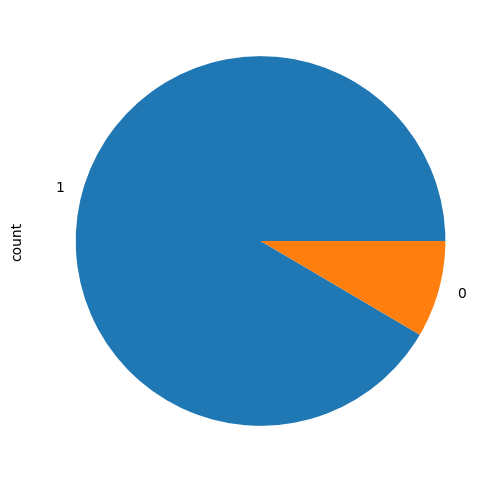

In [19]:
df_train['Daytime/evening attendance'].value_counts().plot(kind='pie', figsize=(14, 6))

In [17]:
enrolled_attendance = df_train.loc[df_train['Target'] == 'Enrolled', 'Daytime/evening attendance'].value_counts()
dropout_attendance = df_train.loc[df_train['Target'] == 'Dropout', 'Daytime/evening attendance'].value_counts()
graduate_attendance = df_train.loc[df_train['Target'] == 'Graduate', 'Daytime/evening attendance'].value_counts()


data_attendance = {
    'Enrolled': enrolled_attendance,
    'Dropout': dropout_attendance,
    'Graduate': graduate_attendance
}

df_attendance = pd.DataFrame(data_attendance)


df_attendance

,Enrolled,Dropout,Graduate
Daytime/evening attendance,,,
1,13928,21853,34257
0,1012,3443,2025


<hr/>


<h3 style="color: #92B24B;">Previous qualification</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher education - bachelor's degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher education - degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher education - master's </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher education - doctorate </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of higher education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">15 -</span> 10th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic education 3rd cycle (9th/10th/11th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic education 2nd cycle (6th/7th/8th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher education - master (2nd cycle) </li> </ul>

<hr/>



<h3 style="color: #92B24B;">Previous qualification (grade)</h3>


<li style="color: #0E66AD; font-weight: bold;">Grade of previous qualification (between 0 and 200)</li>

<hr/>

<h3 style="color: #92B24B;">Nacionality</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Portuguese </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> German </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Spanish </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> Italian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">13 -</span> Dutch </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> English </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">17 -</span> Lithuanian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">21 -</span> Angolan </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Cape Verdean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">24 -</span> Guinean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">25 -</span> Mozambican </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> Santomean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">32 -</span> Turkish </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Brazilian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">62 -</span> Romanian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">100 -</span> Moldova (Republic of) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">101 -</span> Mexican </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">103 -</span> Ukrainian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">105 -</span> Russian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">108 -</span> Cuban </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">109 -</span> Colombian </li> </ul>

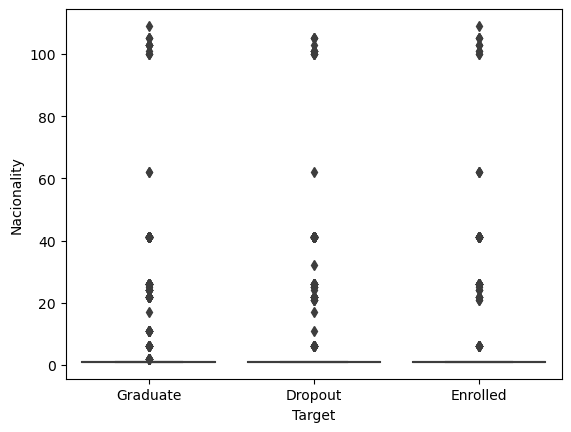

In [79]:
sns.boxplot(y='Nacionality', x='Target',data=df_train)
plt.show()

In [19]:
df_train['Nacionality'].value_counts()

Nacionality
1      76013
41       221
26        67
6         56
22        56
24        15
11        15
2         13
103       12
105        9
101        9
100        9
21         6
25         6
62         6
17         2
109        2
32         1
Name: count, dtype: int64

<Axes: xlabel='Nacionality'>

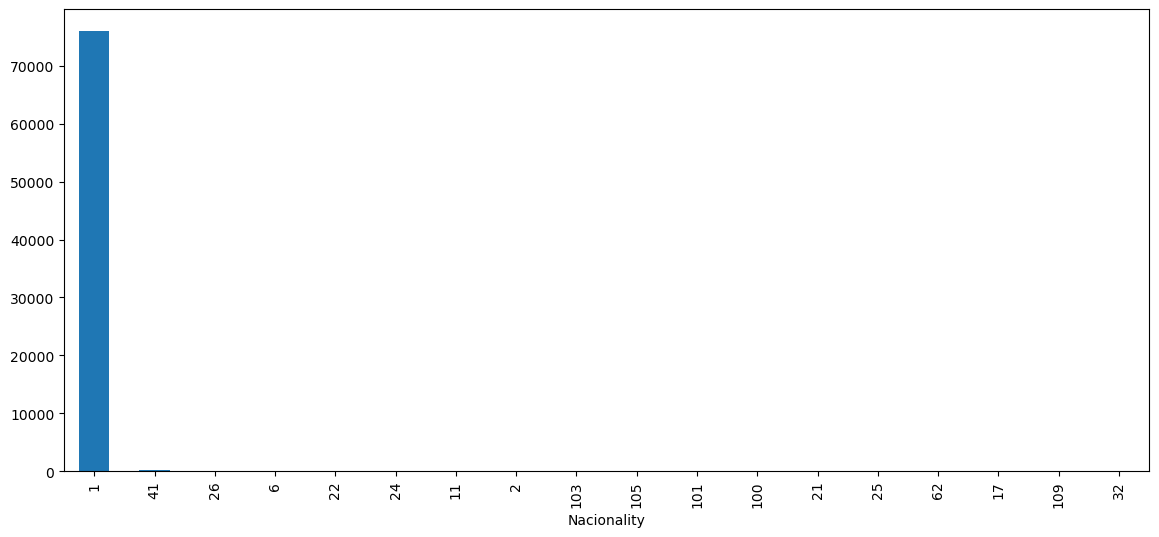

In [18]:
df_train['Nacionality'].value_counts().plot(kind='bar', figsize=(14, 6))

<hr/>

<h3 style="color: #92B24B;">Mother's qualification</h3>

<ul> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary Education - 12th Year of Schooling or Eq. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher Education - Bachelor's Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher Education - Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher Education - Master's </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher Education - Doctorate </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of Higher Education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> 7th Year (Old) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span> General commerce course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Technical-professional course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> 7th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span> 2nd cycle of the general high school course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">29 -</span> 9th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">30 -</span> 8th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">34 -</span> Unknown </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">35 -</span> Can't read or write </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">36 -</span> Can read without having a 4th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">37 -</span> Basic education 1st cycle (4th/5th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Specialized higher studies course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher Education - Master (2nd cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span> Higher Education - Doctorate (3rd cycle)
</ul>

<hr/>

<h3 style="color: #92B24B;">Father's qualification</h3>

<ul> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary Education - 12th Year of Schooling or Eq. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher Education - Bachelor's Degree </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher Education - Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher Education - Master's </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher Education - Doctorate </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of Higher Education </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th Year of Schooling - Not Completed </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th Year of Schooling - Not Completed </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> 7th Year (Old) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th Year of Schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span> General commerce course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Technical-professional course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> 7th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span> 2nd cycle of the general high school course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">29 -</span> 9th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">30 -</span> 8th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">34 -</span> Unknown </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">35 -</span> Can't read or write </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">36 -</span> Can read without having a 4th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">37 -</span> Basic education 1st cycle (4th/5th year) or equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Specialized higher studies course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher Education - Master (2nd cycle) </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span> Higher Education - Doctorate (3rd cycle) 
</ul>

<hr/>

<h3 style="color: #92B24B;">Mother's occupation</h3>

<ul> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> Student </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Specialists in Intellectual and Scientific Activities </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Intermediate Level Technicians and Professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Administrative staff </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Personal Services, Security and Safety Workers and Sellers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Farmers and Skilled Workers in Agriculture, Fisheries and Forestry </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">7 -</span> Skilled Workers in Industry, Construction and Craftsmen </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">8 -</span> Installation and Machine Operators and Assembly Workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> Unskilled Workers </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> Armed Forces Professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">90 -</span> Other Situation </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">99 -</span> (blank) </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">122 -</span> Health professionals </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">123 -</span> teachers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">125 -</span> Specialists in information and communication technologies (ICT) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">131 -</span> Intermediate level science and engineering technicians and professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">132 -</span> Technicians and professionals, of intermediate level of health </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">134 -</span> Intermediate level technicians from legal, social, sports, cultural and similar services </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">141 -</span> Office workers, secretaries in general and data processing operators </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">143 -</span> Data, accounting, statistical, financial services and registry-related operators </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">144 -</span> Other administrative support staff </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">151 -</span> personal service workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">152 -</span> sellers </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">153 -</span> Personal care workers and the like </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">171 -</span> Skilled construction workers and the like, except electricians </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">173 -</span> Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">175 -</span> Workers in food processing, woodworking, clothing and other industries and crafts </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">191 -</span> cleaning workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">192 -</span> Unskilled workers in agriculture, animal production, fisheries and forestry </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">193 -</span> Unskilled workers in extractive industry, construction, manufacturing and transport </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">194 -</span> Meal preparation assistants </li> 

</ul>

<hr/>

<h3 style="color: #92B24B;">Father's occupation</h3>

<ul> <li>0 - Student</li> <li>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers</li> <li>2 - Specialists in Intellectual and Scientific Activities</li> <li>3 - Intermediate Level Technicians and Professions</li> <li>4 - Administrative staff</li> <li>5 - Personal Services, Security and Safety Workers and Sellers</li> <li>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry</li> <li>7 - Skilled Workers in Industry, Construction and Craftsmen</li> <li>8 - Installation and Machine Operators and Assembly Workers</li> <li>9 - Unskilled Workers</li> <li>10 - Armed Forces Professions</li> <li>90 - Other Situation</li> <li>99 - (blank)</li> <li>101 - Armed Forces Officers</li> <li>102 - Armed Forces Sergeants</li> <li>103 - Other Armed Forces personnel</li> <li>112 - Directors of administrative and commercial services</li> <li>114 - Hotel, catering, trade and other services directors</li> <li>121 - Specialists in the physical sciences, mathematics, engineering and related techniques</li> <li>122 - Health professionals</li> <li>123 - teachers</li> <li>124 - Specialists in finance, accounting, administrative organization, public and commercial relations</li> <li>131 - Intermediate level science and engineering technicians and professions</li> <li>132 - Technicians and professionals, of intermediate level of health</li> <li>134 - Intermediate level technicians from legal, social, sports, cultural and similar services</li> <li>135 - Information and communication technology technicians</li> <li>141 - Office workers, secretaries in general and data processing operators</li> <li>143 - Data, accounting, statistical, financial services and registry-related operators</li> <li>144 - Other administrative support staff</li> <li>151 - personal service workers</li> <li>152 - sellers</li> <li>153 - Personal care workers and the like</li> <li>154 - Protection and security services personnel</li> <li>161 - Market-oriented farmers and skilled agricultural and animal production workers</li> <li>163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence</li> <li>171 - Skilled construction workers and the like, except electricians</li> <li>172 - Skilled workers in metallurgy, metalworking and similar</li> <li>174 - Skilled workers in electricity and electronics</li> <li>175 - Workers in food processing, woodworking, clothing and other industries and crafts</li> <li>181 - Fixed plant and machine operators</li> <li>182 - assembly workers</li> <li>183 - Vehicle drivers and mobile equipment operators</li> <li>192 - Unskilled workers in agriculture, animal production, fisheries and forestry</li> <li>193 - Unskilled workers in extractive industry, construction, manufacturing and transport</li> <li>194 - Meal preparation assistants</li> <li>195 - Street vendors (except food) and street service providers</li> </ul>

<hr/>

<h3 style="color: #92B24B;">Admission grade</h3>

<li style="color: #0E66AD; font-weight: bold;">Admission grade (between 0 and 200)</li>

In [20]:
df_train['Admission grade'].value_counts()

Admission grade
120.0    2995
130.0    2704
140.0    2623
100.0    1683
110.0    1482
         ... 
149.1       1
164.7       1
111.2       1
178.6       1
165.9       1
Name: count, Length: 668, dtype: int64

In [21]:
df_train[['Admission grade', 'Target']]

,Admission grade,Target
0,122.6,Graduate
1,119.8,Dropout
2,144.7,Dropout
3,126.1,Enrolled
4,120.1,Graduate
...,...,...
76513,116.5,Graduate
76514,131.6,Graduate
76515,123.3,Enrolled
76516,124.8,Dropout


<Axes: title={'center': 'Admission grade'}, xlabel='[Target]'>

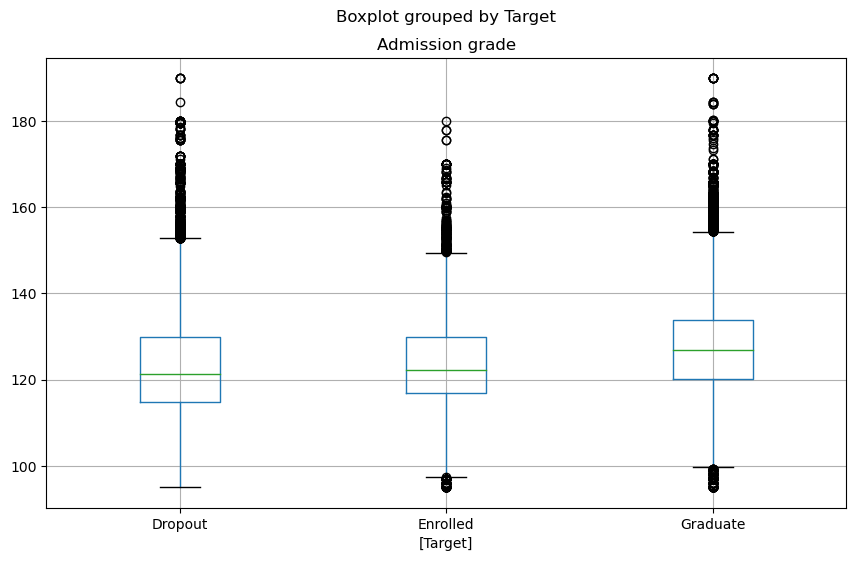

In [22]:
df_train[['Admission grade', 'Target']].boxplot(by='Target', figsize=(10, 6))

In [23]:
print('The mean of is: Admission grade', df_train['Admission grade'].mean())
print('The min of is: Admission grade', df_train['Admission grade'].min())
print('The max of is: Admission grade', df_train['Admission grade'].max())

The mean of is: Admission grade 125.36397139281887
The min of is: Admission grade 95.0
The max of is: Admission grade 190.0


In [24]:
print('Number of students who Graduated and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Dropout')].shape[0] )


Number of students who Graduated and have Admission grade more than the mean or equal it (125.0) is:  21288
Number of students who Enrolled and have Admission grade more than the mean or equal it (125.0) is:  5845
Number of students who Dropout and have Admission grade more than the mean or equal it (125.0) is:  10475


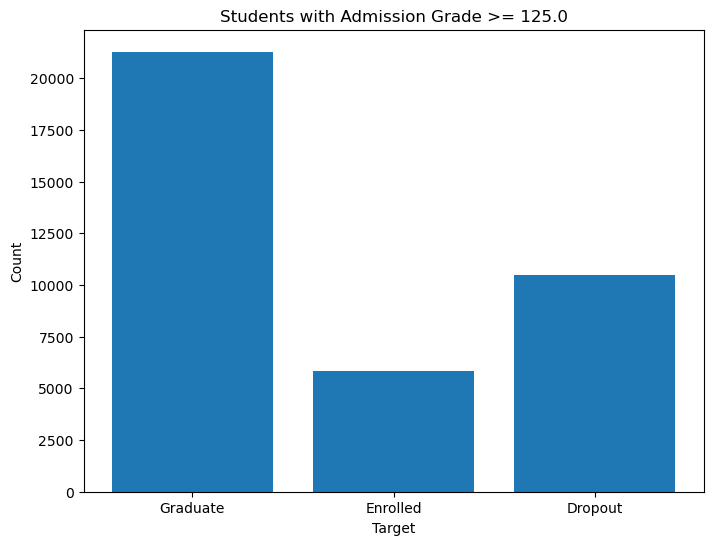

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df_train'
df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade >= 125.0')

# Display the chart
plt.show()

In [26]:
print('Number of students who Graduated and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Dropout')].shape[0] )


Number of students who Graduated and have Admission grade less than the mean or equal it (125.0) is:  15239
Number of students who Enrolled and have Admission grade less than the mean or equal it (125.0) is:  9217
Number of students who Dropout and have Admission grade less than the mean or equal it (125.0) is:  14921


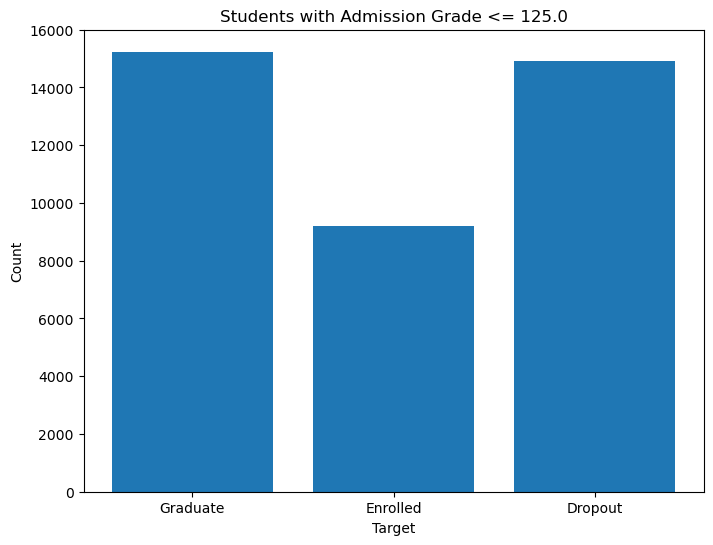

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df_train'
df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade <= 125.0')

# Display the chart
plt.show()

In [28]:
print('Number of students who Graduated and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Dropout')].shape[0] )

Number of students who Graduated and have Admission grade less than the min or equal it (95.0) is:  61
Number of students who Enrolled and have Admission grade less than the min or equal it (95.0) is:  37
Number of students who Dropout and have Admission grade less than the min or equal it (95.0) is:  196


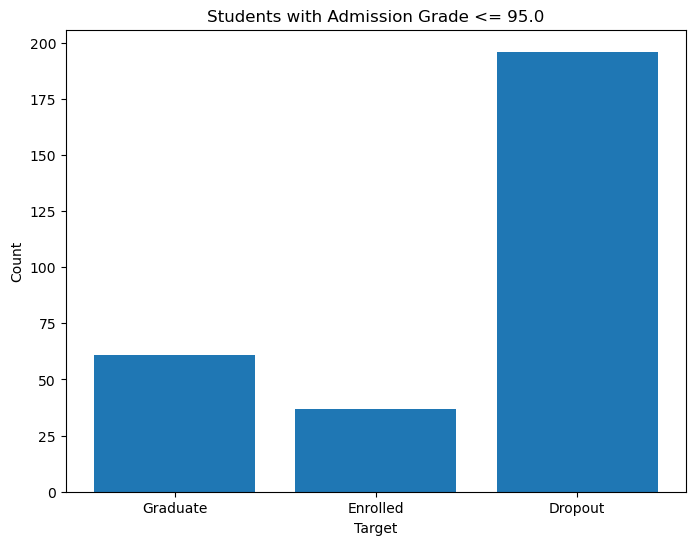

In [29]:

df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade <= 95.0')

# Display the chart
plt.show()

<hr/>

<h3 style="color: #92B24B;">Displaced</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>


<Axes: ylabel='count'>

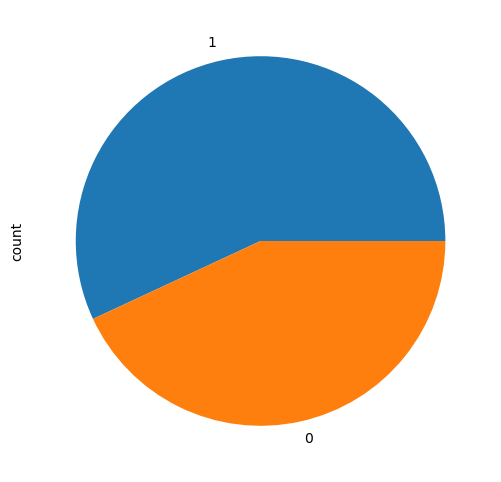

In [30]:
df_train['Displaced'].value_counts().plot(kind='pie', figsize=(14, 6))

In [31]:
enrolled_displaced = df_train.loc[df_train['Target'] == 'Enrolled', 'Displaced'].value_counts()
dropout_displaced = df_train.loc[df_train['Target'] == 'Dropout', 'Displaced'].value_counts()
graduate_displaced = df_train.loc[df_train['Target'] == 'Graduate', 'Displaced'].value_counts()


data = {
    'Enrolled': enrolled_displaced,
    'Dropout': dropout_displaced,
    'Graduate': graduate_displaced
}

df = pd.DataFrame(data)


df

,Enrolled,Dropout,Graduate
Displaced,,,
0,6400,13431,13128
1,8540,11865,23154


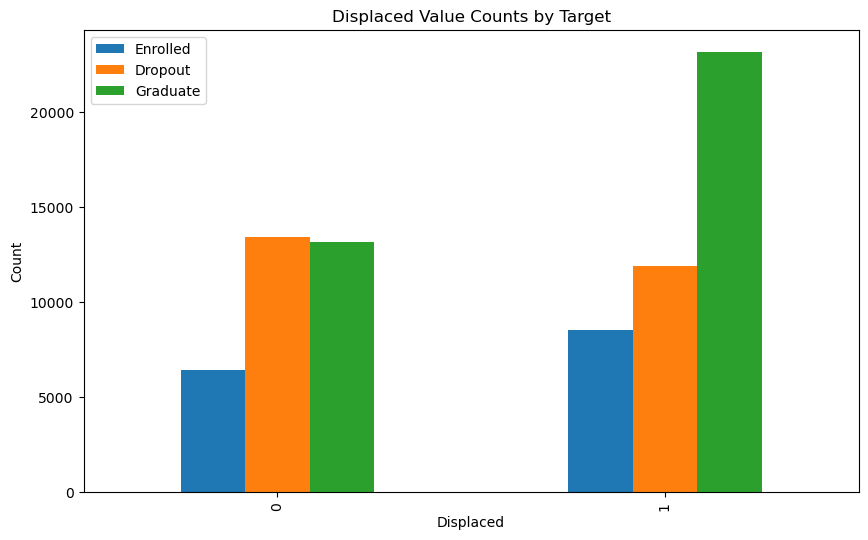

In [32]:
df.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Displaced')
plt.ylabel('Count')
plt.title('Displaced Value Counts by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Educational special needs</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [33]:
df_train['Educational special needs'].value_counts()

Educational special needs
0    76232
1      286
Name: count, dtype: int64

<Axes: xlabel='Educational special needs'>

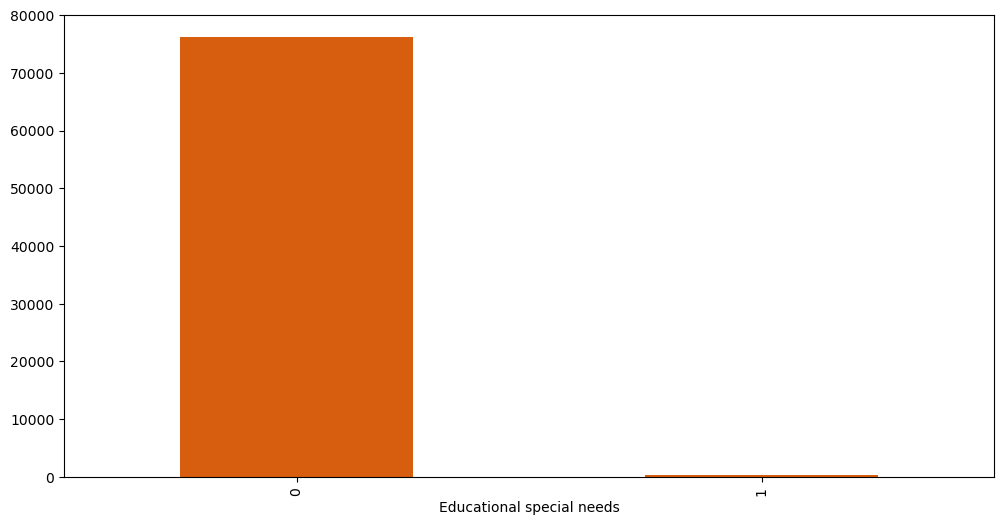

In [34]:
df_train['Educational special needs'].value_counts().plot(kind='bar', figsize=(12, 6), color='#D75E0F')

In [35]:

graduate_edu_needs = df_train.loc[df_train['Target'] == 'Graduate', 'Educational special needs'].value_counts()
enrolled_edu_needs = df_train.loc[df_train['Target'] == 'Enrolled', 'Educational special needs'].value_counts()
dropout_edu_needs = df_train.loc[df_train['Target'] == 'Dropout', 'Educational special needs'].value_counts()


data2 = {
    'Graduate': graduate_edu_needs,
    'Enrolled': enrolled_edu_needs,
    'Dropout': dropout_edu_needs
}

df2 = pd.DataFrame(data2)


df2

,Graduate,Enrolled,Dropout
Educational special needs,,,
0,36149,14881,25202
1,133,59,94


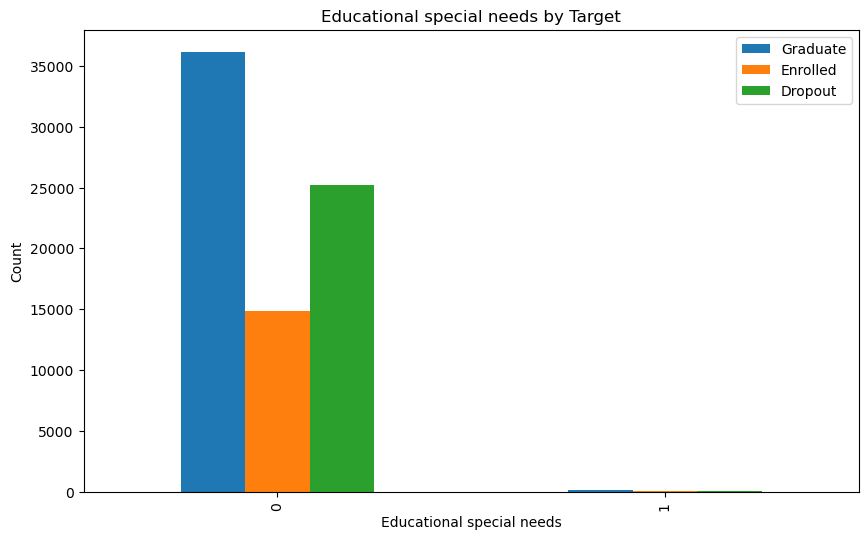

In [36]:
df2.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Educational special needs')
plt.ylabel('Count')
plt.title('Educational special needs by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Debtor</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [37]:
df_train['Debtor'].value_counts()

Debtor
0    71056
1     5462
Name: count, dtype: int64

<Axes: ylabel='count'>

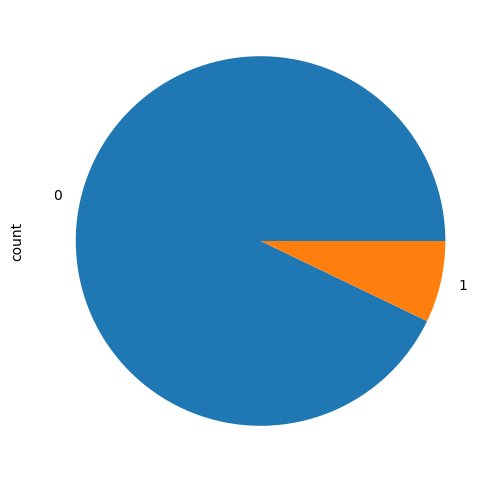

In [38]:
df_train['Debtor'].value_counts().plot(kind='pie', figsize=(6,6))

In [39]:
graduate_debtor = df_train.loc[df_train['Target'] == 'Graduate', 'Debtor'].value_counts()
enrolled_debtor = df_train.loc[df_train['Target'] == 'Enrolled', 'Debtor'].value_counts()
dropout_debtor = df_train.loc[df_train['Target'] == 'Dropout', 'Debtor'].value_counts()


data3 = {
    'Graduate': graduate_debtor,
    'Enrolled': enrolled_debtor,
    'Dropout': dropout_debtor
}
df3 = pd.DataFrame(data3)

df3

,Graduate,Enrolled,Dropout
Debtor,,,
0,35652,14287,21117
1,630,653,4179


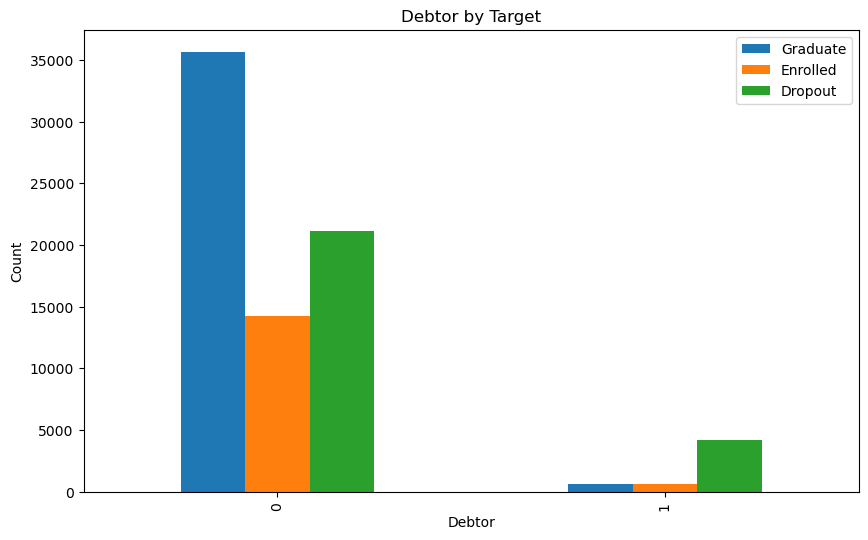

In [40]:
df3.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Debtor')
plt.ylabel('Count')
plt.title('Debtor by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Tuition fees up to date</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [41]:
df_train['Tuition fees up to date'].value_counts()

Tuition fees up to date
1    68380
0     8138
Name: count, dtype: int64

In [42]:

graduate_tuition_fees = df_train.loc[df_train['Target'] == 'Graduate', 'Tuition fees up to date'].value_counts()
enrolled_tuition_fees = df_train.loc[df_train['Target'] == 'Enrolled', 'Tuition fees up to date'].value_counts()
dropout_tuition_fees = df_train.loc[df_train['Target'] == 'Dropout', 'Tuition fees up to date'].value_counts()


data4 = {
    'Graduate': graduate_tuition_fees,
    'Enrolled': enrolled_tuition_fees,
    'Dropout': dropout_tuition_fees
}

df4 = pd.DataFrame(data4)

df4

,Graduate,Enrolled,Dropout
Tuition fees up to date,,,
1,36152,14577,17651
0,130,363,7645


<hr/>

<h3 style="color: #92B24B;">Gender</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> male
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> female
  </li>
</ul>

<Axes: xlabel='Gender'>

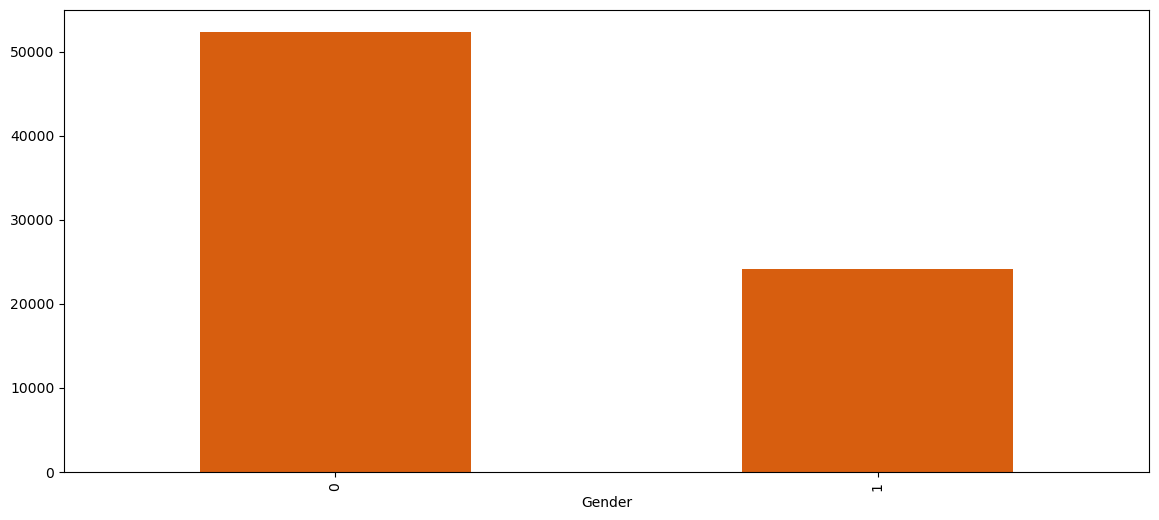

In [43]:
df_train['Gender'].value_counts().plot(kind='bar',figsize=(14,6), color='#D75E0F')

In [44]:

graduate_gender = df_train.loc[df_train['Target'] == 'Graduate', 'Gender'].value_counts()
enrolled_gender = df_train.loc[df_train['Target'] == 'Enrolled', 'Gender'].value_counts()
dropout_gender = df_train.loc[df_train['Target'] == 'Dropout', 'Gender'].value_counts()


data5 = {
    'Graduate': graduate_gender,
    'Enrolled': enrolled_gender,
    'Dropout': dropout_gender
}
df5 = pd.DataFrame(data5)

df5

,Graduate,Enrolled,Dropout
Gender,,,
0,30232,9804,12316
1,6050,5136,12980


<hr/>

<h3 style="color: #92B24B;">Scholarship holder</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [45]:
df_train['Scholarship holder'].value_counts()

Scholarship holder
0    57588
1    18930
Name: count, dtype: int64

<Axes: ylabel='count'>

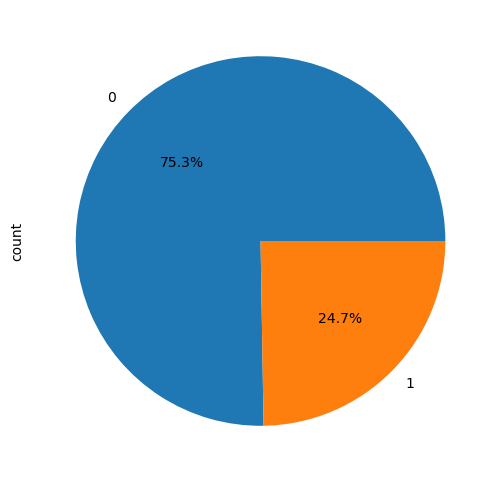

In [46]:
df_train['Scholarship holder'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6,6))

In [47]:

graduate_scholarship = df_train.loc[df_train['Target'] == 'Graduate','Scholarship holder'].value_counts()
enrolled_scholarship = df_train.loc[df_train['Target'] == 'Enrolled', 'Scholarship holder'].value_counts()
dropout_scholarship = df_train.loc[df_train['Target'] == 'Dropout', 'Scholarship holder'].value_counts()


data6 = {
    'Graduate': graduate_scholarship,
    'Enrolled': enrolled_scholarship,
    'Dropout': dropout_scholarship
}
df6 = pd.DataFrame(data6)

df6

,Graduate,Enrolled,Dropout
Scholarship holder,,,
0,20692,12949,23947
1,15590,1991,1349


<hr/>


<h3 style="color: #92B24B;"> Age at enrollment</h3>


<li style="color: #0E66AD; font-weight: bold;">Age of studend at enrollment</li>

<Axes: >

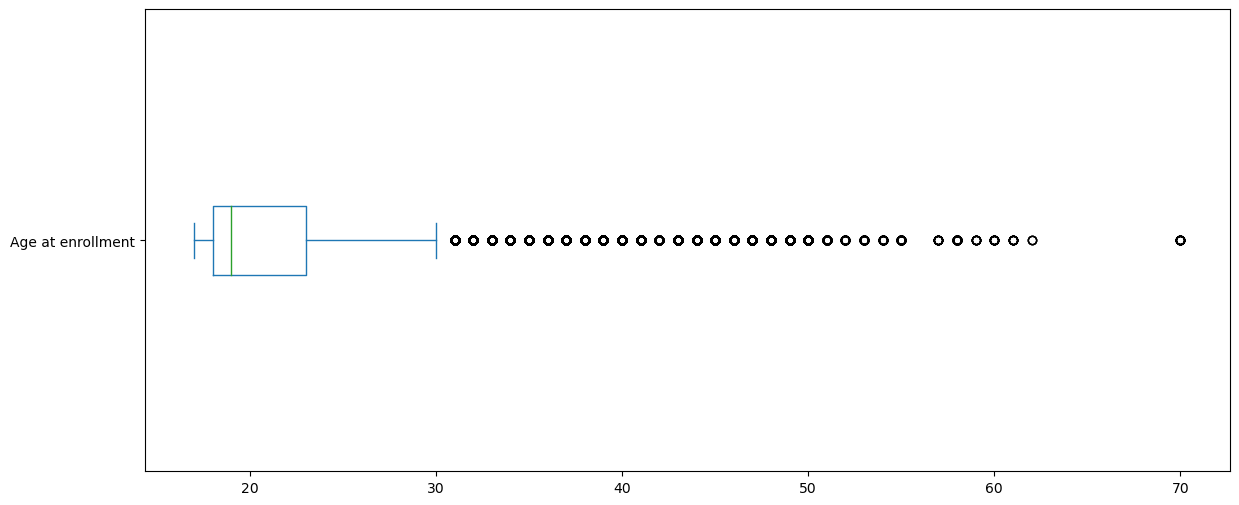

In [48]:
df_train['Age at enrollment'].plot(kind='box', vert=False, figsize=(14,6))

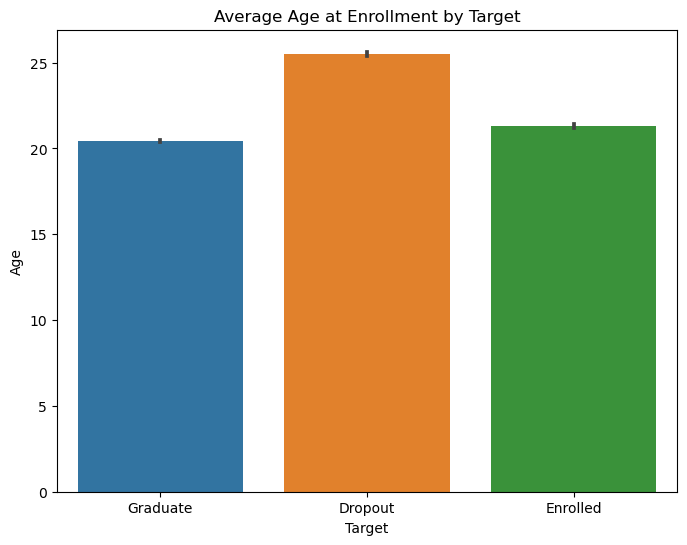

In [49]:

plt.figure(figsize=(8, 6))
sns.barplot(x='Target', y='Age at enrollment', data=df_train)
plt.title('Average Age at Enrollment by Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

In [50]:
print('The mean of Age at enrollemnt is: ', df_train['Age at enrollment'].mean())
print('The min of Age at enrollemnt is: ', df_train['Age at enrollment'].min())
print('The max of Age at enrollemnt is: ', df_train['Age at enrollment'].max())

The mean of Age at enrollemnt is:  22.27865338874513
The min of Age at enrollemnt is:  17
The max of Age at enrollemnt is:  70


In [51]:
print('The number of students who enrolled at the age 17 is: ', df_train.loc[(df_train['Age at enrollment'] == df_train['Age at enrollment'].min())].shape[0])
print('The number of students who enrolled at the age 70 is: ', df_train.loc[(df_train['Age at enrollment'] == df_train['Age at enrollment'].max())].shape[0])
print('The number of students who enrolled at the age between more than 17 and less than 70: ', df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] < 70)].shape[0])

The number of students who enrolled at the age 17 is:  40
The number of students who enrolled at the age 70 is:  20
The number of students who enrolled at the age between more than 17 and less than 70:  76458


In [52]:
people_ages = [
    {'Age Group': 'Young', 'Age Range': '18 - 30', 'Count': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30)].shape[0]},
    {'Age Group': 'Middle-aged', 'Age Range': '31 - 60', 'Count': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60)].shape[0]},
    {'Age Group': 'Older', 'Age Range': '61 - 70', 'Count': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70)].shape[0]}
]

age_df = pd.DataFrame(people_ages)
age_df

,Age Group,Age Range,Count
0,Young,18 - 30,67543
1,Middle-aged,31 - 60,8902
2,Older,61 - 70,33


<Figure size 800x600 with 0 Axes>

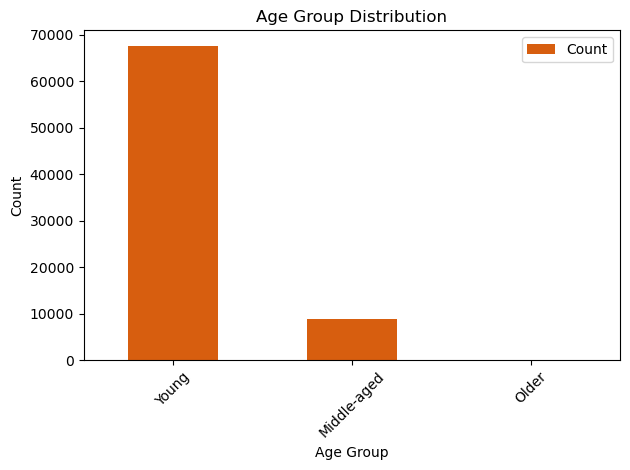

In [53]:

plt.figure(figsize=(8, 6))
age_df.plot(x='Age Group', y='Count', kind='bar', color='#D75E0F')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
people = [
    {'Age Group': 'Young (18-30)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Dropout')].shape[0]},
    {'Age Group': 'Middle-aged (31-60)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Dropout')].shape[0]},
    {'Age Group': 'Older (61-70)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Dropout')].shape[0]}
]

age_target_df = pd.DataFrame(people)
age_target_df

,Age Group,Graduate,Enrolled,Dropout
0,Young (18-30),34189,13842,19512
1,Middle-aged (31-60),2060,1093,5749
2,Older (61-70),1,1,31


In [55]:
df_17 = pd.DataFrame({
    'Age at enrollment': [17, 17, 17],
    'Target': ['Graduate', 'Enrolled', 'Dropout'],
    'Count': [
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Graduate')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Enrolled')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Dropout')].shape[0]
    ]
})

df_17

,Age at enrollment,Target,Count
0,17,Graduate,32
1,17,Enrolled,4
2,17,Dropout,4


In [56]:
df_70 = pd.DataFrame({
    'Age at enrollment': [70, 70, 70],
    'Target': ['Graduate', 'Enrolled', 'Dropout'],
    'Count': [
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Graduate')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Enrolled')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Dropout')].shape[0]
    ]
})

df_70

,Age at enrollment,Target,Count
0,70,Graduate,0
1,70,Enrolled,1
2,70,Dropout,19


<hr/>

<h3 style="color: #92B24B;">International</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [57]:
df_train['International'].value_counts()

International
0    76011
1      507
Name: count, dtype: int64

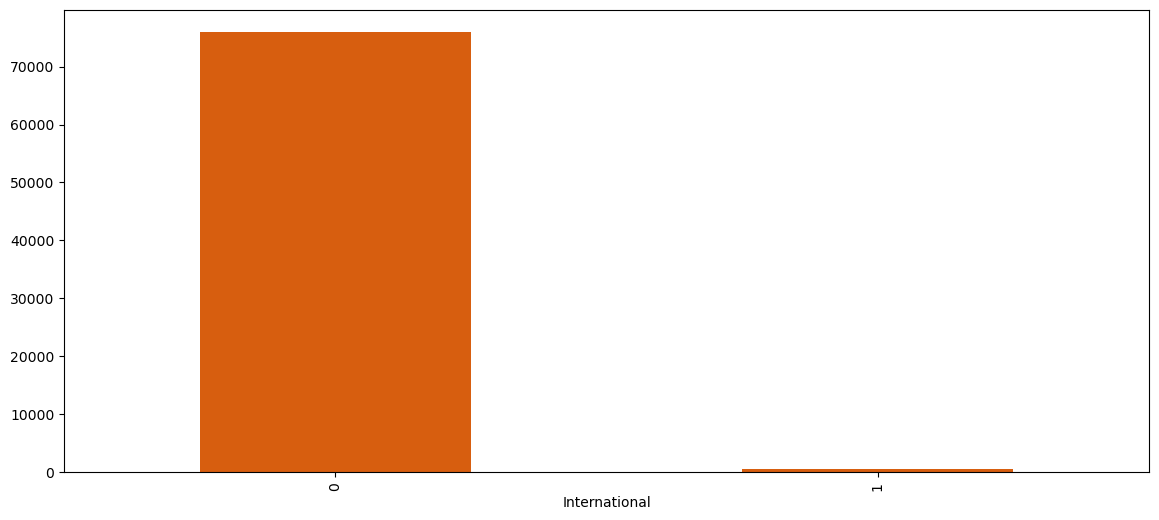

In [58]:
df_train['International'].value_counts().plot(kind='bar', color='#D75E0F', figsize=(14, 6))
plt.show()

In [59]:

international_counts = df_train['International'].value_counts()


international_percentages = (international_counts / international_counts.sum()) * 100


print(international_percentages)

International
0    99.337411
1     0.662589
Name: count, dtype: float64


In [60]:

graduate_counts = df_train.loc[df_train['Target'] == 'Graduate', 'International'].value_counts()
enrolled_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'International'].value_counts()
dropout_counts = df_train.loc[df_train['Target'] == 'Dropout', 'International'].value_counts()

# Create the DataFrame
inter = pd.DataFrame({
    'Graduate': graduate_counts,
    'Enrolled': enrolled_counts,
    'Dropout': dropout_counts
})


inter

,Graduate,Enrolled,Dropout
International,,,
0,36039,14848,25124
1,243,92,172


<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (credited)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units credited in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (enrolled)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units enrolled in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of evaluations to curricular units in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (approved)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units approved in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (grade)</h3>

<li style="color: #0E66AD; font-weight: bold;">Grade average in the 1st semester (between 0 and 20)</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (without evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units without evalutions in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (credited)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units credited in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (enrolled)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units enrolled in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of evaluations to curricular units in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (approved)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units approved in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (grade)</h3>

<li style="color: #0E66AD; font-weight: bold;">Grade average in the 2nd semester (between 0 and 20)</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (without evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units without evalutions in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Inflation rate</h3>


<li style="color: #0E66AD; font-weight: bold;">Inflation rate (%)</li>

In [61]:
df_train['Inflation rate'].value_counts()

Inflation rate
 1.4    14515
 2.6    10436
-0.8    10183
 0.5     8470
 3.7     7378
 0.6     6846
 2.8     6756
 0.3     6151
-0.3     5779
 0.7        1
-0.6        1
 0.4        1
 2.5        1
Name: count, dtype: int64

<Axes: >

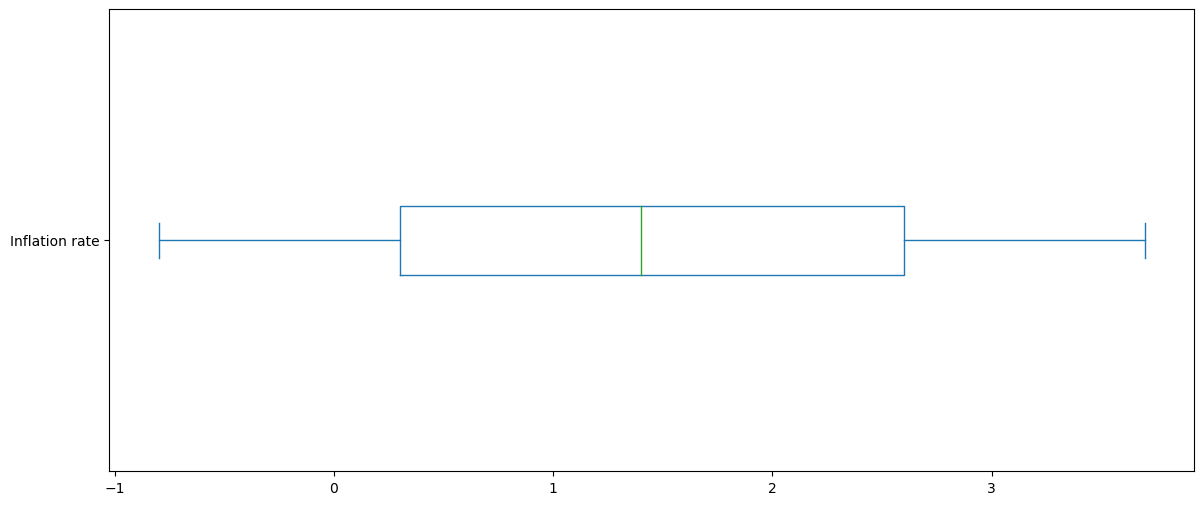

In [62]:
df_train['Inflation rate'].plot(kind='box', vert=False, figsize=(14,6))

In [63]:
df_train.loc[df_train['Target'] == 'Graduate', 'GDP'].value_counts()

GDP
 1.79    4750
 1.74    4445
 2.02    4041
-3.12    4036
 0.32    3841
-1.70    3547
 0.79    3122
 3.51    2904
-4.06    2892
-0.92    2704
Name: count, dtype: int64

In [64]:

graduate_inflation_counts = df_train.loc[df_train['Target'] == 'Graduate', 'Inflation rate'].value_counts()
enrolled_inflation_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'Inflation rate'].value_counts()
dropout_inflation_counts = df_train.loc[df_train['Target'] == 'Dropout', 'Inflation rate'].value_counts()

# Create the DataFrame
inf = pd.DataFrame({
    'Graduate': graduate_inflation_counts,
    'Enrolled': enrolled_inflation_counts,
    'Dropout': dropout_inflation_counts
})

# Fill NaN values with 0
inf = inf.fillna(0)

inf

,Graduate,Enrolled,Dropout
Inflation rate,,,
-0.8,4035.0,2381.0,3767.0
-0.6,0.0,0.0,1.0
-0.3,3122.0,989.0,1668.0
0.3,2704.0,1007.0,2440.0
0.4,0.0,0.0,1.0
0.5,4750.0,1614.0,2106.0
0.6,4041.0,1115.0,1690.0
0.7,1.0,0.0,0.0
1.4,7351.0,2895.0,4269.0


In [66]:
df_train.loc[df_train['Target'] == 'Graduate', ['Inflation rate', 'Nacionality']].value_counts().head(10)
df_train.loc[df_train['Target'] == 'Enrolled', ['Inflation rate', 'Nacionality']].value_counts().head(10)
df_train.loc[df_train['Target'] == 'Dropout', ['Inflation rate', 'Nacionality']].value_counts().head(10)

Inflation rate  Nacionality
 1.4            1              7288
 0.5            1              4728
-0.8            1              4024
 0.6            1              3994
 2.6            1              3821
 3.7            1              3511
-0.3            1              3104
 2.8            1              2879
 0.3            1              2690
 1.4            41               35
Name: count, dtype: int64

In [72]:

df_n1 = df_train.loc[df_train['Target'] == 'Graduate', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Graduate')


df_n2 = df_train.loc[df_train['Target'] == 'Enrolled', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Enrolled')


df_n3 = df_train.loc[df_train['Target'] == 'Dropout', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df = pd.concat([df_n1, df_n2, df_n3], axis=1)

#Showing the dataframe
final_df.head(20)

,,Graduate,Enrolled,Dropout
Inflation rate,Nacionality,,,
1.4,1,7288.0,2869.0,4232.0
0.5,1,4728.0,1604.0,2089.0
-0.8,1,4024.0,2374.0,3750.0
0.6,1,3994.0,1095.0,1664.0
2.6,1,3821.0,2541.0,4036.0
3.7,1,3511.0,1224.0,2594.0
-0.3,1,3104.0,982.0,1657.0
2.8,1,2879.0,1156.0,2676.0
0.3,1,2690.0,1002.0,2425.0


<hr/>

<h3 style="color: #92B24B;">GDP</h3>

In [119]:
df_train['GDP'].value_counts()

GDP
 0.32    10436
-3.12    10184
 1.74     9390
 1.79     8471
-1.70     7379
 2.02     6846
-4.06     6757
-0.92     6151
 0.79     5780
 3.51     5123
 0.74        1
Name: count, dtype: int64

<Axes: xlabel='GDP'>

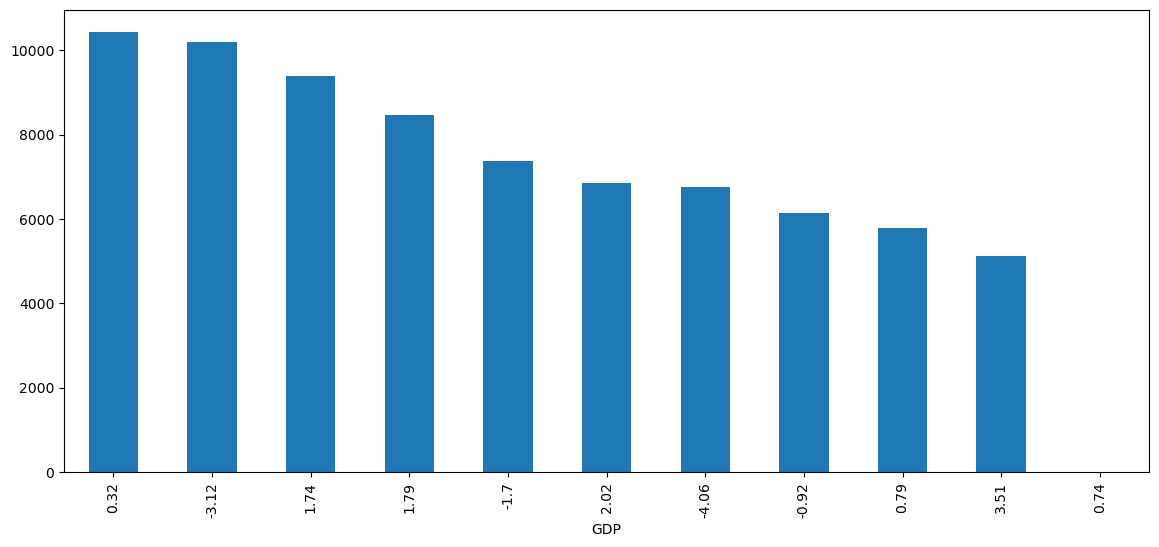

In [131]:
df_train['GDP'].value_counts().plot(kind='bar', figsize=(14, 6))

In [134]:
graduate_gdp_counts = df_train.loc[df_train['Target'] == 'Graduate', 'GDP'].value_counts()
enrolled_gdp_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'GDP'].value_counts()
dropout_gdp_counts = df_train.loc[df_train['Target'] == 'Dropout', 'GDP'].value_counts()

# Create the DataFrame
gdp = pd.DataFrame({
    'Graduate': graduate_gdp_counts,
    'Enrolled': enrolled_gdp_counts,
    'Dropout': dropout_gdp_counts
})

# Fill NaN values with 0
gdp = gdp.fillna(0)

gdp

,Graduate,Enrolled,Dropout
GDP,,,
-4.06,2892.0,1164.0,2701
-3.12,4036.0,2381.0,3767
-1.70,3547.0,1228.0,2604
-0.92,2704.0,1007.0,2440
0.32,3841.0,2547.0,4048
0.74,0.0,0.0,1
0.79,3122.0,989.0,1669
1.74,4445.0,1946.0,2999
1.79,4750.0,1614.0,2107


In [74]:
df_g1 = df_train.loc[df_train['Target'] == 'Graduate', ['GDP', 'Nacionality']].value_counts().to_frame('Graduate')


df_g2 = df_train.loc[df_train['Target'] == 'Enrolled', ['GDP', 'Nacionality']].value_counts().to_frame('Enrolled')


df_g3 = df_train.loc[df_train['Target'] == 'Dropout', ['GDP', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df_g = pd.concat([df_g1, df_g2, df_g3], axis=1)

#Showing the dataframe
final_df_g.head(25)

,,Graduate,Enrolled,Dropout
GDP,Nacionality,,,
1.79,1,4728.0,1604.0,2090.0
1.74,1,4430.0,1942.0,2985.0
-3.12,1,4025.0,2374.0,3750.0
2.02,1,3994.0,1095.0,1664.0
0.32,1,3822.0,2541.0,4035.0
-1.70,1,3512.0,1224.0,2594.0
0.79,1,3104.0,982.0,1658.0
-4.06,1,2879.0,1157.0,2676.0
3.51,1,2856.0,927.0,1247.0


<hr/>

<h3 style="color: #92B24B;">Unemployment rate</h3>


<li style="color: #0E66AD; font-weight: bold;">Unemployment rate (%)</li>

<Axes: xlabel='Unemployment rate'>

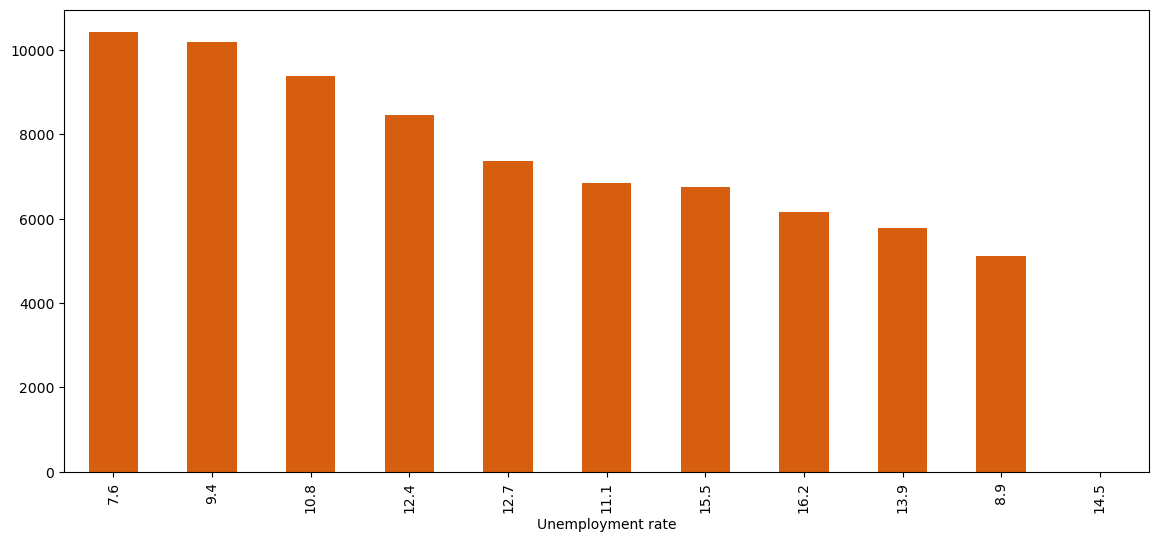

In [75]:
df_train['Unemployment rate'].value_counts().plot(kind='bar',figsize=(14,6), color='#D75E0F')

<Axes: >

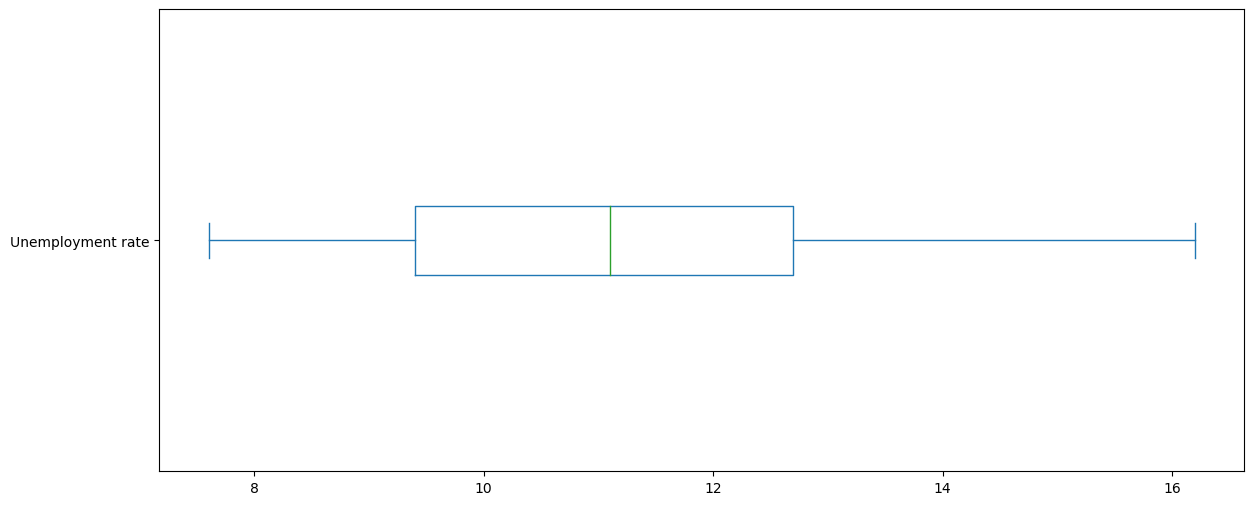

In [76]:
df_train['Unemployment rate'].plot(kind='box', vert=False, figsize=(14,6))

In [77]:
graduate_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Graduate', 'Unemployment rate'].value_counts()
enrolled_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'Unemployment rate'].value_counts()
dropout_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Dropout', 'Unemployment rate'].value_counts()

# Create the DataFrame
Unemployment_rate = pd.DataFrame({
    'Graduate': graduate_Unemployment_rate_counts,
    'Enrolled': enrolled_Unemployment_rate_counts,
    'Dropout': dropout_Unemployment_rate_counts
})

# Fill NaN values with 0
Unemployment_rate = Unemployment_rate.fillna(0)

Unemployment_rate

,Graduate,Enrolled,Dropout
Unemployment rate,,,
7.6,3840,2547.0,4049
8.9,2907,950.0,1271
9.4,4035,2381.0,3767
10.8,4444,1945.0,2999
11.1,4041,1115.0,1690
12.4,4750,1614.0,2106
12.7,3547,1228.0,2604
13.9,3122,989.0,1670
14.5,1,0.0,1


In [78]:
df_emp1 = df_train.loc[df_train['Target'] == 'Graduate', ['Unemployment rate', 'Nacionality']].value_counts().to_frame('Graduate')

# Create the second DataFrame slice
df_emp2 = df_train.loc[df_train['Target'] == 'Enrolled', ['Unemployment rate', 'Nacionality']].value_counts().to_frame('Enrolled')

# Create the third DataFrame slice
df_emp3 = df_train.loc[df_train['Target'] == 'Dropout', ['Unemployment rate', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df_emp = pd.concat([df_emp1, df_emp2, df_emp3], axis=1)

final_df_emp.head(20)

,,Graduate,Enrolled,Dropout
Unemployment rate,Nacionality,,,
12.4,1,4728.0,1604.0,2089.0
10.8,1,4429.0,1941.0,2985.0
9.4,1,4024.0,2374.0,3750.0
11.1,1,3994.0,1095.0,1664.0
7.6,1,3821.0,2541.0,4036.0
12.7,1,3512.0,1224.0,2594.0
13.9,1,3104.0,982.0,1659.0
15.5,1,2878.0,1157.0,2674.0
8.9,1,2859.0,928.0,1248.0


<hr/>

<h3 style="color: #92B24B;">Target</h3>


<li style="color: #0E66AD; font-weight: bold;">Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course
</li>

<Axes: xlabel='Target'>

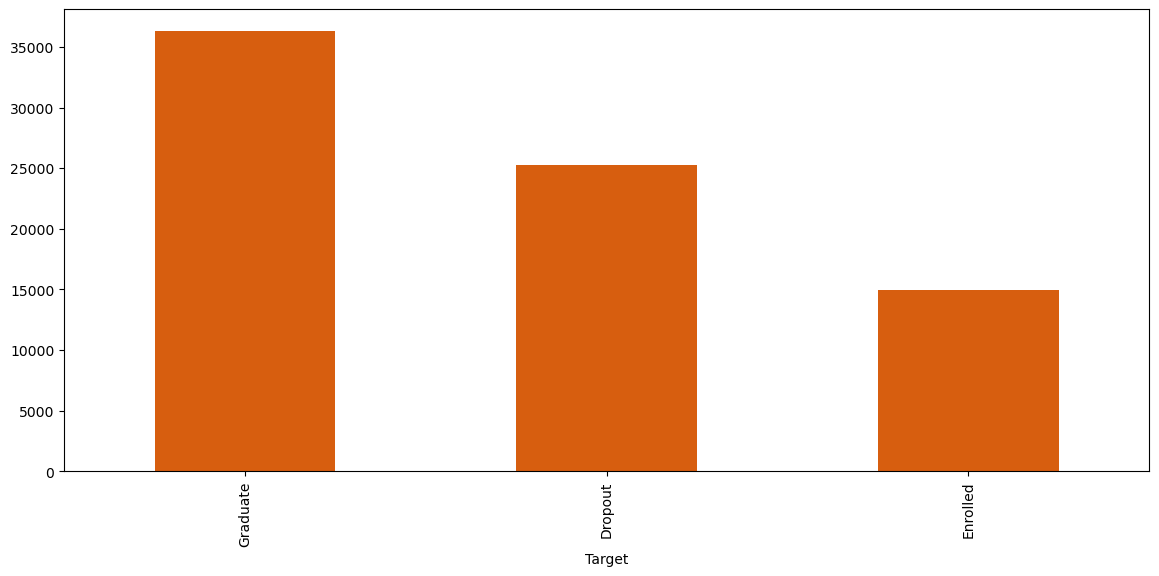

In [139]:
df_train['Target'].value_counts().plot(kind='bar', figsize=(14, 6), color='#D75E0F')

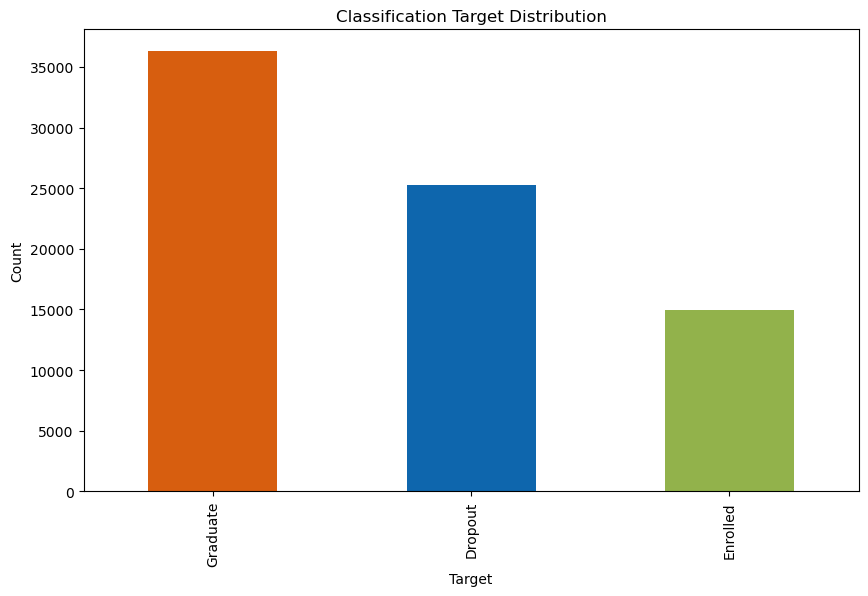

In [138]:

target_variable = df_train['Target']

# Get the value counts for the target variable
target_counts = target_variable.value_counts()

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
target_counts.plot(kind='bar', stacked=True, color=['#D75E0F', '#0E66AD', '#92B24B'], ax=ax)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Classification Target Distribution')

# Display the plot
plt.show()

<h2 style="color: #92B24B;">Correlation</h2>

In [24]:
df_corr = df_train.copy()
df_corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


<p style="color: #92B24B; font-weight: bold">Before we use the Target for correlation, we need to convert it to numeric first as it is an object now</p>

In [26]:
#Using LabelEncoder to convert the Target column to numeric 
le = LabelEncoder()

#Fitting and transforming it
df_corr['Target'] = le.fit_transform(df_corr['Target'])

#Checking 
df_corr['Target']

0        2
1        0
2        0
3        1
4        2
        ..
76513    2
76514    2
76515    1
76516    0
76517    2
Name: Target, Length: 76518, dtype: int32

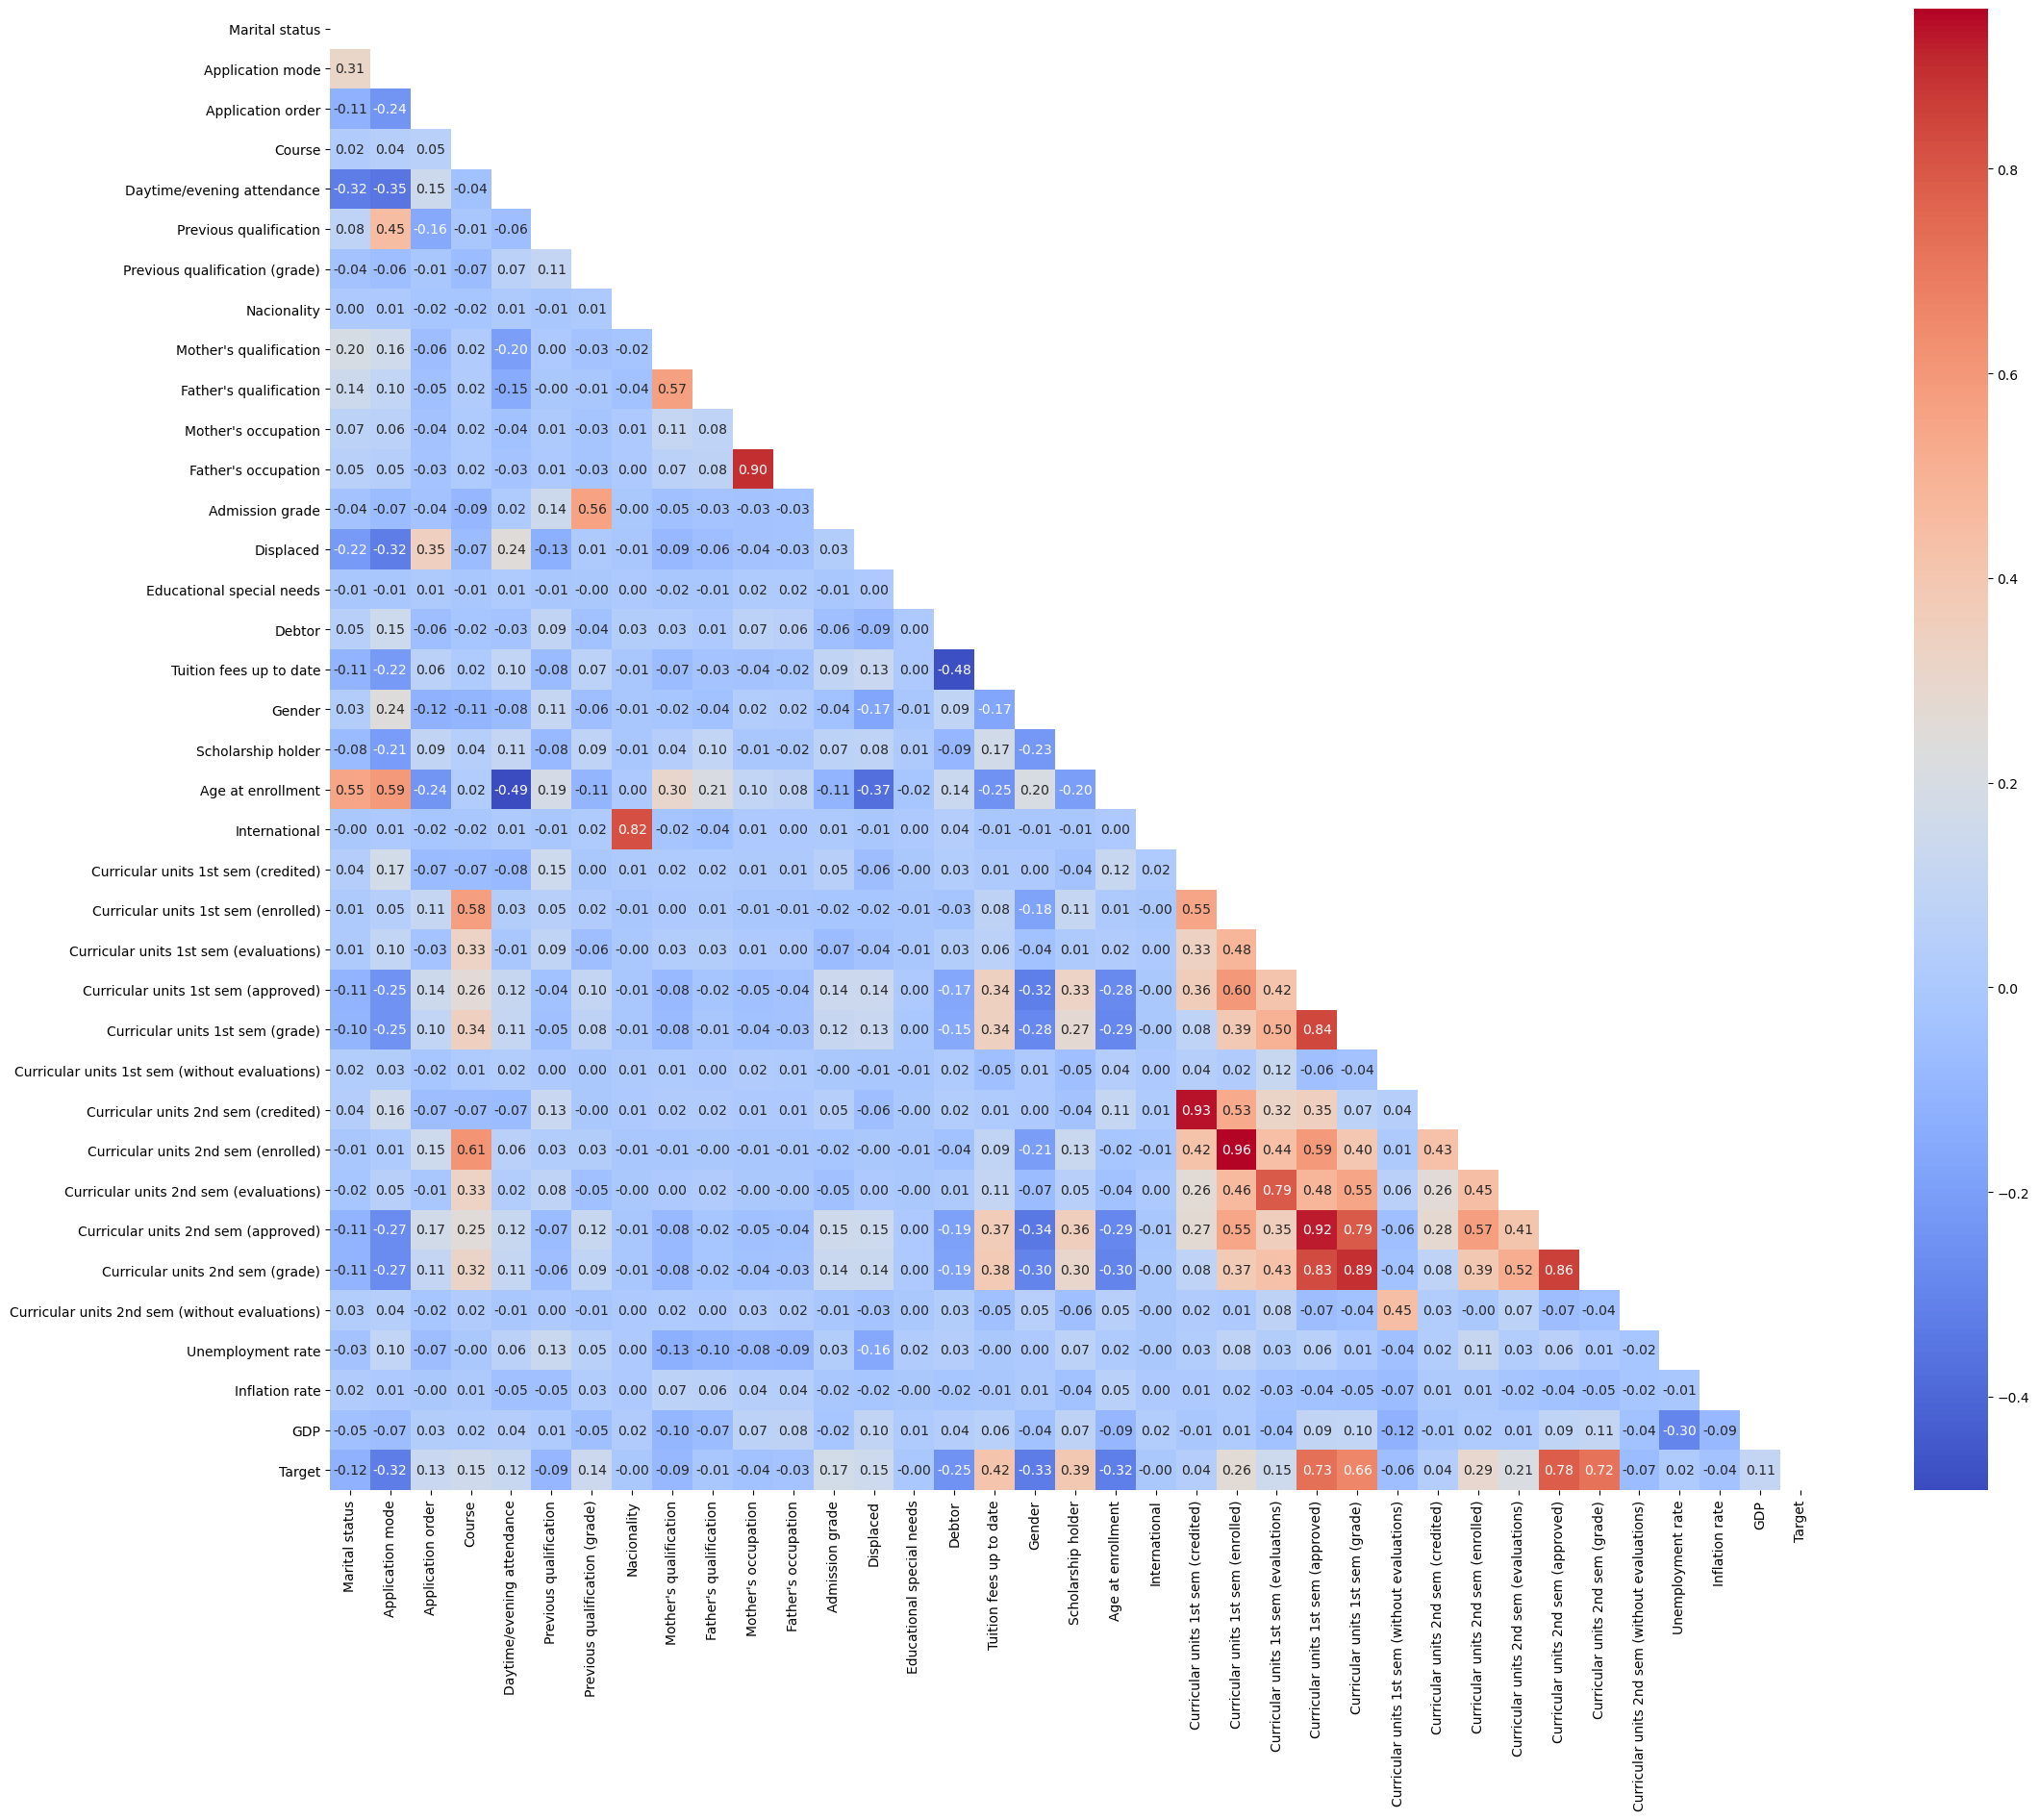

In [27]:
cor_mat = df_corr.corr(method="pearson")

mask = np.triu(np.ones_like(cor_mat))

plt.figure(figsize=(25, 20))
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.show()

<hr/>

<h2 style="color: #92B24B;">Dropping the columns</h2>

In [15]:
df_train.drop(['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'], axis=1, inplace=True)

In [16]:
df_train.head()

,Nacionality,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,122.6,0,0,0,1,0,1,18,0,11.1,0.6,2.02,Graduate
1,1,119.8,1,0,0,1,0,0,18,0,11.1,0.6,2.02,Dropout
2,1,144.7,0,0,0,1,1,0,18,0,16.2,0.3,-0.92,Dropout
3,1,126.1,1,0,0,1,0,1,18,0,11.1,0.6,2.02,Enrolled
4,1,120.1,1,0,0,1,0,0,18,0,7.6,2.6,0.32,Graduate


<h2 style="color: #92B24B;">eval_metric</h2>

In [17]:
# This function will be used frequently
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

<h3 style="color: #92B24B;">Split the dataframe into train & test</h3>

In [18]:
X = df_train.drop('Target', axis=1)
y = df_train['Target']

In [19]:
print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)

The shape of X is:  (76518, 13)
The shape of y is:  (76518,)


In [20]:
seed = 101

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61214, 13)
(15304, 13)
(61214,)
(15304,)


<h2 style="color: #92B24B;">Scalling the data with StandardScaler</h2>

In [26]:
scaler = StandardScaler()
# scaler = MinMaxScaler()

<h2 style="color: #92B24B;">SVM Model</h2>

In [ ]:
#Setting the operations
operations = [('scaler', scaler), ('svc', SVC(random_state=seed, class_weight='balanced' ))]

#Creating the model 
svm_model = Pipeline(steps=operations)

#Fitting the model with the training data
svm_model.fit(X_train, y_train)

In [ ]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

<h3 style="color: #92B24B;">Cross Validation of SVM</h3>

In [23]:
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1_macro',
    'precision': 'precision_macro',
    'recall': 'recall_macro'
}

In [ ]:
#Setting the operations
operations = [('scaler', scaler), ('svc', SVC(random_state=seed, class_weight='balanced' ))]

CV_SVM  = Pipeline(steps=operations)


scores = cross_validate(
    CV_SVM, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

<h3 style="color: #92B24B;">GridSearchCV</h3>

In [ ]:
param_grid = {"svc__C": np.arange(0.01,100, step=0.01),
              "svc__gamma": np.arange(0, 11,step=0.5),
              'svc__kernel':['linear','rbf','sigmoid','poly'],
              'svc__degree':np.arange(1,5, step=1)}



#Setting the operations
operations = [('scaler', scaler), ('svc', SVC(random_state=seed, class_weight='balanced' ))]

GS_SVM = Pipeline(steps=operations)

grid_model_svc = GridSearchCV(estimator=GS_SVM, param_grid= param_grid, scoring=accuracy, cv=10, n_jobs=-1, return_train_score=True)

grid_model_svc.fit(X_train, y_train)

In [ ]:
eval_metric(grid_model_svc, X_train, y_train, X_test, y_test)

In [ ]:
grid_model_svc.best_params_

<h2 style="color: #92B24B;">Random Forest Model</h2>

In [24]:
#Setting the operations
operations = [('scaler', scaler), ('rf', RandomForestClassifier(random_state=seed, class_weight='balanced'))]


RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [25]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[3182  831 1046]
 [ 805 1048 1135]
 [ 983 1373 4901]]
              precision    recall  f1-score   support

     Dropout       0.64      0.63      0.63      5059
    Enrolled       0.32      0.35      0.34      2988
    Graduate       0.69      0.68      0.68      7257

    accuracy                           0.60     15304
   macro avg       0.55      0.55      0.55     15304
weighted avg       0.60      0.60      0.60     15304


Train_Set
[[17784  1406  1047]
 [  535 10336  1081]
 [ 1059  2423 25543]]
              precision    recall  f1-score   support

     Dropout       0.92      0.88      0.90     20237
    Enrolled       0.73      0.86      0.79     11952
    Graduate       0.92      0.88      0.90     29025

    accuracy                           0.88     61214
   macro avg       0.86      0.87      0.86     61214
weighted avg       0.88      0.88      0.88     61214



<h3 style="color: #92B24B;"> Cross Validation of RF</h3>

In [37]:
#Setting the operations
operations = [('scaler', scaler), ('rf', RandomForestClassifier(random_state=seed, class_weight='balanced'))]

CV_RF  = Pipeline(steps=operations)


scores = cross_validate(
    CV_RF, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time           41.401285
score_time          1.613677
test_accuracy       0.595599
train_accuracy      0.881999
test_f1             0.550093
train_f1            0.869380
test_precision      0.549872
train_precision     0.862484
test_recall         0.550830
train_recall        0.880622
dtype: float64

<h3 style="color: #92B24B;">Grid/Random Search RF</h3>

In [29]:
#Setting the param grid
param_grid = {'rf__n_estimators':np.arange(3,201, step=1),
             'rf__max_features':np.arange(2,10, step=1),
             'rf__max_depth':np.arange(2,10, step=1),
             'rf__min_samples_split':np.arange(2,10, step=1),
             'rf__min_samples_leaf': np.arange(2,10, step=1)
             }



#Setting the operations
operations = [('scaler', scaler), ('rf', RandomForestClassifier(random_state=seed, class_weight='balanced'))]

#Creating the pipeline
GS_RF = Pipeline(steps=operations).set_output(transform="pandas")


# Create the random search object
random_search_RF = RandomizedSearchCV(
    estimator=GS_RF,
    param_distributions=param_grid,
    n_iter=200,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring='accuracy'
)

#Fitting with the training data
random_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=145; total time=   6.7s
[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=145; total time=   6.0s
[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=145; total time=   6.0s
[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=145; total time=   6.6s
[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=145; total time=   5.5s
[CV] END rf__max_depth=8, rf__max_features=6, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=115; total time=  10.5s
[CV] END rf__max_depth=8, rf__max_features=6, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=115; tot

[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=144; total time=   2.7s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=144; total time=   2.6s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=144; total time=   2.8s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=144; total time=   2.8s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=8, rf__min_samples_split=7, rf__n_estimators=144; total time=   2.7s
[CV] END rf__max_depth=2, rf__max_features=9, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=158; total time=   3.1s
[CV] END rf__max_depth=2, rf__max_features=9, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=158; total time=   3.2s
[CV] END rf__max_depth=2, rf__max_features=9, rf

[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=6, rf__min_samples_split=2, rf__n_estimators=153; total time=   3.2s
[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=6, rf__min_samples_split=2, rf__n_estimators=153; total time=   3.3s
[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=6, rf__min_samples_split=2, rf__n_estimators=153; total time=   3.1s
[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=6, rf__min_samples_split=2, rf__n_estimators=153; total time=   4.2s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=99; total time=   1.6s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=99; total time=   2.0s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=99; total time=   2.5s
[CV] END rf__max_depth=2, rf__max_features=5, rf__m

[CV] END rf__max_depth=5, rf__max_features=9, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=12; total time=   0.7s
[CV] END rf__max_depth=5, rf__max_features=9, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=12; total time=   0.5s
[CV] END rf__max_depth=5, rf__max_features=9, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=12; total time=   0.6s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=6, rf__min_samples_split=8, rf__n_estimators=10; total time=   0.2s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=6, rf__min_samples_split=8, rf__n_estimators=10; total time=   0.3s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=6, rf__min_samples_split=8, rf__n_estimators=10; total time=   0.3s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=6, rf__min_samples_split=8, rf__n_estimators=10; total time=   0.2s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_s

[CV] END rf__max_depth=6, rf__max_features=5, rf__min_samples_leaf=7, rf__min_samples_split=7, rf__n_estimators=95; total time=   2.9s
[CV] END rf__max_depth=6, rf__max_features=5, rf__min_samples_leaf=7, rf__min_samples_split=7, rf__n_estimators=95; total time=   3.2s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=9, rf__n_estimators=36; total time=   2.2s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=9, rf__n_estimators=36; total time=   1.7s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=9, rf__n_estimators=36; total time=   1.9s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=9, rf__n_estimators=36; total time=   1.6s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=9, rf__n_estimators=36; total time=   1.6s
[CV] END rf__max_depth=4, rf__max_features=6, rf__min_s

[CV] END rf__max_depth=6, rf__max_features=7, rf__min_samples_leaf=6, rf__min_samples_split=2, rf__n_estimators=35; total time=   1.6s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=78; total time=   2.0s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=78; total time=   1.7s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=78; total time=   1.6s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=78; total time=   1.6s
[CV] END rf__max_depth=2, rf__max_features=8, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=78; total time=   1.5s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=4, rf__min_samples_split=8, rf__n_estimators=91; total time=   2.3s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_s

[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=7, rf__min_samples_split=2, rf__n_estimators=159; total time=   7.7s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=7, rf__min_samples_split=2, rf__n_estimators=159; total time=   7.5s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=7, rf__min_samples_split=2, rf__n_estimators=159; total time=   7.6s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=7, rf__min_samples_split=2, rf__n_estimators=159; total time=   8.5s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=7, rf__min_samples_split=2, rf__n_estimators=159; total time=   7.4s
[CV] END rf__max_depth=6, rf__max_features=3, rf__min_samples_leaf=7, rf__min_samples_split=5, rf__n_estimators=33; total time=   0.7s
[CV] END rf__max_depth=6, rf__max_features=3, rf__min_samples_leaf=7, rf__min_samples_split=5, rf__n_estimators=33; total time=   0.7s
[CV] END rf__max_depth=6, rf__max_features=3, rf__

[CV] END rf__max_depth=9, rf__max_features=8, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=137; total time=   8.4s
[CV] END rf__max_depth=9, rf__max_features=8, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=137; total time=   7.6s
[CV] END rf__max_depth=9, rf__max_features=8, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=137; total time=   8.0s
[CV] END rf__max_depth=9, rf__max_features=8, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=137; total time=   8.0s
[CV] END rf__max_depth=5, rf__max_features=8, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=195; total time=   6.9s
[CV] END rf__max_depth=5, rf__max_features=8, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=195; total time=   6.8s
[CV] END rf__max_depth=5, rf__max_features=8, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=195; total time=   6.6s
[CV] END rf__max_depth=5, rf__max_features=8, rf

[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=168; total time=   4.3s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=168; total time=   4.5s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=168; total time=   5.2s
[CV] END rf__max_depth=6, rf__max_features=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=125; total time=   3.5s
[CV] END rf__max_depth=6, rf__max_features=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=125; total time=   3.4s
[CV] END rf__max_depth=6, rf__max_features=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=125; total time=   3.5s
[CV] END rf__max_depth=6, rf__max_features=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=125; total time=   3.3s
[CV] END rf__max_depth=6, rf__max_features=4, rf

[CV] END rf__max_depth=4, rf__max_features=3, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=121; total time=   2.0s
[CV] END rf__max_depth=4, rf__max_features=3, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=121; total time=   2.2s
[CV] END rf__max_depth=4, rf__max_features=3, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=33; total time=   0.6s
[CV] END rf__max_depth=4, rf__max_features=3, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=33; total time=   0.6s
[CV] END rf__max_depth=4, rf__max_features=3, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=33; total time=   0.5s
[CV] END rf__max_depth=4, rf__max_features=3, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=33; total time=   0.7s
[CV] END rf__max_depth=4, rf__max_features=3, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=33; total time=   0.6s
[CV] END rf__max_depth=5, rf__max_features=7, rf__min

[CV] END rf__max_depth=8, rf__max_features=2, rf__min_samples_leaf=7, rf__min_samples_split=6, rf__n_estimators=48; total time=   1.3s
[CV] END rf__max_depth=5, rf__max_features=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=139; total time=   3.5s
[CV] END rf__max_depth=5, rf__max_features=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=139; total time=   3.7s
[CV] END rf__max_depth=5, rf__max_features=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=139; total time=   3.5s
[CV] END rf__max_depth=5, rf__max_features=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=139; total time=   3.8s
[CV] END rf__max_depth=5, rf__max_features=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=139; total time=   3.4s
[CV] END rf__max_depth=2, rf__max_features=4, rf__min_samples_leaf=6, rf__min_samples_split=9, rf__n_estimators=112; total time=   1.6s
[CV] END rf__max_depth=2, rf__max_features=4, rf_

[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=171; total time=   3.5s
[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=171; total time=   3.7s
[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=171; total time=   3.5s
[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=171; total time=   3.7s
[CV] END rf__max_depth=3, rf__max_features=6, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=171; total time=   3.3s
[CV] END rf__max_depth=2, rf__max_features=6, rf__min_samples_leaf=6, rf__min_samples_split=5, rf__n_estimators=3; total time=   0.1s
[CV] END rf__max_depth=2, rf__max_features=6, rf__min_samples_leaf=6, rf__min_samples_split=5, rf__n_estimators=3; total time=   0.1s
[CV] END rf__max_depth=2, rf__max_features=6, rf__mi

[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=11; total time=   0.2s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=11; total time=   0.2s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=11; total time=   0.2s
[CV] END rf__max_depth=2, rf__max_features=5, rf__min_samples_leaf=4, rf__min_samples_split=9, rf__n_estimators=11; total time=   0.2s
[CV] END rf__max_depth=6, rf__max_features=9, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=142; total time=   6.1s
[CV] END rf__max_depth=6, rf__max_features=9, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=142; total time=   6.2s
[CV] END rf__max_depth=6, rf__max_features=9, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=142; total time=   6.7s
[CV] END rf__max_depth=6, rf__max_features=9, rf__mi

[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=9, rf__min_samples_split=7, rf__n_estimators=72; total time=   1.6s
[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=9, rf__min_samples_split=7, rf__n_estimators=72; total time=   1.6s
[CV] END rf__max_depth=3, rf__max_features=5, rf__min_samples_leaf=9, rf__min_samples_split=7, rf__n_estimators=72; total time=   1.4s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=183; total time=   4.5s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=183; total time=   4.5s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=183; total time=   4.4s
[CV] END rf__max_depth=3, rf__max_features=9, rf__min_samples_leaf=5, rf__min_samples_split=7, rf__n_estimators=183; total time=   4.9s
[CV] END rf__max_depth=3, rf__max_features=9, rf__m

[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=7, rf__n_estimators=199; total time=  11.7s
[CV] END rf__max_depth=7, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=7, rf__n_estimators=199; total time=  14.8s
[CV] END rf__max_depth=5, rf__max_features=7, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=106; total time=   5.8s
[CV] END rf__max_depth=5, rf__max_features=7, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=106; total time=   5.8s
[CV] END rf__max_depth=5, rf__max_features=7, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=106; total time=   4.0s
[CV] END rf__max_depth=5, rf__max_features=7, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=106; total time=   4.4s
[CV] END rf__max_depth=5, rf__max_features=7, rf__min_samples_leaf=5, rf__min_samples_split=9, rf__n_estimators=106; total time=   3.7s
[CV] END rf__max_depth=9, rf__max_features=7, rf

[CV] END rf__max_depth=6, rf__max_features=7, rf__min_samples_leaf=9, rf__min_samples_split=9, rf__n_estimators=173; total time=   8.9s
[CV] END rf__max_depth=9, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=155; total time=  11.8s
[CV] END rf__max_depth=9, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=155; total time=  10.1s
[CV] END rf__max_depth=9, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=155; total time=  11.2s
[CV] END rf__max_depth=9, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=155; total time=  13.4s
[CV] END rf__max_depth=9, rf__max_features=9, rf__min_samples_leaf=9, rf__min_samples_split=5, rf__n_estimators=155; total time=  12.8s
[CV] END rf__max_depth=7, rf__max_features=7, rf__min_samples_leaf=4, rf__min_samples_split=4, rf__n_estimators=15; total time=   0.7s
[CV] END rf__max_depth=7, rf__max_features=7, rf_

[CV] END rf__max_depth=8, rf__max_features=8, rf__min_samples_leaf=6, rf__min_samples_split=5, rf__n_estimators=101; total time=   5.2s
[CV] END rf__max_depth=8, rf__max_features=8, rf__min_samples_leaf=6, rf__min_samples_split=5, rf__n_estimators=101; total time=   6.5s
[CV] END rf__max_depth=8, rf__max_features=8, rf__min_samples_leaf=6, rf__min_samples_split=5, rf__n_estimators=101; total time=   5.2s
[CV] END rf__max_depth=8, rf__max_features=8, rf__min_samples_leaf=6, rf__min_samples_split=5, rf__n_estimators=101; total time=   5.2s
[CV] END rf__max_depth=8, rf__max_features=8, rf__min_samples_leaf=6, rf__min_samples_split=5, rf__n_estimators=101; total time=   5.6s
[CV] END rf__max_depth=3, rf__max_features=7, rf__min_samples_leaf=8, rf__min_samples_split=8, rf__n_estimators=22; total time=   0.8s
[CV] END rf__max_depth=3, rf__max_features=7, rf__min_samples_leaf=8, rf__min_samples_split=8, rf__n_estimators=22; total time=   0.8s
[CV] END rf__max_depth=3, rf__max_features=7, rf__

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=101))]),
                   n_iter=200,
                   param_distributions={'rf__max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'rf__max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'rf__min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'rf__min_samples_split': array([2,...
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200])},
                   return_train_score=True, scoring='accuracy', verbose=2)

In [31]:
eval_metric(random_search_RF, X_train, y_train, X_test, y_test)

Test_Set
[[3100 1010  949]
 [ 603 1057 1328]
 [ 652 1089 5516]]
              precision    recall  f1-score   support

     Dropout       0.71      0.61      0.66      5059
    Enrolled       0.33      0.35      0.34      2988
    Graduate       0.71      0.76      0.73      7257

    accuracy                           0.63     15304
   macro avg       0.58      0.58      0.58     15304
weighted avg       0.64      0.63      0.63     15304


Train_Set
[[12448  4064  3725]
 [ 2549  4330  5073]
 [ 2729  4331 21965]]
              precision    recall  f1-score   support

     Dropout       0.70      0.62      0.66     20237
    Enrolled       0.34      0.36      0.35     11952
    Graduate       0.71      0.76      0.73     29025

    accuracy                           0.63     61214
   macro avg       0.59      0.58      0.58     61214
weighted avg       0.64      0.63      0.63     61214



In [33]:
random_search_RF.best_params_

{'rf__n_estimators': 122,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 4,
 'rf__max_features': 2,
 'rf__max_depth': 2}

<h2 style="color: #92B24B;">XGBoost Model</h2>

In [34]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [35]:
#Creating the operation of xg boost
operations = [('scaler', scaler), ('xgb', XGBClassifier(random_state=seed, class_weight='balanced'))]

#Creating the pipeline of xg
XG_model = Pipeline(steps=operations).set_output(transform="pandas")

#Fitting the model with the trainint data
XG_model.fit(X_train, y_train_encoded)

C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               class_weight='balanced', colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [36]:
#Seeing the evaluation of the xg model 
eval_metric(XG_model, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[3373  433 1253]
 [ 679  790 1519]
 [ 691  533 6033]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      5059
           1       0.45      0.26      0.33      2988
           2       0.69      0.83      0.75      7257

    accuracy                           0.67     15304
   macro avg       0.62      0.59      0.59     15304
weighted avg       0.65      0.67      0.65     15304


Train_Set
[[14254  1526  4457]
 [ 2481  3759  5712]
 [ 2291  1760 24974]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73     20237
           1       0.53      0.31      0.40     11952
           2       0.71      0.86      0.78     29025

    accuracy                           0.70     61214
   macro avg       0.66      0.63      0.63     61214
weighted avg       0.69      0.70      0.69     61214



<h3 style="color: #92B24B;">Cross Validation XGB</h3>

In [37]:
#Creating the operation of xg boost
operations = [('scaler', scaler), ('xgb', XGBClassifier(random_state=seed, class_weight='balanced'))]

#Creating the cross validation of xg
CV_XGB_b  = Pipeline(steps=operations).set_output(transform="pandas")


scores = cross_validate(
    CV_XGB_b, X_train, y_train_encoded, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py

fit_time           0.764168
score_time         0.024047
test_accuracy      0.667298
train_accuracy     0.705146
test_f1            0.589002
train_f1           0.637154
test_precision     0.613281
train_precision    0.669070
test_recall        0.586630
train_recall       0.629788
dtype: float64

<h3 style="color: #92B24B;">Grid/Random Search XGB</h3>

In [38]:
param_grid = {
    "xgb__n_estimators":np.arange(3,201, step=1),           # Integer
    "xgb__max_depth":np.arange(3,11, step=1),               # Integer
    "xgb__learning_rate": np.arange(0.001,3, step=0.05),    # float
    "xgb__subsample":np.arange(0.5,1, step=0.1),            # float
    "xgb__colsample_bytree": np.arange(0.3, 1, step=0.05),  # float
    "xgb__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgb__gamma": np.arange(0, 11,step=0.5),                # float
}


#Creating the operation of xg boost
operations = [('scaler', scaler), ('xgb', XGBClassifier(random_state=seed, class_weight='balanced'))]


pipeline_XGB = Pipeline(steps=operations).set_output(transform="pandas")

# Create the random search object
random_search_XGB = RandomizedSearchCV(
    estimator=pipeline_XGB,
    param_distributions=param_grid,
    n_iter=200,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring='accuracy'
)

random_search_XGB.fit(X_train, y_train_encoded)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=104, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=104, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=104, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=104, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=104, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=8.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=132, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=8.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=132, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=8.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=132, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=8.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=132, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=8.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=132, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=4, xgb__n_estimators=115, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=4, xgb__n_estimators=115, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=4, xgb__n_estimators=115, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=4, xgb__n_estimators=115, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=4, xgb__n_estimators=115, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.0, xgb__learning_rate=0.9510000000000001, xgb__max_depth=8, xgb__n_estimators=140, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.0, xgb__learning_rate=0.9510000000000001, xgb__max_depth=8, xgb__n_estimators=140, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.0, xgb__learning_rate=0.9510000000000001, xgb__max_depth=8, xgb__n_estimators=140, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.0, xgb__learning_rate=0.9510000000000001, xgb__max_depth=8, xgb__n_estimators=140, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.0, xgb__learning_rate=0.9510000000000001, xgb__max_depth=8, xgb__n_estimators=140, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.401, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.401, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.401, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.401, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.401, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=3, xgb__n_estimators=37, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=3, xgb__n_estimators=37, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=3, xgb__n_estimators=37, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=3, xgb__n_estimators=37, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=3, xgb__n_estimators=37, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.5, xgb__learning_rate=1.501, xgb__max_depth=7, xgb__n_estimators=41, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.5, xgb__learning_rate=1.501, xgb__max_depth=7, xgb__n_estimators=41, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.5, xgb__learning_rate=1.501, xgb__max_depth=7, xgb__n_estimators=41, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.5, xgb__learning_rate=1.501, xgb__max_depth=7, xgb__n_estimators=41, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.5, xgb__learning_rate=1.501, xgb__max_depth=7, xgb__n_estimators=41, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=9.0, xgb__learning_rate=1.801, xgb__max_depth=5, xgb__n_estimators=156, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=9.0, xgb__learning_rate=1.801, xgb__max_depth=5, xgb__n_estimators=156, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=9.0, xgb__learning_rate=1.801, xgb__max_depth=5, xgb__n_estimators=156, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=9.0, xgb__learning_rate=1.801, xgb__max_depth=5, xgb__n_estimators=156, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=9.0, xgb__learning_rate=1.801, xgb__max_depth=5, xgb__n_estimators=156, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=8.5, xgb__learning_rate=2.9010000000000002, xgb__max_depth=9, xgb__n_estimators=24, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=8.5, xgb__learning_rate=2.9010000000000002, xgb__max_depth=9, xgb__n_estimators=24, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=8.5, xgb__learning_rate=2.9010000000000002, xgb__max_depth=9, xgb__n_estimators=24, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=8.5, xgb__learning_rate=2.9010000000000002, xgb__max_depth=9, xgb__n_estimators=24, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=8.5, xgb__learning_rate=2.9010000000000002, xgb__max_depth=9, xgb__n_estimators=24, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.0, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=194, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.0, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=194, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.0, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=194, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.0, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=194, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.0, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=194, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=4, xgb__n_estimators=131, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=4, xgb__n_estimators=131, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=4, xgb__n_estimators=131, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=4, xgb__n_estimators=131, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=4, xgb__n_estimators=131, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=8.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=6, xgb__n_estimators=89, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=8.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=6, xgb__n_estimators=89, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=8.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=6, xgb__n_estimators=89, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=8.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=6, xgb__n_estimators=89, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=8.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=6, xgb__n_estimators=89, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=9, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=9, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=9, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=9, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   2.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=9, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   3.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=4, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=4, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   0.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=4, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   0.0s
[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=4, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   0.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=4, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=128, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=128, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=128, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=128, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=128, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=7.0, xgb__learning_rate=1.851, xgb__max_depth=7, xgb__n_estimators=23, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=7.0, xgb__learning_rate=1.851, xgb__max_depth=7, xgb__n_estimators=23, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=7.0, xgb__learning_rate=1.851, xgb__max_depth=7, xgb__n_estimators=23, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=7.0, xgb__learning_rate=1.851, xgb__max_depth=7, xgb__n_estimators=23, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=7.0, xgb__learning_rate=1.851, xgb__max_depth=7, xgb__n_estimators=23, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.801, xgb__max_depth=9, xgb__n_estimators=74, xgb__reg_alpha=0.4, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.801, xgb__max_depth=9, xgb__n_estimators=74, xgb__reg_alpha=0.4, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.801, xgb__max_depth=9, xgb__n_estimators=74, xgb__reg_alpha=0.4, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.801, xgb__max_depth=9, xgb__n_estimators=74, xgb__reg_alpha=0.4, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.801, xgb__max_depth=9, xgb__n_estimators=74, xgb__reg_alpha=0.4, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=8.0, xgb__learning_rate=1.251, xgb__max_depth=6, xgb__n_estimators=114, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=8.0, xgb__learning_rate=1.251, xgb__max_depth=6, xgb__n_estimators=114, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=8.0, xgb__learning_rate=1.251, xgb__max_depth=6, xgb__n_estimators=114, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=8.0, xgb__learning_rate=1.251, xgb__max_depth=6, xgb__n_estimators=114, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=8.0, xgb__learning_rate=1.251, xgb__max_depth=6, xgb__n_estimators=114, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.151, xgb__max_depth=8, xgb__n_estimators=138, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.151, xgb__max_depth=8, xgb__n_estimators=138, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.151, xgb__max_depth=8, xgb__n_estimators=138, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.151, xgb__max_depth=8, xgb__n_estimators=138, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.151, xgb__max_depth=8, xgb__n_estimators=138, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=159, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=159, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=159, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=159, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=159, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=5, xgb__n_estimators=136, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=5, xgb__n_estimators=136, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   3.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=5, xgb__n_estimators=136, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   3.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=5, xgb__n_estimators=136, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=5, xgb__n_estimators=136, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.101, xgb__max_depth=8, xgb__n_estimators=29, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.101, xgb__max_depth=8, xgb__n_estimators=29, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.101, xgb__max_depth=8, xgb__n_estimators=29, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.101, xgb__max_depth=8, xgb__n_estimators=29, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.101, xgb__max_depth=8, xgb__n_estimators=29, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=162, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=162, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=162, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=162, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=162, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.0, xgb__learning_rate=1.601, xgb__max_depth=6, xgb__n_estimators=198, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.0, xgb__learning_rate=1.601, xgb__max_depth=6, xgb__n_estimators=198, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.0, xgb__learning_rate=1.601, xgb__max_depth=6, xgb__n_estimators=198, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.0, xgb__learning_rate=1.601, xgb__max_depth=6, xgb__n_estimators=198, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.0, xgb__learning_rate=1.601, xgb__max_depth=6, xgb__n_estimators=198, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.0, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=157, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.0, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=157, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.0, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=157, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.0, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=157, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.0, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=157, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=87, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=87, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=87, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=87, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=87, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=4, xgb__n_estimators=120, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=4, xgb__n_estimators=120, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=4, xgb__n_estimators=120, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=4, xgb__n_estimators=120, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.5, xgb__learning_rate=2.751, xgb__max_depth=4, xgb__n_estimators=120, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=4.0, xgb__learning_rate=1.751, xgb__max_depth=10, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=4.0, xgb__learning_rate=1.751, xgb__max_depth=10, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=4.0, xgb__learning_rate=1.751, xgb__max_depth=10, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=4.0, xgb__learning_rate=1.751, xgb__max_depth=10, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=4.0, xgb__learning_rate=1.751, xgb__max_depth=10, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.901, xgb__max_depth=10, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=7, xgb__n_estimators=10, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=7, xgb__n_estimators=10, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=7, xgb__n_estimators=10, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=7, xgb__n_estimators=10, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=7, xgb__n_estimators=10, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.5, xgb__learning_rate=2.351, xgb__max_depth=9, xgb__n_estimators=118, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.5, xgb__learning_rate=2.351, xgb__max_depth=9, xgb__n_estimators=118, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.5, xgb__learning_rate=2.351, xgb__max_depth=9, xgb__n_estimators=118, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.5, xgb__learning_rate=2.351, xgb__max_depth=9, xgb__n_estimators=118, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.5, xgb__learning_rate=2.351, xgb__max_depth=9, xgb__n_estimators=118, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.0, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=198, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.0, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=198, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.0, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=198, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.0, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=198, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.0, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=198, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=4, xgb__n_estimators=194, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=4, xgb__n_estimators=194, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=4, xgb__n_estimators=194, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=4, xgb__n_estimators=194, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=4, xgb__n_estimators=194, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   2.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=62, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=62, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=62, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=62, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=62, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=2.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=15, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=2.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=15, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=2.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=15, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=2.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=15, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=2.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=15, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=6, xgb__n_estimators=162, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=6, xgb__n_estimators=162, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=6, xgb__n_estimators=162, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=6, xgb__n_estimators=162, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=6, xgb__n_estimators=162, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.5, xgb__learning_rate=2.701, xgb__max_depth=9, xgb__n_estimators=115, xgb__reg_alpha=0.5, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.5, xgb__learning_rate=2.701, xgb__max_depth=9, xgb__n_estimators=115, xgb__reg_alpha=0.5, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.5, xgb__learning_rate=2.701, xgb__max_depth=9, xgb__n_estimators=115, xgb__reg_alpha=0.5, xgb__subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.5, xgb__learning_rate=2.701, xgb__max_depth=9, xgb__n_estimators=115, xgb__reg_alpha=0.5, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.5, xgb__learning_rate=2.701, xgb__max_depth=9, xgb__n_estimators=115, xgb__reg_alpha=0.5, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=9.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=162, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=9.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=162, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=9.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=162, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=9.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=162, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=9.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=162, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.301, xgb__max_depth=8, xgb__n_estimators=37, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.301, xgb__max_depth=8, xgb__n_estimators=37, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.301, xgb__max_depth=8, xgb__n_estimators=37, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.301, xgb__max_depth=8, xgb__n_estimators=37, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.301, xgb__max_depth=8, xgb__n_estimators=37, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.851, xgb__max_depth=7, xgb__n_estimators=128, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.851, xgb__max_depth=7, xgb__n_estimators=128, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.851, xgb__max_depth=7, xgb__n_estimators=128, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.851, xgb__max_depth=7, xgb__n_estimators=128, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.851, xgb__max_depth=7, xgb__n_estimators=128, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=4, xgb__n_estimators=175, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=4, xgb__n_estimators=175, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=4, xgb__n_estimators=175, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=4, xgb__n_estimators=175, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=4, xgb__n_estimators=175, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=8, xgb__n_estimators=119, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=8, xgb__n_estimators=119, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=8, xgb__n_estimators=119, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=8, xgb__n_estimators=119, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=8, xgb__n_estimators=119, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=1.751, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=1.751, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=1.751, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=1.751, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=1.751, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.2s
[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.451, xgb__max_depth=5, xgb__n_estimators=9, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.451, xgb__max_depth=5, xgb__n_estimators=9, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.1s
[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.451, xgb__max_depth=5, xgb__n_estimators=9, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.451, xgb__max_depth=5, xgb__n_estimators=9, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.1s
[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=0.451, xgb__max_depth=5, xgb__n_estimators=9, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=7.0, xgb__learning_rate=2.601, xgb__max_depth=5, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=7.0, xgb__learning_rate=2.601, xgb__max_depth=5, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=7.0, xgb__learning_rate=2.601, xgb__max_depth=5, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=7.0, xgb__learning_rate=2.601, xgb__max_depth=5, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=7.0, xgb__learning_rate=2.601, xgb__max_depth=5, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=120, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=120, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=120, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=120, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=120, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.901, xgb__max_depth=5, xgb__n_estimators=200, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.901, xgb__max_depth=5, xgb__n_estimators=200, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.901, xgb__max_depth=5, xgb__n_estimators=200, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.901, xgb__max_depth=5, xgb__n_estimators=200, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=1.901, xgb__max_depth=5, xgb__n_estimators=200, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=117, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=117, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=117, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=117, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=117, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=0.5, xgb__learning_rate=1.451, xgb__max_depth=4, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=0.5, xgb__learning_rate=1.451, xgb__max_depth=4, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=0.5, xgb__learning_rate=1.451, xgb__max_depth=4, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=0.5, xgb__learning_rate=1.451, xgb__max_depth=4, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=0.5, xgb__learning_rate=1.451, xgb__max_depth=4, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.251, xgb__max_depth=8, xgb__n_estimators=122, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.251, xgb__max_depth=8, xgb__n_estimators=122, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.251, xgb__max_depth=8, xgb__n_estimators=122, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.251, xgb__max_depth=8, xgb__n_estimators=122, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=1.0, xgb__learning_rate=0.251, xgb__max_depth=8, xgb__n_estimators=122, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=0.801, xgb__max_depth=10, xgb__n_estimators=41, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=0.801, xgb__max_depth=10, xgb__n_estimators=41, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=0.801, xgb__max_depth=10, xgb__n_estimators=41, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=0.801, xgb__max_depth=10, xgb__n_estimators=41, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=0.801, xgb__max_depth=10, xgb__n_estimators=41, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=93, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=93, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=93, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=93, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=93, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=6.0, xgb__learning_rate=1.651, xgb__max_depth=7, xgb__n_estimators=113, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=6.0, xgb__learning_rate=1.651, xgb__max_depth=7, xgb__n_estimators=113, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=6.0, xgb__learning_rate=1.651, xgb__max_depth=7, xgb__n_estimators=113, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=6.0, xgb__learning_rate=1.651, xgb__max_depth=7, xgb__n_estimators=113, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=6.0, xgb__learning_rate=1.651, xgb__max_depth=7, xgb__n_estimators=113, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=10.5, xgb__learning_rate=1.451, xgb__max_depth=3, xgb__n_estimators=63, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=10.5, xgb__learning_rate=1.451, xgb__max_depth=3, xgb__n_estimators=63, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=10.5, xgb__learning_rate=1.451, xgb__max_depth=3, xgb__n_estimators=63, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=10.5, xgb__learning_rate=1.451, xgb__max_depth=3, xgb__n_estimators=63, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=10.5, xgb__learning_rate=1.451, xgb__max_depth=3, xgb__n_estimators=63, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=144, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=144, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=144, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=144, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=144, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=1.5, xgb__learning_rate=1.801, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=1.5, xgb__learning_rate=1.801, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=1.5, xgb__learning_rate=1.801, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=1.5, xgb__learning_rate=1.801, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=1.5, xgb__learning_rate=1.801, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=36, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=36, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=36, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=36, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=36, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.0, xgb__learning_rate=1.701, xgb__max_depth=3, xgb__n_estimators=146, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.0, xgb__learning_rate=1.701, xgb__max_depth=3, xgb__n_estimators=146, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.0, xgb__learning_rate=1.701, xgb__max_depth=3, xgb__n_estimators=146, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.0, xgb__learning_rate=1.701, xgb__max_depth=3, xgb__n_estimators=146, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.0, xgb__learning_rate=1.701, xgb__max_depth=3, xgb__n_estimators=146, xgb__reg_alpha=0.2, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=195, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=195, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=195, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=195, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=2.201, xgb__max_depth=3, xgb__n_estimators=195, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=5, xgb__n_estimators=54, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=5, xgb__n_estimators=54, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=5, xgb__n_estimators=54, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=5, xgb__n_estimators=54, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.0, xgb__learning_rate=0.7010000000000001, xgb__max_depth=5, xgb__n_estimators=54, xgb__reg_alpha=0.5, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.0, xgb__learning_rate=2.951, xgb__max_depth=6, xgb__n_estimators=135, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.0, xgb__learning_rate=2.951, xgb__max_depth=6, xgb__n_estimators=135, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.0, xgb__learning_rate=2.951, xgb__max_depth=6, xgb__n_estimators=135, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.0, xgb__learning_rate=2.951, xgb__max_depth=6, xgb__n_estimators=135, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=5.0, xgb__learning_rate=2.951, xgb__max_depth=6, xgb__n_estimators=135, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=2.101, xgb__max_depth=4, xgb__n_estimators=76, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=2.101, xgb__max_depth=4, xgb__n_estimators=76, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=2.101, xgb__max_depth=4, xgb__n_estimators=76, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=2.101, xgb__max_depth=4, xgb__n_estimators=76, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=2.101, xgb__max_depth=4, xgb__n_estimators=76, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=0.901, xgb__max_depth=6, xgb__n_estimators=152, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=0.901, xgb__max_depth=6, xgb__n_estimators=152, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=0.901, xgb__max_depth=6, xgb__n_estimators=152, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=0.901, xgb__max_depth=6, xgb__n_estimators=152, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.0, xgb__learning_rate=0.901, xgb__max_depth=6, xgb__n_estimators=152, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=2.6510000000000002, xgb__max_depth=8, xgb__n_estimators=57, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=2.6510000000000002, xgb__max_depth=8, xgb__n_estimators=57, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=2.6510000000000002, xgb__max_depth=8, xgb__n_estimators=57, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=2.6510000000000002, xgb__max_depth=8, xgb__n_estimators=57, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:47:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=2.6510000000000002, xgb__max_depth=8, xgb__n_estimators=57, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=148, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=148, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=148, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=148, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=148, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=69, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=69, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=69, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=69, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=69, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=4, xgb__n_estimators=35, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=4, xgb__n_estimators=35, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=4, xgb__n_estimators=35, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=4, xgb__n_estimators=35, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=10.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=4, xgb__n_estimators=35, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.251, xgb__max_depth=4, xgb__n_estimators=22, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.251, xgb__max_depth=4, xgb__n_estimators=22, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.251, xgb__max_depth=4, xgb__n_estimators=22, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.251, xgb__max_depth=4, xgb__n_estimators=22, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.251, xgb__max_depth=4, xgb__n_estimators=22, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=1.001, xgb__max_depth=5, xgb__n_estimators=143, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=1.001, xgb__max_depth=5, xgb__n_estimators=143, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=1.001, xgb__max_depth=5, xgb__n_estimators=143, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=1.001, xgb__max_depth=5, xgb__n_estimators=143, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=1.001, xgb__max_depth=5, xgb__n_estimators=143, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.5, xgb__learning_rate=2.001, xgb__max_depth=6, xgb__n_estimators=130, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.5, xgb__learning_rate=2.001, xgb__max_depth=6, xgb__n_estimators=130, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.5, xgb__learning_rate=2.001, xgb__max_depth=6, xgb__n_estimators=130, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.5, xgb__learning_rate=2.001, xgb__max_depth=6, xgb__n_estimators=130, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=9.5, xgb__learning_rate=2.001, xgb__max_depth=6, xgb__n_estimators=130, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=8.5, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=114, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=8.5, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=114, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=8.5, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=114, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=8.5, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=114, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=8.5, xgb__learning_rate=1.901, xgb__max_depth=7, xgb__n_estimators=114, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=10.5, xgb__learning_rate=0.251, xgb__max_depth=7, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=10.5, xgb__learning_rate=0.251, xgb__max_depth=7, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=10.5, xgb__learning_rate=0.251, xgb__max_depth=7, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=10.5, xgb__learning_rate=0.251, xgb__max_depth=7, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=10.5, xgb__learning_rate=0.251, xgb__max_depth=7, xgb__n_estimators=24, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.101, xgb__max_depth=4, xgb__n_estimators=47, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.101, xgb__max_depth=4, xgb__n_estimators=47, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.101, xgb__max_depth=4, xgb__n_estimators=47, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.101, xgb__max_depth=4, xgb__n_estimators=47, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.101, xgb__max_depth=4, xgb__n_estimators=47, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=5, xgb__n_estimators=27, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=5, xgb__n_estimators=27, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=5, xgb__n_estimators=27, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=5, xgb__n_estimators=27, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=9.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=5, xgb__n_estimators=27, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=3.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=74, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=3.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=74, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=3.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=74, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=3.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=74, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=3.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=74, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.0, xgb__learning_rate=0.30100000000000005, xgb__max_depth=8, xgb__n_estimators=175, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.5, xgb__learning_rate=0.801, xgb__max_depth=3, xgb__n_estimators=171, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.5, xgb__learning_rate=0.801, xgb__max_depth=3, xgb__n_estimators=171, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.5, xgb__learning_rate=0.801, xgb__max_depth=3, xgb__n_estimators=171, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.5, xgb__learning_rate=0.801, xgb__max_depth=3, xgb__n_estimators=171, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.5, xgb__learning_rate=0.801, xgb__max_depth=3, xgb__n_estimators=171, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=5.5, xgb__learning_rate=2.101, xgb__max_depth=6, xgb__n_estimators=127, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=5.5, xgb__learning_rate=2.101, xgb__max_depth=6, xgb__n_estimators=127, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=5.5, xgb__learning_rate=2.101, xgb__max_depth=6, xgb__n_estimators=127, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=5.5, xgb__learning_rate=2.101, xgb__max_depth=6, xgb__n_estimators=127, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=5.5, xgb__learning_rate=2.101, xgb__max_depth=6, xgb__n_estimators=127, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=9.0, xgb__learning_rate=1.701, xgb__max_depth=8, xgb__n_estimators=46, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=9.0, xgb__learning_rate=1.701, xgb__max_depth=8, xgb__n_estimators=46, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=9.0, xgb__learning_rate=1.701, xgb__max_depth=8, xgb__n_estimators=46, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=9.0, xgb__learning_rate=1.701, xgb__max_depth=8, xgb__n_estimators=46, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=9.0, xgb__learning_rate=1.701, xgb__max_depth=8, xgb__n_estimators=46, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=2.5, xgb__learning_rate=2.451, xgb__max_depth=6, xgb__n_estimators=41, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=2.5, xgb__learning_rate=2.451, xgb__max_depth=6, xgb__n_estimators=41, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=2.5, xgb__learning_rate=2.451, xgb__max_depth=6, xgb__n_estimators=41, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=2.5, xgb__learning_rate=2.451, xgb__max_depth=6, xgb__n_estimators=41, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=2.5, xgb__learning_rate=2.451, xgb__max_depth=6, xgb__n_estimators=41, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.5, xgb__learning_rate=2.151, xgb__max_depth=10, xgb__n_estimators=34, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.5, xgb__learning_rate=2.151, xgb__max_depth=10, xgb__n_estimators=34, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.5, xgb__learning_rate=2.151, xgb__max_depth=10, xgb__n_estimators=34, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.5, xgb__learning_rate=2.151, xgb__max_depth=10, xgb__n_estimators=34, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.5, xgb__learning_rate=2.151, xgb__max_depth=10, xgb__n_estimators=34, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=81, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=81, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=81, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=81, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=6, xgb__n_estimators=81, xgb__reg_alpha=0.9, xgb__subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.5, xgb__learning_rate=2.601, xgb__max_depth=6, xgb__n_estimators=85, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.5, xgb__learning_rate=2.601, xgb__max_depth=6, xgb__n_estimators=85, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.5, xgb__learning_rate=2.601, xgb__max_depth=6, xgb__n_estimators=85, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.5, xgb__learning_rate=2.601, xgb__max_depth=6, xgb__n_estimators=85, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.5, xgb__learning_rate=2.601, xgb__max_depth=6, xgb__n_estimators=85, xgb__reg_alpha=0.8, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=7.0, xgb__learning_rate=0.251, xgb__max_depth=6, xgb__n_estimators=46, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=7.0, xgb__learning_rate=0.251, xgb__max_depth=6, xgb__n_estimators=46, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=7.0, xgb__learning_rate=0.251, xgb__max_depth=6, xgb__n_estimators=46, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=7.0, xgb__learning_rate=0.251, xgb__max_depth=6, xgb__n_estimators=46, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=7.0, xgb__learning_rate=0.251, xgb__max_depth=6, xgb__n_estimators=46, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=9, xgb__n_estimators=82, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=9, xgb__n_estimators=82, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=9, xgb__n_estimators=82, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=9, xgb__n_estimators=82, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=5.5, xgb__learning_rate=0.051000000000000004, xgb__max_depth=9, xgb__n_estimators=82, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=17, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=17, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=17, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=17, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=17, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.0, xgb__learning_rate=2.251, xgb__max_depth=3, xgb__n_estimators=169, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.0, xgb__learning_rate=2.251, xgb__max_depth=3, xgb__n_estimators=169, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.0, xgb__learning_rate=2.251, xgb__max_depth=3, xgb__n_estimators=169, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.0, xgb__learning_rate=2.251, xgb__max_depth=3, xgb__n_estimators=169, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.0, xgb__learning_rate=2.251, xgb__max_depth=3, xgb__n_estimators=169, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=6.5, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=6.5, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=6.5, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=6.5, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=6.5, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.451, xgb__max_depth=10, xgb__n_estimators=50, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.451, xgb__max_depth=10, xgb__n_estimators=50, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.451, xgb__max_depth=10, xgb__n_estimators=50, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.451, xgb__max_depth=10, xgb__n_estimators=50, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.451, xgb__max_depth=10, xgb__n_estimators=50, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=176, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   2.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=176, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=176, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=176, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=176, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.351, xgb__max_depth=3, xgb__n_estimators=15, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.351, xgb__max_depth=3, xgb__n_estimators=15, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.351, xgb__max_depth=3, xgb__n_estimators=15, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.351, xgb__max_depth=3, xgb__n_estimators=15, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.351, xgb__max_depth=3, xgb__n_estimators=15, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:49:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=8.0, xgb__learning_rate=1.351, xgb__max_depth=4, xgb__n_estimators=153, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=8.0, xgb__learning_rate=1.351, xgb__max_depth=4, xgb__n_estimators=153, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=8.0, xgb__learning_rate=1.351, xgb__max_depth=4, xgb__n_estimators=153, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=8.0, xgb__learning_rate=1.351, xgb__max_depth=4, xgb__n_estimators=153, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=8.0, xgb__learning_rate=1.351, xgb__max_depth=4, xgb__n_estimators=153, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.5, xgb__learning_rate=1.451, xgb__max_depth=7, xgb__n_estimators=56, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.5, xgb__learning_rate=1.451, xgb__max_depth=7, xgb__n_estimators=56, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.5, xgb__learning_rate=1.451, xgb__max_depth=7, xgb__n_estimators=56, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.5, xgb__learning_rate=1.451, xgb__max_depth=7, xgb__n_estimators=56, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.5, xgb__learning_rate=1.451, xgb__max_depth=7, xgb__n_estimators=56, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.251, xgb__max_depth=6, xgb__n_estimators=23, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.251, xgb__max_depth=6, xgb__n_estimators=23, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.251, xgb__max_depth=6, xgb__n_estimators=23, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.251, xgb__max_depth=6, xgb__n_estimators=23, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.251, xgb__max_depth=6, xgb__n_estimators=23, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=3, xgb__n_estimators=123, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=3, xgb__n_estimators=123, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=3, xgb__n_estimators=123, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=3, xgb__n_estimators=123, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=3, xgb__n_estimators=123, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=2.601, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=2.601, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=2.601, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=2.601, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=2.601, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=6.0, xgb__learning_rate=2.551, xgb__max_depth=4, xgb__n_estimators=186, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=6.0, xgb__learning_rate=2.551, xgb__max_depth=4, xgb__n_estimators=186, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=6.0, xgb__learning_rate=2.551, xgb__max_depth=4, xgb__n_estimators=186, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=6.0, xgb__learning_rate=2.551, xgb__max_depth=4, xgb__n_estimators=186, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=6.0, xgb__learning_rate=2.551, xgb__max_depth=4, xgb__n_estimators=186, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.201, xgb__max_depth=7, xgb__n_estimators=39, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.201, xgb__max_depth=7, xgb__n_estimators=39, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.201, xgb__max_depth=7, xgb__n_estimators=39, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.201, xgb__max_depth=7, xgb__n_estimators=39, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=10.5, xgb__learning_rate=1.201, xgb__max_depth=7, xgb__n_estimators=39, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.5, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=53, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.5, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=53, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.5, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=53, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.5, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=53, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.5, xgb__learning_rate=2.051, xgb__max_depth=10, xgb__n_estimators=53, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=5, xgb__n_estimators=189, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=5, xgb__n_estimators=189, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=5, xgb__n_estimators=189, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=5, xgb__n_estimators=189, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   2.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=5, xgb__n_estimators=189, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=150, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=150, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=150, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=150, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=150, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.5, xgb__learning_rate=0.35100000000000003, xgb__max_depth=8, xgb__n_estimators=33, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.5, xgb__learning_rate=0.35100000000000003, xgb__max_depth=8, xgb__n_estimators=33, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.5, xgb__learning_rate=0.35100000000000003, xgb__max_depth=8, xgb__n_estimators=33, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.5, xgb__learning_rate=0.35100000000000003, xgb__max_depth=8, xgb__n_estimators=33, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.5, xgb__learning_rate=0.35100000000000003, xgb__max_depth=8, xgb__n_estimators=33, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=197, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=197, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=197, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=197, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=7, xgb__n_estimators=197, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=4.5, xgb__learning_rate=0.551, xgb__max_depth=5, xgb__n_estimators=129, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=4.5, xgb__learning_rate=0.551, xgb__max_depth=5, xgb__n_estimators=129, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=4.5, xgb__learning_rate=0.551, xgb__max_depth=5, xgb__n_estimators=129, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=4.5, xgb__learning_rate=0.551, xgb__max_depth=5, xgb__n_estimators=129, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=4.5, xgb__learning_rate=0.551, xgb__max_depth=5, xgb__n_estimators=129, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.0, xgb__learning_rate=1.201, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.0, xgb__learning_rate=1.201, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.0, xgb__learning_rate=1.201, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.0, xgb__learning_rate=1.201, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.0, xgb__learning_rate=1.201, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=5, xgb__n_estimators=98, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=5, xgb__n_estimators=98, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=5, xgb__n_estimators=98, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=5, xgb__n_estimators=98, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.951, xgb__max_depth=5, xgb__n_estimators=98, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=9, xgb__n_estimators=167, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=9, xgb__n_estimators=167, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=9, xgb__n_estimators=167, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=9, xgb__n_estimators=167, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=1.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=9, xgb__n_estimators=167, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.701, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.701, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.701, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.701, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=7.0, xgb__learning_rate=2.701, xgb__max_depth=8, xgb__n_estimators=111, xgb__reg_alpha=0.8, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=125, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=125, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=125, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=125, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=1.451, xgb__max_depth=10, xgb__n_estimators=125, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=0.901, xgb__max_depth=7, xgb__n_estimators=26, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=0.901, xgb__max_depth=7, xgb__n_estimators=26, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=0.901, xgb__max_depth=7, xgb__n_estimators=26, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=0.901, xgb__max_depth=7, xgb__n_estimators=26, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=2.0, xgb__learning_rate=0.901, xgb__max_depth=7, xgb__n_estimators=26, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=9, xgb__n_estimators=182, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=9, xgb__n_estimators=182, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=9, xgb__n_estimators=182, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=9, xgb__n_estimators=182, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.5, xgb__learning_rate=0.15100000000000002, xgb__max_depth=9, xgb__n_estimators=182, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=3.5, xgb__learning_rate=1.301, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=3.5, xgb__learning_rate=1.301, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=3.5, xgb__learning_rate=1.301, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=3.5, xgb__learning_rate=1.301, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=3.5, xgb__learning_rate=1.301, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.351, xgb__max_depth=9, xgb__n_estimators=60, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.351, xgb__max_depth=9, xgb__n_estimators=60, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.351, xgb__max_depth=9, xgb__n_estimators=60, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.351, xgb__max_depth=9, xgb__n_estimators=60, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.351, xgb__max_depth=9, xgb__n_estimators=60, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=7.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=3, xgb__n_estimators=155, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=7.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=3, xgb__n_estimators=155, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=7.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=3, xgb__n_estimators=155, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=7.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=3, xgb__n_estimators=155, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=7.0, xgb__learning_rate=0.051000000000000004, xgb__max_depth=3, xgb__n_estimators=155, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=68, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=68, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=68, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=68, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=5.0, xgb__learning_rate=2.351, xgb__max_depth=4, xgb__n_estimators=68, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.0, xgb__learning_rate=1.301, xgb__max_depth=4, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.0, xgb__learning_rate=1.301, xgb__max_depth=4, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.0, xgb__learning_rate=1.301, xgb__max_depth=4, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.0, xgb__learning_rate=1.301, xgb__max_depth=4, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=0.0, xgb__learning_rate=1.301, xgb__max_depth=4, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=7.0, xgb__learning_rate=1.801, xgb__max_depth=7, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=7.0, xgb__learning_rate=1.801, xgb__max_depth=7, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=7.0, xgb__learning_rate=1.801, xgb__max_depth=7, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=7.0, xgb__learning_rate=1.801, xgb__max_depth=7, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=7.0, xgb__learning_rate=1.801, xgb__max_depth=7, xgb__n_estimators=110, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=1.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=30, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=1.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=30, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=1.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=30, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=1.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=30, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=1.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=30, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=192, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=192, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=192, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=192, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=192, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=134, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=134, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=134, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=134, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=134, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=115, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=115, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=115, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=115, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=3.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=5, xgb__n_estimators=115, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=22, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=22, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=22, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=22, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=10.5, xgb__learning_rate=0.551, xgb__max_depth=9, xgb__n_estimators=22, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.151, xgb__max_depth=5, xgb__n_estimators=26, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.151, xgb__max_depth=5, xgb__n_estimators=26, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.151, xgb__max_depth=5, xgb__n_estimators=26, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.151, xgb__max_depth=5, xgb__n_estimators=26, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.151, xgb__max_depth=5, xgb__n_estimators=26, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=197, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=197, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=197, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=197, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.0, xgb__learning_rate=1.301, xgb__max_depth=8, xgb__n_estimators=197, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.0, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=37, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.0, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=37, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.0, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=37, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.0, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=37, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=0.0, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=37, xgb__reg_alpha=0.8, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=67, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=67, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=67, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=67, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.301, xgb__max_depth=6, xgb__n_estimators=67, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=10, xgb__n_estimators=65, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=10, xgb__n_estimators=65, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=10, xgb__n_estimators=65, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=10, xgb__n_estimators=65, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=0.35100000000000003, xgb__max_depth=10, xgb__n_estimators=65, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=59, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=59, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=59, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=59, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=0.7010000000000001, xgb__max_depth=9, xgb__n_estimators=59, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=7.5, xgb__learning_rate=0.451, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=192, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=192, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=192, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=192, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=9.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=3, xgb__n_estimators=192, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=3, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=3, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=3, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=3, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=3, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=1.851, xgb__max_depth=4, xgb__n_estimators=129, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=1.851, xgb__max_depth=4, xgb__n_estimators=129, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=1.851, xgb__max_depth=4, xgb__n_estimators=129, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=1.851, xgb__max_depth=4, xgb__n_estimators=129, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=1.851, xgb__max_depth=4, xgb__n_estimators=129, xgb__reg_alpha=0.0, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=3.5, xgb__learning_rate=0.551, xgb__max_depth=8, xgb__n_estimators=70, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=3.5, xgb__learning_rate=0.551, xgb__max_depth=8, xgb__n_estimators=70, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=3.5, xgb__learning_rate=0.551, xgb__max_depth=8, xgb__n_estimators=70, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=3.5, xgb__learning_rate=0.551, xgb__max_depth=8, xgb__n_estimators=70, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=3.5, xgb__learning_rate=0.551, xgb__max_depth=8, xgb__n_estimators=70, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=172, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=172, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=172, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=172, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=2.0, xgb__learning_rate=1.001, xgb__max_depth=8, xgb__n_estimators=172, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=7, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=7, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=7, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=7, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=2.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=7, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=1.301, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=1.301, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=1.301, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=1.301, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=5.0, xgb__learning_rate=1.301, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.2, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=10, xgb__n_estimators=10, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=10, xgb__n_estimators=10, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=10, xgb__n_estimators=10, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=10, xgb__n_estimators=10, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=10, xgb__n_estimators=10, xgb__reg_alpha=0.0, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.501, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.501, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.501, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.501, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=8.0, xgb__learning_rate=2.501, xgb__max_depth=10, xgb__n_estimators=167, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=2.801, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=2.801, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=2.801, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=2.801, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.5, xgb__learning_rate=2.801, xgb__max_depth=5, xgb__n_estimators=127, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.0, xgb__learning_rate=1.101, xgb__max_depth=10, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.0, xgb__learning_rate=1.101, xgb__max_depth=10, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.0, xgb__learning_rate=1.101, xgb__max_depth=10, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.0, xgb__learning_rate=1.101, xgb__max_depth=10, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=6.0, xgb__learning_rate=1.101, xgb__max_depth=10, xgb__n_estimators=138, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.001, xgb__max_depth=3, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.001, xgb__max_depth=3, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.001, xgb__max_depth=3, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.001, xgb__max_depth=3, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.001, xgb__max_depth=3, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=9, xgb__n_estimators=153, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=9, xgb__n_estimators=153, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=9, xgb__n_estimators=153, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=9, xgb__n_estimators=153, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=4.5, xgb__learning_rate=1.151, xgb__max_depth=9, xgb__n_estimators=153, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.0s
[CV] END xgb__colsample_bytree=0.95, xgb__gamma=1.5, xgb__learning_rate=2.4010000000000002, xgb__max_depth=4, xgb__n_estimators=6, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=1.5, xgb__learning_rate=2.4010000000000002, xgb__max_depth=4, xgb__n_estimators=6, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=1.5, xgb__learning_rate=2.4010000000000002, xgb__max_depth=4, xgb__n_estimators=6, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.1s
[CV] END xgb__colsample_bytree=0.95, xgb__gamma=1.5, xgb__learning_rate=2.4010000000000002, xgb__max_depth=4, xgb__n_estimators=6, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=1.5, xgb__learning_rate=2.4010000000000002, xgb__max_depth=4, xgb__n_estimators=6, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=1.651, xgb__max_depth=8, xgb__n_estimators=178, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=1.651, xgb__max_depth=8, xgb__n_estimators=178, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=1.651, xgb__max_depth=8, xgb__n_estimators=178, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=1.651, xgb__max_depth=8, xgb__n_estimators=178, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.95, xgb__gamma=4.5, xgb__learning_rate=1.651, xgb__max_depth=8, xgb__n_estimators=178, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=6.5, xgb__learning_rate=2.301, xgb__max_depth=5, xgb__n_estimators=188, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=6.5, xgb__learning_rate=2.301, xgb__max_depth=5, xgb__n_estimators=188, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=6.5, xgb__learning_rate=2.301, xgb__max_depth=5, xgb__n_estimators=188, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=6.5, xgb__learning_rate=2.301, xgb__max_depth=5, xgb__n_estimators=188, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=6.5, xgb__learning_rate=2.301, xgb__max_depth=5, xgb__n_estimators=188, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=152, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=152, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=152, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=152, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=6.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=152, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.201, xgb__max_depth=7, xgb__n_estimators=185, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.201, xgb__max_depth=7, xgb__n_estimators=185, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.201, xgb__max_depth=7, xgb__n_estimators=185, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.201, xgb__max_depth=7, xgb__n_estimators=185, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=1.0, xgb__learning_rate=0.201, xgb__max_depth=7, xgb__n_estimators=185, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   1.6s
[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=14, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=14, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=14, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=14, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=4.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=14, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=0.501, xgb__max_depth=3, xgb__n_estimators=81, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=0.501, xgb__max_depth=3, xgb__n_estimators=81, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=0.501, xgb__max_depth=3, xgb__n_estimators=81, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=0.501, xgb__max_depth=3, xgb__n_estimators=81, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=4.5, xgb__learning_rate=0.501, xgb__max_depth=3, xgb__n_estimators=81, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=10, xgb__n_estimators=186, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=10, xgb__n_estimators=186, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=10, xgb__n_estimators=186, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=10, xgb__n_estimators=186, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=10.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=10, xgb__n_estimators=186, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.6; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.401, xgb__max_depth=4, xgb__n_estimators=192, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.401, xgb__max_depth=4, xgb__n_estimators=192, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.401, xgb__max_depth=4, xgb__n_estimators=192, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.401, xgb__max_depth=4, xgb__n_estimators=192, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.401, xgb__max_depth=4, xgb__n_estimators=192, xgb__reg_alpha=0.9, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=3.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=170, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=3.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=170, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=3.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=170, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=3.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=170, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=3.5, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=170, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=4, xgb__n_estimators=104, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=4, xgb__n_estimators=104, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=4, xgb__n_estimators=104, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=4, xgb__n_estimators=104, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=6.5, xgb__learning_rate=0.30100000000000005, xgb__max_depth=4, xgb__n_estimators=104, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.5, xgb__learning_rate=1.901, xgb__max_depth=9, xgb__n_estimators=143, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.5, xgb__learning_rate=1.901, xgb__max_depth=9, xgb__n_estimators=143, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.5, xgb__learning_rate=1.901, xgb__max_depth=9, xgb__n_estimators=143, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.5, xgb__learning_rate=1.901, xgb__max_depth=9, xgb__n_estimators=143, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.5, xgb__learning_rate=1.901, xgb__max_depth=9, xgb__n_estimators=143, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=3, xgb__n_estimators=36, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=187, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=5, xgb__n_estimators=92, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=5, xgb__n_estimators=92, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=5, xgb__n_estimators=92, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=5, xgb__n_estimators=92, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=5, xgb__n_estimators=92, xgb__reg_alpha=0.9, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=164, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=164, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=164, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=164, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.6499999999999999, xgb__gamma=10.5, xgb__learning_rate=1.001, xgb__max_depth=6, xgb__n_estimators=164, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=2.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=2.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=2.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=2.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=2.5, xgb__learning_rate=2.051, xgb__max_depth=4, xgb__n_estimators=29, xgb__reg_alpha=0.0, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=3.5, xgb__learning_rate=0.201, xgb__max_depth=6, xgb__n_estimators=70, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=3.5, xgb__learning_rate=0.201, xgb__max_depth=6, xgb__n_estimators=70, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=3.5, xgb__learning_rate=0.201, xgb__max_depth=6, xgb__n_estimators=70, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=3.5, xgb__learning_rate=0.201, xgb__max_depth=6, xgb__n_estimators=70, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=3.5, xgb__learning_rate=0.201, xgb__max_depth=6, xgb__n_estimators=70, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.5, xgb__learning_rate=2.151, xgb__max_depth=6, xgb__n_estimators=32, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.5, xgb__learning_rate=2.151, xgb__max_depth=6, xgb__n_estimators=32, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.5, xgb__learning_rate=2.151, xgb__max_depth=6, xgb__n_estimators=32, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.5, xgb__learning_rate=2.151, xgb__max_depth=6, xgb__n_estimators=32, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=2.5, xgb__learning_rate=2.151, xgb__max_depth=6, xgb__n_estimators=32, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=0.201, xgb__max_depth=4, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=0.201, xgb__max_depth=4, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=0.201, xgb__max_depth=4, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=0.201, xgb__max_depth=4, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=3.0, xgb__learning_rate=0.201, xgb__max_depth=4, xgb__n_estimators=13, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=67, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=67, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=67, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=67, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=8.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=67, xgb__reg_alpha=0.5, xgb__subsample=0.5; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=80, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=80, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=80, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=80, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.5, xgb__learning_rate=1.601, xgb__max_depth=10, xgb__n_estimators=80, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=9, xgb__n_estimators=21, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=9, xgb__n_estimators=21, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=9, xgb__n_estimators=21, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=9, xgb__n_estimators=21, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=2.5, xgb__learning_rate=1.451, xgb__max_depth=9, xgb__n_estimators=21, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=10.5, xgb__learning_rate=2.551, xgb__max_depth=3, xgb__n_estimators=75, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=4.0, xgb__learning_rate=2.801, xgb__max_depth=7, xgb__n_estimators=99, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=4.0, xgb__learning_rate=2.801, xgb__max_depth=7, xgb__n_estimators=99, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=4.0, xgb__learning_rate=2.801, xgb__max_depth=7, xgb__n_estimators=99, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=4.0, xgb__learning_rate=2.801, xgb__max_depth=7, xgb__n_estimators=99, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=4.0, xgb__learning_rate=2.801, xgb__max_depth=7, xgb__n_estimators=99, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.6; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=11, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=11, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=11, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=11, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=8.0, xgb__learning_rate=0.001, xgb__max_depth=6, xgb__n_estimators=11, xgb__reg_alpha=0.1, xgb__subsample=0.6; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=2.001, xgb__max_depth=4, xgb__n_estimators=59, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=2.001, xgb__max_depth=4, xgb__n_estimators=59, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=2.001, xgb__max_depth=4, xgb__n_estimators=59, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=2.001, xgb__max_depth=4, xgb__n_estimators=59, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8499999999999999, xgb__gamma=1.5, xgb__learning_rate=2.001, xgb__max_depth=4, xgb__n_estimators=59, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=0.0, xgb__learning_rate=0.401, xgb__max_depth=7, xgb__n_estimators=90, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=0.0, xgb__learning_rate=0.401, xgb__max_depth=7, xgb__n_estimators=90, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=0.0, xgb__learning_rate=0.401, xgb__max_depth=7, xgb__n_estimators=90, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=0.0, xgb__learning_rate=0.401, xgb__max_depth=7, xgb__n_estimators=90, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=0.0, xgb__learning_rate=0.401, xgb__max_depth=7, xgb__n_estimators=90, xgb__reg_alpha=0.2, xgb__subsample=0.8999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=2.0, xgb__learning_rate=1.101, xgb__max_depth=6, xgb__n_estimators=57, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=2.0, xgb__learning_rate=1.101, xgb__max_depth=6, xgb__n_estimators=57, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=2.0, xgb__learning_rate=1.101, xgb__max_depth=6, xgb__n_estimators=57, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=2.0, xgb__learning_rate=1.101, xgb__max_depth=6, xgb__n_estimators=57, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=2.0, xgb__learning_rate=1.101, xgb__max_depth=6, xgb__n_estimators=57, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=1.951, xgb__max_depth=3, xgb__n_estimators=20, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=1.951, xgb__max_depth=3, xgb__n_estimators=20, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=1.951, xgb__max_depth=3, xgb__n_estimators=20, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=1.951, xgb__max_depth=3, xgb__n_estimators=20, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=2.0, xgb__learning_rate=1.951, xgb__max_depth=3, xgb__n_estimators=20, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=8, xgb__n_estimators=77, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=8, xgb__n_estimators=77, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=8, xgb__n_estimators=77, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=8, xgb__n_estimators=77, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=6.5, xgb__learning_rate=2.101, xgb__max_depth=8, xgb__n_estimators=77, xgb__reg_alpha=0.4, xgb__subsample=0.7999999999999999; total time=   0.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=81, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=81, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=81, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=81, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=2.851, xgb__max_depth=10, xgb__n_estimators=81, xgb__reg_alpha=0.4, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=2.201, xgb__max_depth=10, xgb__n_estimators=101, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=2.201, xgb__max_depth=10, xgb__n_estimators=101, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=2.201, xgb__max_depth=10, xgb__n_estimators=101, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=2.201, xgb__max_depth=10, xgb__n_estimators=101, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=2.201, xgb__max_depth=10, xgb__n_estimators=101, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=7.5, xgb__learning_rate=2.451, xgb__max_depth=10, xgb__n_estimators=31, xgb__reg_alpha=0.4, xgb__subsample=0.8999999999999999; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.0, xgb__learning_rate=2.551, xgb__max_depth=6, xgb__n_estimators=182, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.0, xgb__learning_rate=2.551, xgb__max_depth=6, xgb__n_estimators=182, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.0, xgb__learning_rate=2.551, xgb__max_depth=6, xgb__n_estimators=182, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.0, xgb__learning_rate=2.551, xgb__max_depth=6, xgb__n_estimators=182, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   2.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.0, xgb__learning_rate=2.551, xgb__max_depth=6, xgb__n_estimators=182, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   2.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=7.5, xgb__learning_rate=1.551, xgb__max_depth=4, xgb__n_estimators=82, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.7999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.551, xgb__max_depth=6, xgb__n_estimators=170, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.551, xgb__max_depth=6, xgb__n_estimators=170, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   2.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.551, xgb__max_depth=6, xgb__n_estimators=170, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   2.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.551, xgb__max_depth=6, xgb__n_estimators=170, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   2.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=0.5, xgb__learning_rate=1.551, xgb__max_depth=6, xgb__n_estimators=170, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.5; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=5, xgb__n_estimators=68, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=5, xgb__n_estimators=68, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=5, xgb__n_estimators=68, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=5, xgb__n_estimators=68, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=0.0, xgb__learning_rate=2.4010000000000002, xgb__max_depth=5, xgb__n_estimators=68, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=50, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=50, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=50, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=50, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=1.5, xgb__learning_rate=1.251, xgb__max_depth=7, xgb__n_estimators=50, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.6; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.751, xgb__max_depth=3, xgb__n_estimators=26, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.751, xgb__max_depth=3, xgb__n_estimators=26, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.751, xgb__max_depth=3, xgb__n_estimators=26, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.751, xgb__max_depth=3, xgb__n_estimators=26, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7499999999999999, xgb__gamma=5.0, xgb__learning_rate=1.751, xgb__max_depth=3, xgb__n_estimators=26, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=0.251, xgb__max_depth=10, xgb__n_estimators=195, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=0.251, xgb__max_depth=10, xgb__n_estimators=195, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=0.251, xgb__max_depth=10, xgb__n_estimators=195, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=0.251, xgb__max_depth=10, xgb__n_estimators=195, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=7.5, xgb__learning_rate=0.251, xgb__max_depth=10, xgb__n_estimators=195, xgb__reg_alpha=0.6000000000000001, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=10, xgb__n_estimators=124, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=10, xgb__n_estimators=124, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=10, xgb__n_estimators=124, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=10, xgb__n_estimators=124, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7999999999999998, xgb__gamma=6.0, xgb__learning_rate=0.15100000000000002, xgb__max_depth=10, xgb__n_estimators=124, xgb__reg_alpha=0.1, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.0, xgb__learning_rate=1.651, xgb__max_depth=4, xgb__n_estimators=96, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.0, xgb__learning_rate=1.651, xgb__max_depth=4, xgb__n_estimators=96, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.0, xgb__learning_rate=1.651, xgb__max_depth=4, xgb__n_estimators=96, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.0, xgb__learning_rate=1.651, xgb__max_depth=4, xgb__n_estimators=96, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.7, xgb__gamma=4.0, xgb__learning_rate=1.651, xgb__max_depth=4, xgb__n_estimators=96, xgb__reg_alpha=0.8, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=128, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=128, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=128, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=128, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=5.0, xgb__learning_rate=0.6010000000000001, xgb__max_depth=9, xgb__n_estimators=128, xgb__reg_alpha=0.2, xgb__subsample=0.7; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=1.001, xgb__max_depth=4, xgb__n_estimators=190, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=1.001, xgb__max_depth=4, xgb__n_estimators=190, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=1.001, xgb__max_depth=4, xgb__n_estimators=190, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=1.001, xgb__max_depth=4, xgb__n_estimators=190, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.39999999999999997, xgb__gamma=10.0, xgb__learning_rate=1.001, xgb__max_depth=4, xgb__n_estimators=190, xgb__reg_alpha=0.4, xgb__subsample=0.7; total time=   1.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=196, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=196, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   2.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=196, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=196, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.6s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=6.5, xgb__learning_rate=0.801, xgb__max_depth=6, xgb__n_estimators=196, xgb__reg_alpha=0.9, xgb__subsample=0.8999999999999999; total time=   1.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=130, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=130, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=130, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=130, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.35, xgb__gamma=0.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=4, xgb__n_estimators=130, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.5; total time=   1.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=4.0, xgb__learning_rate=1.051, xgb__max_depth=9, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=4.0, xgb__learning_rate=1.051, xgb__max_depth=9, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=4.0, xgb__learning_rate=1.051, xgb__max_depth=9, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=4.0, xgb__learning_rate=1.051, xgb__max_depth=9, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.44999999999999996, xgb__gamma=4.0, xgb__learning_rate=1.051, xgb__max_depth=9, xgb__n_estimators=157, xgb__reg_alpha=0.1, xgb__subsample=0.8999999999999999; total time=   1.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=5, xgb__n_estimators=45, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=5, xgb__n_estimators=45, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=5, xgb__n_estimators=45, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=5, xgb__n_estimators=45, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=0.5, xgb__learning_rate=1.051, xgb__max_depth=5, xgb__n_estimators=45, xgb__reg_alpha=0.5, xgb__subsample=0.7; total time=   0.5s
[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.5, xgb__learning_rate=1.901, xgb__max_depth=3, xgb__n_estimators=7, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.5, xgb__learning_rate=1.901, xgb__max_depth=3, xgb__n_estimators=7, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.0s
[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.5, xgb__learning_rate=1.901, xgb__max_depth=3, xgb__n_estimators=7, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.0s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.5, xgb__learning_rate=1.901, xgb__max_depth=3, xgb__n_estimators=7, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.1s
[CV] END xgb__colsample_bytree=0.3, xgb__gamma=4.5, xgb__learning_rate=1.901, xgb__max_depth=3, xgb__n_estimators=7, xgb__reg_alpha=0.8, xgb__subsample=0.5; total time=   0.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=3.5, xgb__learning_rate=0.9510000000000001, xgb__max_depth=10, xgb__n_estimators=27, xgb__reg_alpha=0.2, xgb__subsample=0.7999999999999999; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=3, xgb__n_estimators=95, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=3, xgb__n_estimators=95, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=3, xgb__n_estimators=95, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=3, xgb__n_estimators=95, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.49999999999999994, xgb__gamma=1.0, xgb__learning_rate=0.901, xgb__max_depth=3, xgb__n_estimators=95, xgb__reg_alpha=0.30000000000000004, xgb__subsample=0.8999999999999999; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=146, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=146, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=146, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=146, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.3, xgb__gamma=1.0, xgb__learning_rate=0.8510000000000001, xgb__max_depth=8, xgb__n_estimators=146, xgb__reg_alpha=0.0, xgb__subsample=0.7999999999999999; total time=   1.1s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=4.5, xgb__learning_rate=2.551, xgb__max_depth=10, xgb__n_estimators=67, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=4.5, xgb__learning_rate=2.551, xgb__max_depth=10, xgb__n_estimators=67, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=4.5, xgb__learning_rate=2.551, xgb__max_depth=10, xgb__n_estimators=67, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.8s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=4.5, xgb__learning_rate=2.551, xgb__max_depth=10, xgb__n_estimators=67, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5499999999999999, xgb__gamma=4.5, xgb__learning_rate=2.551, xgb__max_depth=10, xgb__n_estimators=67, xgb__reg_alpha=0.7000000000000001, xgb__subsample=0.5; total time=   0.7s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=4.0, xgb__learning_rate=0.501, xgb__max_depth=10, xgb__n_estimators=132, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=4.0, xgb__learning_rate=0.501, xgb__max_depth=10, xgb__n_estimators=132, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=4.0, xgb__learning_rate=0.501, xgb__max_depth=10, xgb__n_estimators=132, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=4.0, xgb__learning_rate=0.501, xgb__max_depth=10, xgb__n_estimators=132, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.5999999999999999, xgb__gamma=4.0, xgb__learning_rate=0.501, xgb__max_depth=10, xgb__n_estimators=132, xgb__reg_alpha=0.9, xgb__subsample=0.7999999999999999; total time=   0.9s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=7, xgb__n_estimators=20, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.2s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=7, xgb__n_estimators=20, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=7, xgb__n_estimators=20, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=7, xgb__n_estimators=20, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.4s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8999999999999999, xgb__gamma=1.0, xgb__learning_rate=2.9010000000000002, xgb__max_depth=7, xgb__n_estimators=20, xgb__reg_alpha=0.0, xgb__subsample=0.7; total time=   0.3s


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:59:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            class_weight='balanced',
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_...
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgb__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgb__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True, scoring='accuracy', verbose=2)

In [39]:
eval_metric(random_search_XGB, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[3396  395 1268]
 [ 724  721 1543]
 [ 675  492 6090]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      5059
           1       0.45      0.24      0.31      2988
           2       0.68      0.84      0.75      7257

    accuracy                           0.67     15304
   macro avg       0.61      0.58      0.59     15304
weighted avg       0.65      0.67      0.65     15304


Train_Set
[[13966  1488  4783]
 [ 2770  3114  6068]
 [ 2525  1727 24773]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     20237
           1       0.49      0.26      0.34     11952
           2       0.70      0.85      0.77     29025

    accuracy                           0.68     61214
   macro avg       0.64      0.60      0.60     61214
weighted avg       0.67      0.68      0.66     61214



In [40]:
random_search_XGB.best_params_

{'xgb__subsample': 0.7,
 'xgb__reg_alpha': 0.8,
 'xgb__n_estimators': 185,
 'xgb__max_depth': 7,
 'xgb__learning_rate': 0.201,
 'xgb__gamma': 1.0,
 'xgb__colsample_bytree': 0.5999999999999999}

<h2 style="color: #92B24B;">CatBoostClassifier Model</h2>

In [41]:
#Creating the operation of cat boost
operations = [('scaler', scaler), ('cat', CatBoostClassifier(random_state=seed))]


cat_model = Pipeline(steps=operations).set_output(transform="pandas")
cat_model.fit(X_train, y_train)

Learning rate set to 0.097601
0:	learn: 1.0429864	total: 167ms	remaining: 2m 46s
1:	learn: 0.9993149	total: 180ms	remaining: 1m 29s
2:	learn: 0.9650817	total: 194ms	remaining: 1m 4s
3:	learn: 0.9369084	total: 209ms	remaining: 52.1s
4:	learn: 0.9144896	total: 223ms	remaining: 44.4s
5:	learn: 0.8965269	total: 237ms	remaining: 39.3s
6:	learn: 0.8805804	total: 253ms	remaining: 35.8s
7:	learn: 0.8672661	total: 267ms	remaining: 33.1s
8:	learn: 0.8562459	total: 280ms	remaining: 30.8s
9:	learn: 0.8465990	total: 296ms	remaining: 29.3s
10:	learn: 0.8382289	total: 311ms	remaining: 28s
11:	learn: 0.8309989	total: 326ms	remaining: 26.8s
12:	learn: 0.8250282	total: 340ms	remaining: 25.8s
13:	learn: 0.8192004	total: 354ms	remaining: 24.9s
14:	learn: 0.8146782	total: 368ms	remaining: 24.2s
15:	learn: 0.8103035	total: 382ms	remaining: 23.5s
16:	learn: 0.8071355	total: 400ms	remaining: 23.1s
17:	learn: 0.8038665	total: 412ms	remaining: 22.5s
18:	learn: 0.8006947	total: 428ms	remaining: 22.1s
19:	learn: 

169:	learn: 0.7507733	total: 3.19s	remaining: 15.6s
170:	learn: 0.7507109	total: 3.2s	remaining: 15.5s
171:	learn: 0.7505695	total: 3.21s	remaining: 15.5s
172:	learn: 0.7504215	total: 3.23s	remaining: 15.4s
173:	learn: 0.7503166	total: 3.25s	remaining: 15.4s
174:	learn: 0.7502625	total: 3.26s	remaining: 15.4s
175:	learn: 0.7501474	total: 3.28s	remaining: 15.3s
176:	learn: 0.7500264	total: 3.29s	remaining: 15.3s
177:	learn: 0.7499288	total: 3.31s	remaining: 15.3s
178:	learn: 0.7498183	total: 3.32s	remaining: 15.2s
179:	learn: 0.7496709	total: 3.34s	remaining: 15.2s
180:	learn: 0.7494989	total: 3.35s	remaining: 15.2s
181:	learn: 0.7494191	total: 3.36s	remaining: 15.1s
182:	learn: 0.7492268	total: 3.38s	remaining: 15.1s
183:	learn: 0.7490929	total: 3.4s	remaining: 15.1s
184:	learn: 0.7489804	total: 3.41s	remaining: 15s
185:	learn: 0.7488618	total: 3.42s	remaining: 15s
186:	learn: 0.7487709	total: 3.44s	remaining: 14.9s
187:	learn: 0.7486364	total: 3.45s	remaining: 14.9s
188:	learn: 0.7485

330:	learn: 0.7361872	total: 5.94s	remaining: 12s
331:	learn: 0.7361519	total: 5.96s	remaining: 12s
332:	learn: 0.7361201	total: 5.97s	remaining: 12s
333:	learn: 0.7360220	total: 5.99s	remaining: 12s
334:	learn: 0.7359529	total: 6.02s	remaining: 11.9s
335:	learn: 0.7358513	total: 6.03s	remaining: 11.9s
336:	learn: 0.7358059	total: 6.05s	remaining: 11.9s
337:	learn: 0.7357530	total: 6.07s	remaining: 11.9s
338:	learn: 0.7356973	total: 6.08s	remaining: 11.9s
339:	learn: 0.7356418	total: 6.1s	remaining: 11.8s
340:	learn: 0.7355799	total: 6.12s	remaining: 11.8s
341:	learn: 0.7355222	total: 6.14s	remaining: 11.8s
342:	learn: 0.7354654	total: 6.15s	remaining: 11.8s
343:	learn: 0.7354104	total: 6.17s	remaining: 11.8s
344:	learn: 0.7353468	total: 6.19s	remaining: 11.7s
345:	learn: 0.7352961	total: 6.2s	remaining: 11.7s
346:	learn: 0.7352394	total: 6.22s	remaining: 11.7s
347:	learn: 0.7351839	total: 6.23s	remaining: 11.7s
348:	learn: 0.7351528	total: 6.25s	remaining: 11.7s
349:	learn: 0.7350965	

499:	learn: 0.7265478	total: 8.94s	remaining: 8.94s
500:	learn: 0.7265043	total: 8.95s	remaining: 8.92s
501:	learn: 0.7264531	total: 8.97s	remaining: 8.9s
502:	learn: 0.7263972	total: 8.99s	remaining: 8.88s
503:	learn: 0.7263334	total: 9s	remaining: 8.86s
504:	learn: 0.7262927	total: 9.02s	remaining: 8.84s
505:	learn: 0.7262431	total: 9.04s	remaining: 8.82s
506:	learn: 0.7261958	total: 9.06s	remaining: 8.81s
507:	learn: 0.7261353	total: 9.07s	remaining: 8.79s
508:	learn: 0.7260491	total: 9.1s	remaining: 8.78s
509:	learn: 0.7260043	total: 9.11s	remaining: 8.76s
510:	learn: 0.7259602	total: 9.13s	remaining: 8.74s
511:	learn: 0.7259377	total: 9.15s	remaining: 8.72s
512:	learn: 0.7258830	total: 9.17s	remaining: 8.71s
513:	learn: 0.7258193	total: 9.19s	remaining: 8.69s
514:	learn: 0.7257686	total: 9.22s	remaining: 8.68s
515:	learn: 0.7257385	total: 9.23s	remaining: 8.66s
516:	learn: 0.7256902	total: 9.24s	remaining: 8.64s
517:	learn: 0.7256350	total: 9.26s	remaining: 8.62s
518:	learn: 0.725

664:	learn: 0.7183616	total: 12.4s	remaining: 6.22s
665:	learn: 0.7183180	total: 12.4s	remaining: 6.21s
666:	learn: 0.7182620	total: 12.4s	remaining: 6.2s
667:	learn: 0.7182373	total: 12.4s	remaining: 6.18s
668:	learn: 0.7181901	total: 12.5s	remaining: 6.17s
669:	learn: 0.7181653	total: 12.5s	remaining: 6.15s
670:	learn: 0.7181400	total: 12.5s	remaining: 6.14s
671:	learn: 0.7180927	total: 12.5s	remaining: 6.12s
672:	learn: 0.7180464	total: 12.6s	remaining: 6.11s
673:	learn: 0.7180205	total: 12.6s	remaining: 6.09s
674:	learn: 0.7179616	total: 12.6s	remaining: 6.08s
675:	learn: 0.7179290	total: 12.6s	remaining: 6.06s
676:	learn: 0.7178974	total: 12.7s	remaining: 6.04s
677:	learn: 0.7178675	total: 12.7s	remaining: 6.03s
678:	learn: 0.7178435	total: 12.7s	remaining: 6.01s
679:	learn: 0.7177999	total: 12.7s	remaining: 5.99s
680:	learn: 0.7177450	total: 12.7s	remaining: 5.97s
681:	learn: 0.7177015	total: 12.8s	remaining: 5.95s
682:	learn: 0.7176524	total: 12.8s	remaining: 5.93s
683:	learn: 0

830:	learn: 0.7112491	total: 15.3s	remaining: 3.12s
831:	learn: 0.7111903	total: 15.4s	remaining: 3.1s
832:	learn: 0.7111587	total: 15.4s	remaining: 3.08s
833:	learn: 0.7110984	total: 15.4s	remaining: 3.06s
834:	learn: 0.7110475	total: 15.4s	remaining: 3.04s
835:	learn: 0.7110092	total: 15.4s	remaining: 3.02s
836:	learn: 0.7109804	total: 15.4s	remaining: 3s
837:	learn: 0.7109379	total: 15.4s	remaining: 2.99s
838:	learn: 0.7109073	total: 15.5s	remaining: 2.97s
839:	learn: 0.7108625	total: 15.5s	remaining: 2.95s
840:	learn: 0.7108465	total: 15.5s	remaining: 2.93s
841:	learn: 0.7108231	total: 15.5s	remaining: 2.91s
842:	learn: 0.7107822	total: 15.5s	remaining: 2.89s
843:	learn: 0.7107452	total: 15.5s	remaining: 2.87s
844:	learn: 0.7106870	total: 15.6s	remaining: 2.85s
845:	learn: 0.7106493	total: 15.6s	remaining: 2.83s
846:	learn: 0.7105892	total: 15.6s	remaining: 2.81s
847:	learn: 0.7105617	total: 15.6s	remaining: 2.79s
848:	learn: 0.7105300	total: 15.6s	remaining: 2.77s
849:	learn: 0.71

997:	learn: 0.7049730	total: 17.9s	remaining: 35.8ms
998:	learn: 0.7049402	total: 17.9s	remaining: 17.9ms
999:	learn: 0.7049043	total: 17.9s	remaining: 0us


Pipeline(steps=[('scaler', StandardScaler()),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x000002E118F00450>)])

In [42]:
eval_metric(cat_model, X_train, y_train, X_test, y_test)

Test_Set
[[3398  416 1245]
 [ 698  739 1551]
 [ 708  494 6055]]
              precision    recall  f1-score   support

     Dropout       0.71      0.67      0.69      5059
    Enrolled       0.45      0.25      0.32      2988
    Graduate       0.68      0.83      0.75      7257

    accuracy                           0.67     15304
   macro avg       0.61      0.58      0.59     15304
weighted avg       0.65      0.67      0.65     15304


Train_Set
[[14200  1500  4537]
 [ 2660  3401  5891]
 [ 2439  1625 24961]]
              precision    recall  f1-score   support

     Dropout       0.74      0.70      0.72     20237
    Enrolled       0.52      0.28      0.37     11952
    Graduate       0.71      0.86      0.78     29025

    accuracy                           0.70     61214
   macro avg       0.65      0.62      0.62     61214
weighted avg       0.68      0.70      0.68     61214



<h3 style="color: #92B24B;">Cross Validation CatBoostClassifier</h3>

In [43]:
#Creating the operation of cat boost
operations = [('scaler', scaler), ('cat', CatBoostClassifier(random_state=seed))]

#Creating the cross validation of CatBoostClassifier
CV_cat  = Pipeline(steps=operations).set_output(transform="pandas")

scores = cross_validate(
    CV_cat, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

Learning rate set to 0.097078
0:	learn: 1.0433821	total: 15.3ms	remaining: 15.3s
1:	learn: 1.0000208	total: 30.9ms	remaining: 15.4s
2:	learn: 0.9662926	total: 47.1ms	remaining: 15.6s
3:	learn: 0.9381812	total: 61.4ms	remaining: 15.3s
4:	learn: 0.9158243	total: 73.5ms	remaining: 14.6s
5:	learn: 0.8978906	total: 84.3ms	remaining: 14s
6:	learn: 0.8819511	total: 95.6ms	remaining: 13.6s
7:	learn: 0.8685869	total: 107ms	remaining: 13.2s
8:	learn: 0.8575325	total: 117ms	remaining: 12.9s
9:	learn: 0.8479465	total: 129ms	remaining: 12.7s
10:	learn: 0.8396650	total: 139ms	remaining: 12.5s
11:	learn: 0.8328262	total: 149ms	remaining: 12.3s
12:	learn: 0.8268774	total: 160ms	remaining: 12.2s
13:	learn: 0.8212263	total: 171ms	remaining: 12.1s
14:	learn: 0.8167902	total: 183ms	remaining: 12s
15:	learn: 0.8122878	total: 193ms	remaining: 11.9s
16:	learn: 0.8085076	total: 204ms	remaining: 11.8s
17:	learn: 0.8053658	total: 215ms	remaining: 11.7s
18:	learn: 0.8024220	total: 228ms	remaining: 11.8s
19:	lear

170:	learn: 0.7517847	total: 1.68s	remaining: 8.14s
171:	learn: 0.7517252	total: 1.69s	remaining: 8.13s
172:	learn: 0.7515788	total: 1.7s	remaining: 8.12s
173:	learn: 0.7514391	total: 1.71s	remaining: 8.1s
174:	learn: 0.7511927	total: 1.72s	remaining: 8.1s
175:	learn: 0.7510929	total: 1.73s	remaining: 8.09s
176:	learn: 0.7510242	total: 1.74s	remaining: 8.07s
177:	learn: 0.7508287	total: 1.75s	remaining: 8.06s
178:	learn: 0.7507342	total: 1.75s	remaining: 8.04s
179:	learn: 0.7506117	total: 1.76s	remaining: 8.03s
180:	learn: 0.7505118	total: 1.77s	remaining: 8.02s
181:	learn: 0.7504137	total: 1.78s	remaining: 8.02s
182:	learn: 0.7502930	total: 1.79s	remaining: 8.01s
183:	learn: 0.7502209	total: 1.8s	remaining: 7.99s
184:	learn: 0.7500662	total: 1.81s	remaining: 7.98s
185:	learn: 0.7499680	total: 1.82s	remaining: 7.97s
186:	learn: 0.7498622	total: 1.83s	remaining: 7.95s
187:	learn: 0.7496774	total: 1.84s	remaining: 7.94s
188:	learn: 0.7495789	total: 1.85s	remaining: 7.93s
189:	learn: 0.74

339:	learn: 0.7362057	total: 3.37s	remaining: 6.54s
340:	learn: 0.7360828	total: 3.38s	remaining: 6.54s
341:	learn: 0.7360013	total: 3.4s	remaining: 6.54s
342:	learn: 0.7359221	total: 3.41s	remaining: 6.54s
343:	learn: 0.7358735	total: 3.43s	remaining: 6.54s
344:	learn: 0.7357899	total: 3.44s	remaining: 6.54s
345:	learn: 0.7357276	total: 3.45s	remaining: 6.53s
346:	learn: 0.7356521	total: 3.47s	remaining: 6.52s
347:	learn: 0.7355908	total: 3.48s	remaining: 6.52s
348:	learn: 0.7355124	total: 3.49s	remaining: 6.51s
349:	learn: 0.7354469	total: 3.5s	remaining: 6.51s
350:	learn: 0.7353708	total: 3.52s	remaining: 6.5s
351:	learn: 0.7352661	total: 3.53s	remaining: 6.5s
352:	learn: 0.7352121	total: 3.54s	remaining: 6.49s
353:	learn: 0.7351396	total: 3.55s	remaining: 6.49s
354:	learn: 0.7350328	total: 3.57s	remaining: 6.48s
355:	learn: 0.7349499	total: 3.58s	remaining: 6.48s
356:	learn: 0.7348781	total: 3.6s	remaining: 6.47s
357:	learn: 0.7348037	total: 3.61s	remaining: 6.47s
358:	learn: 0.734

508:	learn: 0.7254177	total: 5.95s	remaining: 5.74s
509:	learn: 0.7253778	total: 5.97s	remaining: 5.74s
510:	learn: 0.7253141	total: 5.99s	remaining: 5.73s
511:	learn: 0.7252156	total: 6.01s	remaining: 5.73s
512:	learn: 0.7251421	total: 6.03s	remaining: 5.73s
513:	learn: 0.7250916	total: 6.05s	remaining: 5.72s
514:	learn: 0.7250418	total: 6.07s	remaining: 5.71s
515:	learn: 0.7249912	total: 6.08s	remaining: 5.7s
516:	learn: 0.7249068	total: 6.1s	remaining: 5.7s
517:	learn: 0.7248732	total: 6.12s	remaining: 5.69s
518:	learn: 0.7248327	total: 6.14s	remaining: 5.69s
519:	learn: 0.7247744	total: 6.16s	remaining: 5.69s
520:	learn: 0.7246882	total: 6.18s	remaining: 5.68s
521:	learn: 0.7246224	total: 6.2s	remaining: 5.67s
522:	learn: 0.7245691	total: 6.22s	remaining: 5.67s
523:	learn: 0.7244912	total: 6.23s	remaining: 5.66s
524:	learn: 0.7244539	total: 6.25s	remaining: 5.65s
525:	learn: 0.7244026	total: 6.27s	remaining: 5.65s
526:	learn: 0.7243200	total: 6.28s	remaining: 5.64s
527:	learn: 0.72

678:	learn: 0.7165181	total: 8.51s	remaining: 4.02s
679:	learn: 0.7164356	total: 8.53s	remaining: 4.01s
680:	learn: 0.7163743	total: 8.54s	remaining: 4s
681:	learn: 0.7163508	total: 8.56s	remaining: 3.99s
682:	learn: 0.7162989	total: 8.57s	remaining: 3.98s
683:	learn: 0.7162514	total: 8.58s	remaining: 3.96s
684:	learn: 0.7162232	total: 8.59s	remaining: 3.95s
685:	learn: 0.7161809	total: 8.61s	remaining: 3.94s
686:	learn: 0.7161425	total: 8.62s	remaining: 3.93s
687:	learn: 0.7160974	total: 8.64s	remaining: 3.92s
688:	learn: 0.7160527	total: 8.65s	remaining: 3.9s
689:	learn: 0.7160001	total: 8.66s	remaining: 3.89s
690:	learn: 0.7159533	total: 8.68s	remaining: 3.88s
691:	learn: 0.7158968	total: 8.69s	remaining: 3.87s
692:	learn: 0.7158529	total: 8.7s	remaining: 3.85s
693:	learn: 0.7157712	total: 8.72s	remaining: 3.84s
694:	learn: 0.7157286	total: 8.73s	remaining: 3.83s
695:	learn: 0.7156641	total: 8.75s	remaining: 3.82s
696:	learn: 0.7156283	total: 8.76s	remaining: 3.81s
697:	learn: 0.715

846:	learn: 0.7091055	total: 10.8s	remaining: 1.95s
847:	learn: 0.7090549	total: 10.8s	remaining: 1.94s
848:	learn: 0.7090302	total: 10.8s	remaining: 1.93s
849:	learn: 0.7089614	total: 10.8s	remaining: 1.91s
850:	learn: 0.7089380	total: 10.9s	remaining: 1.9s
851:	learn: 0.7089097	total: 10.9s	remaining: 1.89s
852:	learn: 0.7088757	total: 10.9s	remaining: 1.88s
853:	learn: 0.7088369	total: 10.9s	remaining: 1.86s
854:	learn: 0.7087776	total: 10.9s	remaining: 1.85s
855:	learn: 0.7087253	total: 10.9s	remaining: 1.84s
856:	learn: 0.7086764	total: 10.9s	remaining: 1.82s
857:	learn: 0.7086273	total: 10.9s	remaining: 1.81s
858:	learn: 0.7085741	total: 11s	remaining: 1.8s
859:	learn: 0.7085439	total: 11s	remaining: 1.79s
860:	learn: 0.7084752	total: 11s	remaining: 1.77s
861:	learn: 0.7084319	total: 11s	remaining: 1.76s
862:	learn: 0.7083815	total: 11s	remaining: 1.75s
863:	learn: 0.7083133	total: 11s	remaining: 1.74s
864:	learn: 0.7082645	total: 11s	remaining: 1.72s
865:	learn: 0.7082387	total:

19:	learn: 0.7989609	total: 208ms	remaining: 10.2s
20:	learn: 0.7969313	total: 217ms	remaining: 10.1s
21:	learn: 0.7952132	total: 226ms	remaining: 10s
22:	learn: 0.7934165	total: 236ms	remaining: 10s
23:	learn: 0.7917874	total: 245ms	remaining: 9.97s
24:	learn: 0.7901520	total: 255ms	remaining: 9.96s
25:	learn: 0.7887152	total: 264ms	remaining: 9.88s
26:	learn: 0.7873364	total: 273ms	remaining: 9.85s
27:	learn: 0.7859139	total: 282ms	remaining: 9.79s
28:	learn: 0.7849348	total: 291ms	remaining: 9.74s
29:	learn: 0.7836275	total: 301ms	remaining: 9.73s
30:	learn: 0.7829001	total: 309ms	remaining: 9.66s
31:	learn: 0.7820088	total: 320ms	remaining: 9.69s
32:	learn: 0.7811041	total: 329ms	remaining: 9.65s
33:	learn: 0.7804470	total: 339ms	remaining: 9.62s
34:	learn: 0.7798758	total: 348ms	remaining: 9.59s
35:	learn: 0.7791333	total: 358ms	remaining: 9.58s
36:	learn: 0.7784573	total: 368ms	remaining: 9.58s
37:	learn: 0.7777421	total: 377ms	remaining: 9.55s
38:	learn: 0.7770178	total: 387ms	r

192:	learn: 0.7478370	total: 1.87s	remaining: 7.81s
193:	learn: 0.7477388	total: 1.88s	remaining: 7.81s
194:	learn: 0.7476781	total: 1.89s	remaining: 7.8s
195:	learn: 0.7475632	total: 1.9s	remaining: 7.8s
196:	learn: 0.7474655	total: 1.91s	remaining: 7.79s
197:	learn: 0.7473554	total: 1.92s	remaining: 7.79s
198:	learn: 0.7471821	total: 1.93s	remaining: 7.78s
199:	learn: 0.7470747	total: 1.94s	remaining: 7.78s
200:	learn: 0.7469800	total: 1.95s	remaining: 7.77s
201:	learn: 0.7468533	total: 1.96s	remaining: 7.76s
202:	learn: 0.7467135	total: 1.97s	remaining: 7.75s
203:	learn: 0.7466040	total: 1.98s	remaining: 7.74s
204:	learn: 0.7464550	total: 2s	remaining: 7.75s
205:	learn: 0.7463347	total: 2.01s	remaining: 7.75s
206:	learn: 0.7462217	total: 2.02s	remaining: 7.75s
207:	learn: 0.7461599	total: 2.03s	remaining: 7.75s
208:	learn: 0.7460301	total: 2.05s	remaining: 7.75s
209:	learn: 0.7459552	total: 2.06s	remaining: 7.74s
210:	learn: 0.7458505	total: 2.07s	remaining: 7.74s
211:	learn: 0.7457

357:	learn: 0.7336493	total: 4.2s	remaining: 7.53s
358:	learn: 0.7336034	total: 4.21s	remaining: 7.52s
359:	learn: 0.7335044	total: 4.23s	remaining: 7.51s
360:	learn: 0.7333820	total: 4.24s	remaining: 7.5s
361:	learn: 0.7333261	total: 4.25s	remaining: 7.5s
362:	learn: 0.7332848	total: 4.27s	remaining: 7.49s
363:	learn: 0.7332557	total: 4.28s	remaining: 7.48s
364:	learn: 0.7332072	total: 4.29s	remaining: 7.47s
365:	learn: 0.7331214	total: 4.31s	remaining: 7.47s
366:	learn: 0.7330563	total: 4.33s	remaining: 7.47s
367:	learn: 0.7329893	total: 4.34s	remaining: 7.46s
368:	learn: 0.7329651	total: 4.36s	remaining: 7.45s
369:	learn: 0.7329003	total: 4.37s	remaining: 7.43s
370:	learn: 0.7328111	total: 4.38s	remaining: 7.43s
371:	learn: 0.7327506	total: 4.39s	remaining: 7.41s
372:	learn: 0.7326848	total: 4.41s	remaining: 7.41s
373:	learn: 0.7326120	total: 4.42s	remaining: 7.4s
374:	learn: 0.7325465	total: 4.43s	remaining: 7.39s
375:	learn: 0.7324973	total: 4.45s	remaining: 7.38s
376:	learn: 0.73

527:	learn: 0.7231698	total: 6.76s	remaining: 6.05s
528:	learn: 0.7231199	total: 6.79s	remaining: 6.04s
529:	learn: 0.7230775	total: 6.81s	remaining: 6.04s
530:	learn: 0.7230382	total: 6.83s	remaining: 6.03s
531:	learn: 0.7230105	total: 6.85s	remaining: 6.02s
532:	learn: 0.7229477	total: 6.87s	remaining: 6.01s
533:	learn: 0.7229007	total: 6.88s	remaining: 6.01s
534:	learn: 0.7228297	total: 6.9s	remaining: 6s
535:	learn: 0.7227947	total: 6.92s	remaining: 5.99s
536:	learn: 0.7227380	total: 6.94s	remaining: 5.98s
537:	learn: 0.7227003	total: 6.95s	remaining: 5.97s
538:	learn: 0.7226174	total: 6.98s	remaining: 5.97s
539:	learn: 0.7225761	total: 7s	remaining: 5.96s
540:	learn: 0.7225034	total: 7.02s	remaining: 5.95s
541:	learn: 0.7224573	total: 7.04s	remaining: 5.95s
542:	learn: 0.7223859	total: 7.06s	remaining: 5.94s
543:	learn: 0.7223155	total: 7.08s	remaining: 5.93s
544:	learn: 0.7222773	total: 7.09s	remaining: 5.92s
545:	learn: 0.7221980	total: 7.11s	remaining: 5.91s
546:	learn: 0.72214

694:	learn: 0.7146894	total: 9.34s	remaining: 4.1s
695:	learn: 0.7146514	total: 9.35s	remaining: 4.08s
696:	learn: 0.7146103	total: 9.37s	remaining: 4.07s
697:	learn: 0.7145852	total: 9.38s	remaining: 4.06s
698:	learn: 0.7145455	total: 9.39s	remaining: 4.04s
699:	learn: 0.7145115	total: 9.41s	remaining: 4.03s
700:	learn: 0.7144632	total: 9.42s	remaining: 4.02s
701:	learn: 0.7144405	total: 9.43s	remaining: 4s
702:	learn: 0.7143887	total: 9.45s	remaining: 3.99s
703:	learn: 0.7143702	total: 9.46s	remaining: 3.98s
704:	learn: 0.7143207	total: 9.47s	remaining: 3.96s
705:	learn: 0.7143018	total: 9.49s	remaining: 3.95s
706:	learn: 0.7142699	total: 9.5s	remaining: 3.94s
707:	learn: 0.7142107	total: 9.52s	remaining: 3.92s
708:	learn: 0.7141759	total: 9.53s	remaining: 3.91s
709:	learn: 0.7141294	total: 9.54s	remaining: 3.9s
710:	learn: 0.7140570	total: 9.56s	remaining: 3.89s
711:	learn: 0.7140292	total: 9.57s	remaining: 3.87s
712:	learn: 0.7139696	total: 9.59s	remaining: 3.86s
713:	learn: 0.7139

857:	learn: 0.7076600	total: 11.7s	remaining: 1.93s
858:	learn: 0.7075983	total: 11.7s	remaining: 1.92s
859:	learn: 0.7075332	total: 11.7s	remaining: 1.9s
860:	learn: 0.7074956	total: 11.7s	remaining: 1.89s
861:	learn: 0.7074593	total: 11.7s	remaining: 1.88s
862:	learn: 0.7074067	total: 11.7s	remaining: 1.86s
863:	learn: 0.7073456	total: 11.7s	remaining: 1.85s
864:	learn: 0.7072981	total: 11.8s	remaining: 1.83s
865:	learn: 0.7072711	total: 11.8s	remaining: 1.82s
866:	learn: 0.7072244	total: 11.8s	remaining: 1.81s
867:	learn: 0.7071692	total: 11.8s	remaining: 1.79s
868:	learn: 0.7071053	total: 11.8s	remaining: 1.78s
869:	learn: 0.7070440	total: 11.8s	remaining: 1.77s
870:	learn: 0.7069719	total: 11.8s	remaining: 1.75s
871:	learn: 0.7069312	total: 11.9s	remaining: 1.74s
872:	learn: 0.7068955	total: 11.9s	remaining: 1.73s
873:	learn: 0.7068501	total: 11.9s	remaining: 1.71s
874:	learn: 0.7067898	total: 11.9s	remaining: 1.7s
875:	learn: 0.7067343	total: 11.9s	remaining: 1.69s
876:	learn: 0.

19:	learn: 0.7991429	total: 206ms	remaining: 10.1s
20:	learn: 0.7969106	total: 217ms	remaining: 10.1s
21:	learn: 0.7947562	total: 226ms	remaining: 10.1s
22:	learn: 0.7926295	total: 236ms	remaining: 10s
23:	learn: 0.7907701	total: 245ms	remaining: 9.98s
24:	learn: 0.7891911	total: 254ms	remaining: 9.92s
25:	learn: 0.7877625	total: 264ms	remaining: 9.87s
26:	learn: 0.7865220	total: 273ms	remaining: 9.85s
27:	learn: 0.7853136	total: 284ms	remaining: 9.87s
28:	learn: 0.7841660	total: 293ms	remaining: 9.81s
29:	learn: 0.7830512	total: 303ms	remaining: 9.79s
30:	learn: 0.7819752	total: 313ms	remaining: 9.77s
31:	learn: 0.7810616	total: 322ms	remaining: 9.74s
32:	learn: 0.7801767	total: 332ms	remaining: 9.71s
33:	learn: 0.7795037	total: 341ms	remaining: 9.68s
34:	learn: 0.7789130	total: 350ms	remaining: 9.65s
35:	learn: 0.7783003	total: 359ms	remaining: 9.62s
36:	learn: 0.7776651	total: 368ms	remaining: 9.58s
37:	learn: 0.7769454	total: 378ms	remaining: 9.57s
38:	learn: 0.7765016	total: 388ms

192:	learn: 0.7487034	total: 1.9s	remaining: 7.96s
193:	learn: 0.7486327	total: 1.92s	remaining: 7.96s
194:	learn: 0.7484572	total: 1.93s	remaining: 7.96s
195:	learn: 0.7482928	total: 1.94s	remaining: 7.96s
196:	learn: 0.7482235	total: 1.95s	remaining: 7.96s
197:	learn: 0.7480982	total: 1.96s	remaining: 7.96s
198:	learn: 0.7479349	total: 1.98s	remaining: 7.96s
199:	learn: 0.7477806	total: 1.99s	remaining: 7.95s
200:	learn: 0.7476653	total: 2s	remaining: 7.94s
201:	learn: 0.7475418	total: 2.01s	remaining: 7.93s
202:	learn: 0.7474390	total: 2.02s	remaining: 7.93s
203:	learn: 0.7473558	total: 2.03s	remaining: 7.92s
204:	learn: 0.7472091	total: 2.04s	remaining: 7.91s
205:	learn: 0.7471261	total: 2.05s	remaining: 7.91s
206:	learn: 0.7470455	total: 2.06s	remaining: 7.91s
207:	learn: 0.7468815	total: 2.08s	remaining: 7.91s
208:	learn: 0.7467959	total: 2.09s	remaining: 7.89s
209:	learn: 0.7466513	total: 2.1s	remaining: 7.89s
210:	learn: 0.7465625	total: 2.11s	remaining: 7.89s
211:	learn: 0.746

360:	learn: 0.7338802	total: 4.24s	remaining: 7.51s
361:	learn: 0.7338269	total: 4.26s	remaining: 7.5s
362:	learn: 0.7337466	total: 4.28s	remaining: 7.5s
363:	learn: 0.7336822	total: 4.29s	remaining: 7.49s
364:	learn: 0.7336172	total: 4.3s	remaining: 7.48s
365:	learn: 0.7335801	total: 4.31s	remaining: 7.47s
366:	learn: 0.7334838	total: 4.33s	remaining: 7.46s
367:	learn: 0.7334498	total: 4.34s	remaining: 7.46s
368:	learn: 0.7334252	total: 4.35s	remaining: 7.44s
369:	learn: 0.7333101	total: 4.37s	remaining: 7.44s
370:	learn: 0.7332746	total: 4.38s	remaining: 7.43s
371:	learn: 0.7332209	total: 4.4s	remaining: 7.42s
372:	learn: 0.7331474	total: 4.41s	remaining: 7.42s
373:	learn: 0.7330594	total: 4.43s	remaining: 7.41s
374:	learn: 0.7329764	total: 4.44s	remaining: 7.4s
375:	learn: 0.7329089	total: 4.45s	remaining: 7.39s
376:	learn: 0.7328426	total: 4.47s	remaining: 7.39s
377:	learn: 0.7327820	total: 4.48s	remaining: 7.38s
378:	learn: 0.7327290	total: 4.49s	remaining: 7.37s
379:	learn: 0.732

524:	learn: 0.7241256	total: 6.59s	remaining: 5.97s
525:	learn: 0.7241050	total: 6.61s	remaining: 5.96s
526:	learn: 0.7240635	total: 6.63s	remaining: 5.95s
527:	learn: 0.7240342	total: 6.65s	remaining: 5.94s
528:	learn: 0.7239862	total: 6.67s	remaining: 5.94s
529:	learn: 0.7239434	total: 6.68s	remaining: 5.93s
530:	learn: 0.7238768	total: 6.7s	remaining: 5.92s
531:	learn: 0.7238294	total: 6.72s	remaining: 5.92s
532:	learn: 0.7237383	total: 6.74s	remaining: 5.91s
533:	learn: 0.7236533	total: 6.77s	remaining: 5.91s
534:	learn: 0.7235862	total: 6.79s	remaining: 5.9s
535:	learn: 0.7235364	total: 6.81s	remaining: 5.9s
536:	learn: 0.7234723	total: 6.83s	remaining: 5.89s
537:	learn: 0.7234536	total: 6.85s	remaining: 5.88s
538:	learn: 0.7233585	total: 6.87s	remaining: 5.88s
539:	learn: 0.7232898	total: 6.89s	remaining: 5.87s
540:	learn: 0.7232263	total: 6.91s	remaining: 5.86s
541:	learn: 0.7231822	total: 6.93s	remaining: 5.85s
542:	learn: 0.7231456	total: 6.95s	remaining: 5.85s
543:	learn: 0.7

695:	learn: 0.7153727	total: 9.38s	remaining: 4.1s
696:	learn: 0.7153205	total: 9.4s	remaining: 4.09s
697:	learn: 0.7152557	total: 9.41s	remaining: 4.07s
698:	learn: 0.7152244	total: 9.43s	remaining: 4.06s
699:	learn: 0.7151926	total: 9.44s	remaining: 4.04s
700:	learn: 0.7151296	total: 9.45s	remaining: 4.03s
701:	learn: 0.7150657	total: 9.47s	remaining: 4.02s
702:	learn: 0.7150029	total: 9.48s	remaining: 4s
703:	learn: 0.7149849	total: 9.49s	remaining: 3.99s
704:	learn: 0.7149501	total: 9.5s	remaining: 3.98s
705:	learn: 0.7149181	total: 9.51s	remaining: 3.96s
706:	learn: 0.7148746	total: 9.53s	remaining: 3.95s
707:	learn: 0.7148125	total: 9.55s	remaining: 3.94s
708:	learn: 0.7147683	total: 9.57s	remaining: 3.93s
709:	learn: 0.7147124	total: 9.58s	remaining: 3.91s
710:	learn: 0.7146805	total: 9.6s	remaining: 3.9s
711:	learn: 0.7146510	total: 9.61s	remaining: 3.89s
712:	learn: 0.7146113	total: 9.62s	remaining: 3.87s
713:	learn: 0.7145557	total: 9.63s	remaining: 3.86s
714:	learn: 0.714503

863:	learn: 0.7079923	total: 11.7s	remaining: 1.85s
864:	learn: 0.7079294	total: 11.8s	remaining: 1.83s
865:	learn: 0.7078763	total: 11.8s	remaining: 1.82s
866:	learn: 0.7078125	total: 11.8s	remaining: 1.81s
867:	learn: 0.7077735	total: 11.8s	remaining: 1.79s
868:	learn: 0.7077458	total: 11.8s	remaining: 1.78s
869:	learn: 0.7076904	total: 11.8s	remaining: 1.77s
870:	learn: 0.7076373	total: 11.8s	remaining: 1.75s
871:	learn: 0.7075849	total: 11.9s	remaining: 1.74s
872:	learn: 0.7075511	total: 11.9s	remaining: 1.73s
873:	learn: 0.7075201	total: 11.9s	remaining: 1.71s
874:	learn: 0.7074759	total: 11.9s	remaining: 1.7s
875:	learn: 0.7074350	total: 11.9s	remaining: 1.69s
876:	learn: 0.7074065	total: 11.9s	remaining: 1.67s
877:	learn: 0.7073737	total: 12s	remaining: 1.66s
878:	learn: 0.7073471	total: 12s	remaining: 1.65s
879:	learn: 0.7072919	total: 12s	remaining: 1.64s
880:	learn: 0.7072375	total: 12s	remaining: 1.62s
881:	learn: 0.7071883	total: 12s	remaining: 1.61s
882:	learn: 0.7071149	t

34:	learn: 0.7790542	total: 403ms	remaining: 11.1s
35:	learn: 0.7781801	total: 414ms	remaining: 11.1s
36:	learn: 0.7774831	total: 422ms	remaining: 11s
37:	learn: 0.7768947	total: 432ms	remaining: 10.9s
38:	learn: 0.7762672	total: 442ms	remaining: 10.9s
39:	learn: 0.7758808	total: 450ms	remaining: 10.8s
40:	learn: 0.7754466	total: 459ms	remaining: 10.7s
41:	learn: 0.7750874	total: 469ms	remaining: 10.7s
42:	learn: 0.7744371	total: 479ms	remaining: 10.7s
43:	learn: 0.7740049	total: 488ms	remaining: 10.6s
44:	learn: 0.7735129	total: 497ms	remaining: 10.5s
45:	learn: 0.7729785	total: 506ms	remaining: 10.5s
46:	learn: 0.7726873	total: 515ms	remaining: 10.4s
47:	learn: 0.7722980	total: 525ms	remaining: 10.4s
48:	learn: 0.7716956	total: 534ms	remaining: 10.4s
49:	learn: 0.7713800	total: 543ms	remaining: 10.3s
50:	learn: 0.7708526	total: 552ms	remaining: 10.3s
51:	learn: 0.7703990	total: 561ms	remaining: 10.2s
52:	learn: 0.7701451	total: 572ms	remaining: 10.2s
53:	learn: 0.7698539	total: 580ms

197:	learn: 0.7474539	total: 2.09s	remaining: 8.48s
198:	learn: 0.7473956	total: 2.1s	remaining: 8.47s
199:	learn: 0.7472864	total: 2.12s	remaining: 8.47s
200:	learn: 0.7471731	total: 2.14s	remaining: 8.49s
201:	learn: 0.7469479	total: 2.16s	remaining: 8.52s
202:	learn: 0.7468421	total: 2.17s	remaining: 8.54s
203:	learn: 0.7467746	total: 2.19s	remaining: 8.55s
204:	learn: 0.7466120	total: 2.21s	remaining: 8.56s
205:	learn: 0.7465138	total: 2.22s	remaining: 8.56s
206:	learn: 0.7463464	total: 2.24s	remaining: 8.57s
207:	learn: 0.7462682	total: 2.25s	remaining: 8.58s
208:	learn: 0.7460836	total: 2.27s	remaining: 8.6s
209:	learn: 0.7460135	total: 2.29s	remaining: 8.62s
210:	learn: 0.7459211	total: 2.31s	remaining: 8.65s
211:	learn: 0.7458172	total: 2.33s	remaining: 8.66s
212:	learn: 0.7456199	total: 2.34s	remaining: 8.66s
213:	learn: 0.7454517	total: 2.36s	remaining: 8.67s
214:	learn: 0.7453081	total: 2.38s	remaining: 8.68s
215:	learn: 0.7452197	total: 2.39s	remaining: 8.67s
216:	learn: 0.

371:	learn: 0.7322599	total: 4.64s	remaining: 7.84s
372:	learn: 0.7321522	total: 4.66s	remaining: 7.84s
373:	learn: 0.7320856	total: 4.68s	remaining: 7.83s
374:	learn: 0.7320151	total: 4.69s	remaining: 7.82s
375:	learn: 0.7319278	total: 4.71s	remaining: 7.82s
376:	learn: 0.7318661	total: 4.72s	remaining: 7.8s
377:	learn: 0.7317863	total: 4.74s	remaining: 7.79s
378:	learn: 0.7317152	total: 4.75s	remaining: 7.78s
379:	learn: 0.7316570	total: 4.76s	remaining: 7.76s
380:	learn: 0.7316286	total: 4.77s	remaining: 7.75s
381:	learn: 0.7315308	total: 4.79s	remaining: 7.74s
382:	learn: 0.7314818	total: 4.8s	remaining: 7.73s
383:	learn: 0.7314364	total: 4.81s	remaining: 7.71s
384:	learn: 0.7313914	total: 4.82s	remaining: 7.7s
385:	learn: 0.7312944	total: 4.83s	remaining: 7.69s
386:	learn: 0.7312363	total: 4.85s	remaining: 7.68s
387:	learn: 0.7311500	total: 4.86s	remaining: 7.67s
388:	learn: 0.7310829	total: 4.88s	remaining: 7.66s
389:	learn: 0.7309988	total: 4.89s	remaining: 7.65s
390:	learn: 0.7

531:	learn: 0.7226258	total: 7.5s	remaining: 6.6s
532:	learn: 0.7225461	total: 7.51s	remaining: 6.58s
533:	learn: 0.7225066	total: 7.53s	remaining: 6.57s
534:	learn: 0.7224128	total: 7.54s	remaining: 6.56s
535:	learn: 0.7223590	total: 7.56s	remaining: 6.54s
536:	learn: 0.7222940	total: 7.57s	remaining: 6.53s
537:	learn: 0.7222571	total: 7.59s	remaining: 6.52s
538:	learn: 0.7221784	total: 7.61s	remaining: 6.51s
539:	learn: 0.7221079	total: 7.62s	remaining: 6.5s
540:	learn: 0.7220603	total: 7.64s	remaining: 6.48s
541:	learn: 0.7219887	total: 7.66s	remaining: 6.47s
542:	learn: 0.7219211	total: 7.67s	remaining: 6.46s
543:	learn: 0.7218386	total: 7.69s	remaining: 6.45s
544:	learn: 0.7217879	total: 7.71s	remaining: 6.43s
545:	learn: 0.7217405	total: 7.72s	remaining: 6.42s
546:	learn: 0.7216980	total: 7.74s	remaining: 6.41s
547:	learn: 0.7216445	total: 7.75s	remaining: 6.39s
548:	learn: 0.7215917	total: 7.76s	remaining: 6.38s
549:	learn: 0.7215651	total: 7.78s	remaining: 6.36s
550:	learn: 0.7

694:	learn: 0.7143676	total: 10.2s	remaining: 4.49s
695:	learn: 0.7143449	total: 10.2s	remaining: 4.47s
696:	learn: 0.7142689	total: 10.2s	remaining: 4.45s
697:	learn: 0.7142062	total: 10.3s	remaining: 4.44s
698:	learn: 0.7141404	total: 10.3s	remaining: 4.43s
699:	learn: 0.7140843	total: 10.3s	remaining: 4.41s
700:	learn: 0.7140333	total: 10.3s	remaining: 4.4s
701:	learn: 0.7139856	total: 10.3s	remaining: 4.38s
702:	learn: 0.7139299	total: 10.3s	remaining: 4.37s
703:	learn: 0.7139195	total: 10.4s	remaining: 4.36s
704:	learn: 0.7138698	total: 10.4s	remaining: 4.34s
705:	learn: 0.7138556	total: 10.4s	remaining: 4.33s
706:	learn: 0.7137989	total: 10.4s	remaining: 4.31s
707:	learn: 0.7137566	total: 10.4s	remaining: 4.3s
708:	learn: 0.7137158	total: 10.4s	remaining: 4.28s
709:	learn: 0.7136767	total: 10.5s	remaining: 4.27s
710:	learn: 0.7136648	total: 10.5s	remaining: 4.25s
711:	learn: 0.7136336	total: 10.5s	remaining: 4.24s
712:	learn: 0.7135835	total: 10.5s	remaining: 4.22s
713:	learn: 0.

865:	learn: 0.7068960	total: 12.8s	remaining: 1.98s
866:	learn: 0.7068485	total: 12.8s	remaining: 1.96s
867:	learn: 0.7068035	total: 12.8s	remaining: 1.95s
868:	learn: 0.7067556	total: 12.8s	remaining: 1.94s
869:	learn: 0.7066862	total: 12.9s	remaining: 1.92s
870:	learn: 0.7066498	total: 12.9s	remaining: 1.91s
871:	learn: 0.7065925	total: 12.9s	remaining: 1.89s
872:	learn: 0.7065668	total: 12.9s	remaining: 1.88s
873:	learn: 0.7065041	total: 12.9s	remaining: 1.86s
874:	learn: 0.7064675	total: 12.9s	remaining: 1.85s
875:	learn: 0.7064195	total: 13s	remaining: 1.83s
876:	learn: 0.7063782	total: 13s	remaining: 1.82s
877:	learn: 0.7063281	total: 13s	remaining: 1.8s
878:	learn: 0.7062912	total: 13s	remaining: 1.79s
879:	learn: 0.7062596	total: 13s	remaining: 1.77s
880:	learn: 0.7062361	total: 13s	remaining: 1.76s
881:	learn: 0.7061838	total: 13.1s	remaining: 1.75s
882:	learn: 0.7061448	total: 13.1s	remaining: 1.73s
883:	learn: 0.7060997	total: 13.1s	remaining: 1.72s
884:	learn: 0.7060734	tot

29:	learn: 0.7834726	total: 404ms	remaining: 13.1s
30:	learn: 0.7824723	total: 420ms	remaining: 13.1s
31:	learn: 0.7814637	total: 433ms	remaining: 13.1s
32:	learn: 0.7807575	total: 445ms	remaining: 13s
33:	learn: 0.7798760	total: 458ms	remaining: 13s
34:	learn: 0.7791525	total: 469ms	remaining: 12.9s
35:	learn: 0.7785888	total: 482ms	remaining: 12.9s
36:	learn: 0.7779473	total: 495ms	remaining: 12.9s
37:	learn: 0.7772413	total: 509ms	remaining: 12.9s
38:	learn: 0.7767207	total: 521ms	remaining: 12.8s
39:	learn: 0.7762691	total: 534ms	remaining: 12.8s
40:	learn: 0.7756540	total: 547ms	remaining: 12.8s
41:	learn: 0.7752325	total: 559ms	remaining: 12.8s
42:	learn: 0.7748638	total: 571ms	remaining: 12.7s
43:	learn: 0.7743275	total: 583ms	remaining: 12.7s
44:	learn: 0.7739512	total: 594ms	remaining: 12.6s
45:	learn: 0.7734000	total: 605ms	remaining: 12.6s
46:	learn: 0.7730351	total: 619ms	remaining: 12.5s
47:	learn: 0.7726743	total: 633ms	remaining: 12.6s
48:	learn: 0.7722794	total: 649ms	r

200:	learn: 0.7472154	total: 2.75s	remaining: 10.9s
201:	learn: 0.7470584	total: 2.76s	remaining: 10.9s
202:	learn: 0.7469403	total: 2.78s	remaining: 10.9s
203:	learn: 0.7468152	total: 2.79s	remaining: 10.9s
204:	learn: 0.7466990	total: 2.81s	remaining: 10.9s
205:	learn: 0.7466231	total: 2.82s	remaining: 10.9s
206:	learn: 0.7464924	total: 2.84s	remaining: 10.9s
207:	learn: 0.7463624	total: 2.85s	remaining: 10.9s
208:	learn: 0.7463115	total: 2.87s	remaining: 10.9s
209:	learn: 0.7462556	total: 2.89s	remaining: 10.9s
210:	learn: 0.7461701	total: 2.9s	remaining: 10.9s
211:	learn: 0.7460542	total: 2.92s	remaining: 10.8s
212:	learn: 0.7459707	total: 2.93s	remaining: 10.8s
213:	learn: 0.7458675	total: 2.94s	remaining: 10.8s
214:	learn: 0.7457744	total: 2.96s	remaining: 10.8s
215:	learn: 0.7456377	total: 2.97s	remaining: 10.8s
216:	learn: 0.7455542	total: 2.98s	remaining: 10.8s
217:	learn: 0.7454533	total: 3s	remaining: 10.8s
218:	learn: 0.7453424	total: 3.01s	remaining: 10.8s
219:	learn: 0.74

368:	learn: 0.7332747	total: 5.55s	remaining: 9.49s
369:	learn: 0.7332238	total: 5.57s	remaining: 9.48s
370:	learn: 0.7331871	total: 5.58s	remaining: 9.47s
371:	learn: 0.7331024	total: 5.61s	remaining: 9.47s
372:	learn: 0.7330450	total: 5.63s	remaining: 9.46s
373:	learn: 0.7330007	total: 5.65s	remaining: 9.46s
374:	learn: 0.7329467	total: 5.67s	remaining: 9.44s
375:	learn: 0.7328939	total: 5.68s	remaining: 9.43s
376:	learn: 0.7327863	total: 5.7s	remaining: 9.41s
377:	learn: 0.7326978	total: 5.71s	remaining: 9.39s
378:	learn: 0.7325818	total: 5.72s	remaining: 9.38s
379:	learn: 0.7325224	total: 5.74s	remaining: 9.36s
380:	learn: 0.7324705	total: 5.75s	remaining: 9.34s
381:	learn: 0.7324298	total: 5.76s	remaining: 9.32s
382:	learn: 0.7323552	total: 5.78s	remaining: 9.3s
383:	learn: 0.7322667	total: 5.79s	remaining: 9.29s
384:	learn: 0.7321891	total: 5.8s	remaining: 9.27s
385:	learn: 0.7321039	total: 5.82s	remaining: 9.25s
386:	learn: 0.7320460	total: 5.83s	remaining: 9.24s
387:	learn: 0.7

533:	learn: 0.7231464	total: 7.92s	remaining: 6.91s
534:	learn: 0.7230887	total: 7.94s	remaining: 6.9s
535:	learn: 0.7230514	total: 7.95s	remaining: 6.88s
536:	learn: 0.7230124	total: 7.96s	remaining: 6.87s
537:	learn: 0.7229630	total: 7.98s	remaining: 6.85s
538:	learn: 0.7229196	total: 7.99s	remaining: 6.84s
539:	learn: 0.7228647	total: 8.01s	remaining: 6.82s
540:	learn: 0.7228123	total: 8.02s	remaining: 6.8s
541:	learn: 0.7227636	total: 8.03s	remaining: 6.79s
542:	learn: 0.7226852	total: 8.05s	remaining: 6.77s
543:	learn: 0.7226398	total: 8.06s	remaining: 6.76s
544:	learn: 0.7226015	total: 8.08s	remaining: 6.74s
545:	learn: 0.7225623	total: 8.09s	remaining: 6.73s
546:	learn: 0.7225050	total: 8.11s	remaining: 6.71s
547:	learn: 0.7224140	total: 8.12s	remaining: 6.7s
548:	learn: 0.7223866	total: 8.13s	remaining: 6.68s
549:	learn: 0.7223300	total: 8.15s	remaining: 6.67s
550:	learn: 0.7222960	total: 8.16s	remaining: 6.65s
551:	learn: 0.7222556	total: 8.18s	remaining: 6.63s
552:	learn: 0.7

692:	learn: 0.7151226	total: 10.2s	remaining: 4.54s
693:	learn: 0.7150923	total: 10.3s	remaining: 4.52s
694:	learn: 0.7150041	total: 10.3s	remaining: 4.51s
695:	learn: 0.7149643	total: 10.3s	remaining: 4.49s
696:	learn: 0.7149327	total: 10.3s	remaining: 4.48s
697:	learn: 0.7148717	total: 10.3s	remaining: 4.46s
698:	learn: 0.7148228	total: 10.3s	remaining: 4.45s
699:	learn: 0.7147537	total: 10.3s	remaining: 4.43s
700:	learn: 0.7147245	total: 10.4s	remaining: 4.42s
701:	learn: 0.7146931	total: 10.4s	remaining: 4.4s
702:	learn: 0.7146187	total: 10.4s	remaining: 4.39s
703:	learn: 0.7145569	total: 10.4s	remaining: 4.37s
704:	learn: 0.7145298	total: 10.4s	remaining: 4.36s
705:	learn: 0.7144638	total: 10.4s	remaining: 4.34s
706:	learn: 0.7144087	total: 10.4s	remaining: 4.33s
707:	learn: 0.7143408	total: 10.5s	remaining: 4.31s
708:	learn: 0.7142974	total: 10.5s	remaining: 4.3s
709:	learn: 0.7142566	total: 10.5s	remaining: 4.28s
710:	learn: 0.7142381	total: 10.5s	remaining: 4.27s
711:	learn: 0.

858:	learn: 0.7078493	total: 12.7s	remaining: 2.09s
859:	learn: 0.7077978	total: 12.8s	remaining: 2.08s
860:	learn: 0.7077631	total: 12.8s	remaining: 2.06s
861:	learn: 0.7077129	total: 12.8s	remaining: 2.05s
862:	learn: 0.7076815	total: 12.8s	remaining: 2.03s
863:	learn: 0.7076383	total: 12.8s	remaining: 2.02s
864:	learn: 0.7075903	total: 12.8s	remaining: 2s
865:	learn: 0.7075556	total: 12.8s	remaining: 1.99s
866:	learn: 0.7074983	total: 12.9s	remaining: 1.97s
867:	learn: 0.7074455	total: 12.9s	remaining: 1.96s
868:	learn: 0.7074030	total: 12.9s	remaining: 1.94s
869:	learn: 0.7073739	total: 12.9s	remaining: 1.93s
870:	learn: 0.7073014	total: 12.9s	remaining: 1.91s
871:	learn: 0.7072476	total: 12.9s	remaining: 1.9s
872:	learn: 0.7072064	total: 12.9s	remaining: 1.88s
873:	learn: 0.7071678	total: 13s	remaining: 1.87s
874:	learn: 0.7071457	total: 13s	remaining: 1.85s
875:	learn: 0.7071034	total: 13s	remaining: 1.84s
876:	learn: 0.7070612	total: 13s	remaining: 1.82s
877:	learn: 0.7070294	to

34:	learn: 0.7792505	total: 419ms	remaining: 11.6s
35:	learn: 0.7786559	total: 428ms	remaining: 11.5s
36:	learn: 0.7779987	total: 437ms	remaining: 11.4s
37:	learn: 0.7773306	total: 447ms	remaining: 11.3s
38:	learn: 0.7767981	total: 456ms	remaining: 11.2s
39:	learn: 0.7762079	total: 467ms	remaining: 11.2s
40:	learn: 0.7756071	total: 476ms	remaining: 11.1s
41:	learn: 0.7751210	total: 486ms	remaining: 11.1s
42:	learn: 0.7746279	total: 495ms	remaining: 11s
43:	learn: 0.7739074	total: 504ms	remaining: 11s
44:	learn: 0.7735938	total: 515ms	remaining: 10.9s
45:	learn: 0.7729804	total: 525ms	remaining: 10.9s
46:	learn: 0.7724823	total: 537ms	remaining: 10.9s
47:	learn: 0.7721936	total: 547ms	remaining: 10.8s
48:	learn: 0.7717718	total: 558ms	remaining: 10.8s
49:	learn: 0.7714666	total: 568ms	remaining: 10.8s
50:	learn: 0.7711201	total: 576ms	remaining: 10.7s
51:	learn: 0.7706220	total: 587ms	remaining: 10.7s
52:	learn: 0.7702173	total: 596ms	remaining: 10.7s
53:	learn: 0.7698883	total: 606ms	r

201:	learn: 0.7462672	total: 2.12s	remaining: 8.36s
202:	learn: 0.7461442	total: 2.13s	remaining: 8.38s
203:	learn: 0.7460363	total: 2.15s	remaining: 8.39s
204:	learn: 0.7459106	total: 2.17s	remaining: 8.4s
205:	learn: 0.7458277	total: 2.18s	remaining: 8.4s
206:	learn: 0.7457100	total: 2.19s	remaining: 8.4s
207:	learn: 0.7454800	total: 2.21s	remaining: 8.4s
208:	learn: 0.7453474	total: 2.22s	remaining: 8.4s
209:	learn: 0.7452770	total: 2.23s	remaining: 8.4s
210:	learn: 0.7451636	total: 2.24s	remaining: 8.39s
211:	learn: 0.7450699	total: 2.26s	remaining: 8.39s
212:	learn: 0.7449953	total: 2.27s	remaining: 8.39s
213:	learn: 0.7448027	total: 2.28s	remaining: 8.38s
214:	learn: 0.7447139	total: 2.29s	remaining: 8.38s
215:	learn: 0.7445689	total: 2.31s	remaining: 8.38s
216:	learn: 0.7445224	total: 2.32s	remaining: 8.39s
217:	learn: 0.7444264	total: 2.34s	remaining: 8.39s
218:	learn: 0.7443428	total: 2.35s	remaining: 8.39s
219:	learn: 0.7442470	total: 2.37s	remaining: 8.4s
220:	learn: 0.74416

363:	learn: 0.7324793	total: 4.92s	remaining: 8.59s
364:	learn: 0.7324149	total: 4.93s	remaining: 8.59s
365:	learn: 0.7323497	total: 4.95s	remaining: 8.57s
366:	learn: 0.7322613	total: 4.96s	remaining: 8.56s
367:	learn: 0.7322120	total: 4.98s	remaining: 8.55s
368:	learn: 0.7321482	total: 5s	remaining: 8.54s
369:	learn: 0.7321020	total: 5.01s	remaining: 8.53s
370:	learn: 0.7320534	total: 5.02s	remaining: 8.51s
371:	learn: 0.7319606	total: 5.04s	remaining: 8.5s
372:	learn: 0.7319130	total: 5.05s	remaining: 8.49s
373:	learn: 0.7317776	total: 5.07s	remaining: 8.49s
374:	learn: 0.7317326	total: 5.08s	remaining: 8.48s
375:	learn: 0.7316534	total: 5.1s	remaining: 8.46s
376:	learn: 0.7315627	total: 5.12s	remaining: 8.45s
377:	learn: 0.7315163	total: 5.13s	remaining: 8.44s
378:	learn: 0.7314852	total: 5.14s	remaining: 8.43s
379:	learn: 0.7314519	total: 5.16s	remaining: 8.42s
380:	learn: 0.7314174	total: 5.17s	remaining: 8.4s
381:	learn: 0.7313119	total: 5.18s	remaining: 8.39s
382:	learn: 0.7312

524:	learn: 0.7227287	total: 7.24s	remaining: 6.55s
525:	learn: 0.7226589	total: 7.26s	remaining: 6.54s
526:	learn: 0.7226069	total: 7.27s	remaining: 6.53s
527:	learn: 0.7225510	total: 7.29s	remaining: 6.51s
528:	learn: 0.7224698	total: 7.3s	remaining: 6.5s
529:	learn: 0.7224334	total: 7.31s	remaining: 6.49s
530:	learn: 0.7223813	total: 7.33s	remaining: 6.47s
531:	learn: 0.7223466	total: 7.34s	remaining: 6.46s
532:	learn: 0.7222709	total: 7.36s	remaining: 6.44s
533:	learn: 0.7222166	total: 7.37s	remaining: 6.43s
534:	learn: 0.7221652	total: 7.39s	remaining: 6.42s
535:	learn: 0.7220971	total: 7.4s	remaining: 6.41s
536:	learn: 0.7220535	total: 7.42s	remaining: 6.39s
537:	learn: 0.7220053	total: 7.43s	remaining: 6.38s
538:	learn: 0.7219396	total: 7.45s	remaining: 6.37s
539:	learn: 0.7218790	total: 7.46s	remaining: 6.36s
540:	learn: 0.7218568	total: 7.48s	remaining: 6.34s
541:	learn: 0.7217930	total: 7.49s	remaining: 6.33s
542:	learn: 0.7217374	total: 7.5s	remaining: 6.32s
543:	learn: 0.72

694:	learn: 0.7140944	total: 9.82s	remaining: 4.31s
695:	learn: 0.7140569	total: 9.83s	remaining: 4.29s
696:	learn: 0.7140080	total: 9.84s	remaining: 4.28s
697:	learn: 0.7139874	total: 9.86s	remaining: 4.26s
698:	learn: 0.7139390	total: 9.87s	remaining: 4.25s
699:	learn: 0.7138560	total: 9.89s	remaining: 4.24s
700:	learn: 0.7137969	total: 9.9s	remaining: 4.22s
701:	learn: 0.7137240	total: 9.92s	remaining: 4.21s
702:	learn: 0.7136595	total: 9.93s	remaining: 4.2s
703:	learn: 0.7135665	total: 9.95s	remaining: 4.18s
704:	learn: 0.7135291	total: 9.96s	remaining: 4.17s
705:	learn: 0.7134893	total: 9.97s	remaining: 4.15s
706:	learn: 0.7134150	total: 9.98s	remaining: 4.14s
707:	learn: 0.7133731	total: 10s	remaining: 4.12s
708:	learn: 0.7133212	total: 10s	remaining: 4.11s
709:	learn: 0.7132829	total: 10s	remaining: 4.09s
710:	learn: 0.7132415	total: 10s	remaining: 4.08s
711:	learn: 0.7132185	total: 10.1s	remaining: 4.07s
712:	learn: 0.7131838	total: 10.1s	remaining: 4.05s
713:	learn: 0.7131323	

858:	learn: 0.7066514	total: 12.1s	remaining: 1.99s
859:	learn: 0.7065854	total: 12.2s	remaining: 1.98s
860:	learn: 0.7065538	total: 12.2s	remaining: 1.96s
861:	learn: 0.7064898	total: 12.2s	remaining: 1.95s
862:	learn: 0.7064440	total: 12.2s	remaining: 1.94s
863:	learn: 0.7064048	total: 12.2s	remaining: 1.92s
864:	learn: 0.7063644	total: 12.2s	remaining: 1.91s
865:	learn: 0.7063285	total: 12.3s	remaining: 1.9s
866:	learn: 0.7062781	total: 12.3s	remaining: 1.88s
867:	learn: 0.7062609	total: 12.3s	remaining: 1.87s
868:	learn: 0.7062220	total: 12.3s	remaining: 1.85s
869:	learn: 0.7061786	total: 12.3s	remaining: 1.84s
870:	learn: 0.7061580	total: 12.3s	remaining: 1.82s
871:	learn: 0.7061120	total: 12.3s	remaining: 1.81s
872:	learn: 0.7060500	total: 12.3s	remaining: 1.8s
873:	learn: 0.7060242	total: 12.4s	remaining: 1.78s
874:	learn: 0.7059932	total: 12.4s	remaining: 1.77s
875:	learn: 0.7059318	total: 12.4s	remaining: 1.75s
876:	learn: 0.7058945	total: 12.4s	remaining: 1.74s
877:	learn: 0.

19:	learn: 0.7982506	total: 212ms	remaining: 10.4s
20:	learn: 0.7960729	total: 222ms	remaining: 10.3s
21:	learn: 0.7943658	total: 232ms	remaining: 10.3s
22:	learn: 0.7921911	total: 240ms	remaining: 10.2s
23:	learn: 0.7908173	total: 250ms	remaining: 10.1s
24:	learn: 0.7891974	total: 259ms	remaining: 10.1s
25:	learn: 0.7877147	total: 268ms	remaining: 10s
26:	learn: 0.7865399	total: 278ms	remaining: 10s
27:	learn: 0.7853009	total: 287ms	remaining: 9.97s
28:	learn: 0.7840452	total: 296ms	remaining: 9.91s
29:	learn: 0.7829192	total: 306ms	remaining: 9.89s
30:	learn: 0.7819311	total: 316ms	remaining: 9.88s
31:	learn: 0.7810173	total: 326ms	remaining: 9.86s
32:	learn: 0.7801652	total: 335ms	remaining: 9.83s
33:	learn: 0.7793128	total: 344ms	remaining: 9.78s
34:	learn: 0.7786677	total: 354ms	remaining: 9.76s
35:	learn: 0.7781287	total: 363ms	remaining: 9.73s
36:	learn: 0.7774666	total: 373ms	remaining: 9.7s
37:	learn: 0.7767124	total: 383ms	remaining: 9.69s
38:	learn: 0.7761444	total: 393ms	re

184:	learn: 0.7480282	total: 2.13s	remaining: 9.4s
185:	learn: 0.7479247	total: 2.15s	remaining: 9.41s
186:	learn: 0.7478437	total: 2.16s	remaining: 9.39s
187:	learn: 0.7477181	total: 2.17s	remaining: 9.39s
188:	learn: 0.7476179	total: 2.19s	remaining: 9.38s
189:	learn: 0.7475228	total: 2.21s	remaining: 9.41s
190:	learn: 0.7473860	total: 2.22s	remaining: 9.42s
191:	learn: 0.7473288	total: 2.24s	remaining: 9.41s
192:	learn: 0.7471778	total: 2.25s	remaining: 9.39s
193:	learn: 0.7470851	total: 2.26s	remaining: 9.38s
194:	learn: 0.7469893	total: 2.27s	remaining: 9.37s
195:	learn: 0.7469229	total: 2.28s	remaining: 9.36s
196:	learn: 0.7468154	total: 2.29s	remaining: 9.36s
197:	learn: 0.7467717	total: 2.31s	remaining: 9.34s
198:	learn: 0.7466296	total: 2.32s	remaining: 9.34s
199:	learn: 0.7465625	total: 2.33s	remaining: 9.32s
200:	learn: 0.7464419	total: 2.34s	remaining: 9.31s
201:	learn: 0.7463464	total: 2.36s	remaining: 9.32s
202:	learn: 0.7462512	total: 2.37s	remaining: 9.31s
203:	learn: 0

348:	learn: 0.7335252	total: 5.14s	remaining: 9.59s
349:	learn: 0.7334932	total: 5.16s	remaining: 9.58s
350:	learn: 0.7334375	total: 5.19s	remaining: 9.59s
351:	learn: 0.7333112	total: 5.21s	remaining: 9.6s
352:	learn: 0.7332010	total: 5.24s	remaining: 9.6s
353:	learn: 0.7330889	total: 5.26s	remaining: 9.6s
354:	learn: 0.7330083	total: 5.28s	remaining: 9.59s
355:	learn: 0.7329697	total: 5.29s	remaining: 9.57s
356:	learn: 0.7329190	total: 5.31s	remaining: 9.57s
357:	learn: 0.7328564	total: 5.33s	remaining: 9.57s
358:	learn: 0.7327906	total: 5.35s	remaining: 9.56s
359:	learn: 0.7327198	total: 5.37s	remaining: 9.55s
360:	learn: 0.7326258	total: 5.4s	remaining: 9.55s
361:	learn: 0.7325803	total: 5.42s	remaining: 9.56s
362:	learn: 0.7324815	total: 5.45s	remaining: 9.57s
363:	learn: 0.7324227	total: 5.48s	remaining: 9.58s
364:	learn: 0.7323630	total: 5.5s	remaining: 9.57s
365:	learn: 0.7323021	total: 5.52s	remaining: 9.56s
366:	learn: 0.7322369	total: 5.53s	remaining: 9.55s
367:	learn: 0.732

514:	learn: 0.7229126	total: 8.13s	remaining: 7.66s
515:	learn: 0.7228507	total: 8.16s	remaining: 7.65s
516:	learn: 0.7227955	total: 8.17s	remaining: 7.64s
517:	learn: 0.7227201	total: 8.19s	remaining: 7.62s
518:	learn: 0.7226254	total: 8.21s	remaining: 7.61s
519:	learn: 0.7225077	total: 8.22s	remaining: 7.59s
520:	learn: 0.7224665	total: 8.24s	remaining: 7.58s
521:	learn: 0.7224129	total: 8.26s	remaining: 7.56s
522:	learn: 0.7223423	total: 8.28s	remaining: 7.55s
523:	learn: 0.7222731	total: 8.3s	remaining: 7.54s
524:	learn: 0.7222261	total: 8.32s	remaining: 7.53s
525:	learn: 0.7221730	total: 8.34s	remaining: 7.51s
526:	learn: 0.7221411	total: 8.35s	remaining: 7.5s
527:	learn: 0.7221135	total: 8.37s	remaining: 7.48s
528:	learn: 0.7220488	total: 8.38s	remaining: 7.47s
529:	learn: 0.7220173	total: 8.4s	remaining: 7.45s
530:	learn: 0.7219327	total: 8.42s	remaining: 7.44s
531:	learn: 0.7218812	total: 8.43s	remaining: 7.42s
532:	learn: 0.7218416	total: 8.45s	remaining: 7.4s
533:	learn: 0.72

684:	learn: 0.7140071	total: 10.9s	remaining: 5.01s
685:	learn: 0.7139449	total: 10.9s	remaining: 5s
686:	learn: 0.7139178	total: 10.9s	remaining: 4.98s
687:	learn: 0.7138909	total: 10.9s	remaining: 4.96s
688:	learn: 0.7138491	total: 11s	remaining: 4.95s
689:	learn: 0.7137869	total: 11s	remaining: 4.93s
690:	learn: 0.7137336	total: 11s	remaining: 4.91s
691:	learn: 0.7136536	total: 11s	remaining: 4.9s
692:	learn: 0.7135923	total: 11s	remaining: 4.88s
693:	learn: 0.7135263	total: 11s	remaining: 4.87s
694:	learn: 0.7134743	total: 11.1s	remaining: 4.85s
695:	learn: 0.7134163	total: 11.1s	remaining: 4.83s
696:	learn: 0.7133879	total: 11.1s	remaining: 4.82s
697:	learn: 0.7133514	total: 11.1s	remaining: 4.8s
698:	learn: 0.7132886	total: 11.1s	remaining: 4.79s
699:	learn: 0.7132272	total: 11.1s	remaining: 4.77s
700:	learn: 0.7131944	total: 11.1s	remaining: 4.75s
701:	learn: 0.7131622	total: 11.2s	remaining: 4.74s
702:	learn: 0.7131235	total: 11.2s	remaining: 4.72s
703:	learn: 0.7130691	total: 

851:	learn: 0.7064668	total: 13.5s	remaining: 2.34s
852:	learn: 0.7064083	total: 13.5s	remaining: 2.32s
853:	learn: 0.7063652	total: 13.5s	remaining: 2.31s
854:	learn: 0.7063345	total: 13.5s	remaining: 2.29s
855:	learn: 0.7062787	total: 13.5s	remaining: 2.27s
856:	learn: 0.7062287	total: 13.5s	remaining: 2.26s
857:	learn: 0.7061734	total: 13.6s	remaining: 2.24s
858:	learn: 0.7061431	total: 13.6s	remaining: 2.23s
859:	learn: 0.7061134	total: 13.6s	remaining: 2.21s
860:	learn: 0.7060632	total: 13.6s	remaining: 2.19s
861:	learn: 0.7059945	total: 13.6s	remaining: 2.18s
862:	learn: 0.7059517	total: 13.6s	remaining: 2.16s
863:	learn: 0.7059293	total: 13.6s	remaining: 2.15s
864:	learn: 0.7058792	total: 13.6s	remaining: 2.13s
865:	learn: 0.7058509	total: 13.7s	remaining: 2.11s
866:	learn: 0.7058019	total: 13.7s	remaining: 2.1s
867:	learn: 0.7057653	total: 13.7s	remaining: 2.08s
868:	learn: 0.7057334	total: 13.7s	remaining: 2.06s
869:	learn: 0.7056974	total: 13.7s	remaining: 2.05s
870:	learn: 0

19:	learn: 0.7985794	total: 205ms	remaining: 10s
20:	learn: 0.7964919	total: 215ms	remaining: 10s
21:	learn: 0.7946675	total: 225ms	remaining: 10s
22:	learn: 0.7928878	total: 234ms	remaining: 9.95s
23:	learn: 0.7911528	total: 245ms	remaining: 9.96s
24:	learn: 0.7897117	total: 255ms	remaining: 9.94s
25:	learn: 0.7881910	total: 264ms	remaining: 9.9s
26:	learn: 0.7870686	total: 274ms	remaining: 9.87s
27:	learn: 0.7855969	total: 282ms	remaining: 9.8s
28:	learn: 0.7844650	total: 291ms	remaining: 9.75s
29:	learn: 0.7834337	total: 301ms	remaining: 9.73s
30:	learn: 0.7828192	total: 311ms	remaining: 9.73s
31:	learn: 0.7819761	total: 321ms	remaining: 9.71s
32:	learn: 0.7811178	total: 330ms	remaining: 9.67s
33:	learn: 0.7802771	total: 339ms	remaining: 9.63s
34:	learn: 0.7797337	total: 348ms	remaining: 9.6s
35:	learn: 0.7790712	total: 357ms	remaining: 9.56s
36:	learn: 0.7782759	total: 366ms	remaining: 9.53s
37:	learn: 0.7774818	total: 377ms	remaining: 9.53s
38:	learn: 0.7769435	total: 386ms	remain

184:	learn: 0.7494301	total: 2.57s	remaining: 11.3s
185:	learn: 0.7492957	total: 2.6s	remaining: 11.4s
186:	learn: 0.7491985	total: 2.61s	remaining: 11.4s
187:	learn: 0.7490618	total: 2.64s	remaining: 11.4s
188:	learn: 0.7489055	total: 2.66s	remaining: 11.4s
189:	learn: 0.7487189	total: 2.68s	remaining: 11.4s
190:	learn: 0.7486529	total: 2.71s	remaining: 11.5s
191:	learn: 0.7485170	total: 2.73s	remaining: 11.5s
192:	learn: 0.7484255	total: 2.76s	remaining: 11.5s
193:	learn: 0.7483422	total: 2.78s	remaining: 11.6s
194:	learn: 0.7482529	total: 2.8s	remaining: 11.6s
195:	learn: 0.7481485	total: 2.82s	remaining: 11.6s
196:	learn: 0.7479911	total: 2.84s	remaining: 11.6s
197:	learn: 0.7478126	total: 2.87s	remaining: 11.6s
198:	learn: 0.7476735	total: 2.89s	remaining: 11.6s
199:	learn: 0.7475550	total: 2.91s	remaining: 11.6s
200:	learn: 0.7473870	total: 2.93s	remaining: 11.7s
201:	learn: 0.7472350	total: 2.95s	remaining: 11.7s
202:	learn: 0.7471922	total: 2.97s	remaining: 11.7s
203:	learn: 0.

353:	learn: 0.7344901	total: 5.35s	remaining: 9.76s
354:	learn: 0.7344355	total: 5.36s	remaining: 9.74s
355:	learn: 0.7343575	total: 5.38s	remaining: 9.73s
356:	learn: 0.7343038	total: 5.39s	remaining: 9.71s
357:	learn: 0.7342504	total: 5.4s	remaining: 9.69s
358:	learn: 0.7341874	total: 5.42s	remaining: 9.67s
359:	learn: 0.7341487	total: 5.43s	remaining: 9.65s
360:	learn: 0.7340660	total: 5.45s	remaining: 9.64s
361:	learn: 0.7340050	total: 5.46s	remaining: 9.63s
362:	learn: 0.7339440	total: 5.48s	remaining: 9.61s
363:	learn: 0.7338570	total: 5.49s	remaining: 9.59s
364:	learn: 0.7338318	total: 5.5s	remaining: 9.57s
365:	learn: 0.7337477	total: 5.51s	remaining: 9.55s
366:	learn: 0.7336750	total: 5.53s	remaining: 9.54s
367:	learn: 0.7336286	total: 5.55s	remaining: 9.53s
368:	learn: 0.7335599	total: 5.57s	remaining: 9.52s
369:	learn: 0.7335002	total: 5.59s	remaining: 9.52s
370:	learn: 0.7334381	total: 5.61s	remaining: 9.52s
371:	learn: 0.7333800	total: 5.63s	remaining: 9.5s
372:	learn: 0.7

524:	learn: 0.7239381	total: 7.87s	remaining: 7.12s
525:	learn: 0.7238677	total: 7.88s	remaining: 7.11s
526:	learn: 0.7238398	total: 7.9s	remaining: 7.09s
527:	learn: 0.7238151	total: 7.91s	remaining: 7.08s
528:	learn: 0.7237671	total: 7.93s	remaining: 7.06s
529:	learn: 0.7237005	total: 7.95s	remaining: 7.05s
530:	learn: 0.7236536	total: 7.96s	remaining: 7.03s
531:	learn: 0.7236265	total: 7.97s	remaining: 7.01s
532:	learn: 0.7235643	total: 7.99s	remaining: 7s
533:	learn: 0.7235110	total: 8s	remaining: 6.98s
534:	learn: 0.7234387	total: 8.02s	remaining: 6.97s
535:	learn: 0.7233854	total: 8.03s	remaining: 6.95s
536:	learn: 0.7233202	total: 8.04s	remaining: 6.93s
537:	learn: 0.7232681	total: 8.06s	remaining: 6.92s
538:	learn: 0.7232327	total: 8.07s	remaining: 6.9s
539:	learn: 0.7231681	total: 8.08s	remaining: 6.89s
540:	learn: 0.7231328	total: 8.1s	remaining: 6.87s
541:	learn: 0.7230700	total: 8.11s	remaining: 6.85s
542:	learn: 0.7230218	total: 8.12s	remaining: 6.83s
543:	learn: 0.7229857

687:	learn: 0.7157771	total: 10.2s	remaining: 4.64s
688:	learn: 0.7157498	total: 10.2s	remaining: 4.62s
689:	learn: 0.7156837	total: 10.3s	remaining: 4.61s
690:	learn: 0.7155764	total: 10.3s	remaining: 4.59s
691:	learn: 0.7155329	total: 10.3s	remaining: 4.58s
692:	learn: 0.7154929	total: 10.3s	remaining: 4.56s
693:	learn: 0.7154286	total: 10.3s	remaining: 4.55s
694:	learn: 0.7153695	total: 10.3s	remaining: 4.53s
695:	learn: 0.7153083	total: 10.3s	remaining: 4.52s
696:	learn: 0.7152781	total: 10.4s	remaining: 4.5s
697:	learn: 0.7152319	total: 10.4s	remaining: 4.49s
698:	learn: 0.7151776	total: 10.4s	remaining: 4.47s
699:	learn: 0.7151090	total: 10.4s	remaining: 4.46s
700:	learn: 0.7150720	total: 10.4s	remaining: 4.44s
701:	learn: 0.7150200	total: 10.4s	remaining: 4.43s
702:	learn: 0.7149409	total: 10.4s	remaining: 4.41s
703:	learn: 0.7148908	total: 10.5s	remaining: 4.4s
704:	learn: 0.7148201	total: 10.5s	remaining: 4.38s
705:	learn: 0.7147943	total: 10.5s	remaining: 4.37s
706:	learn: 0.

847:	learn: 0.7085199	total: 12.6s	remaining: 2.25s
848:	learn: 0.7084705	total: 12.6s	remaining: 2.24s
849:	learn: 0.7084351	total: 12.6s	remaining: 2.22s
850:	learn: 0.7083741	total: 12.6s	remaining: 2.21s
851:	learn: 0.7083524	total: 12.6s	remaining: 2.19s
852:	learn: 0.7083195	total: 12.6s	remaining: 2.18s
853:	learn: 0.7082684	total: 12.6s	remaining: 2.16s
854:	learn: 0.7082314	total: 12.7s	remaining: 2.15s
855:	learn: 0.7081971	total: 12.7s	remaining: 2.13s
856:	learn: 0.7081374	total: 12.7s	remaining: 2.12s
857:	learn: 0.7080900	total: 12.7s	remaining: 2.1s
858:	learn: 0.7080486	total: 12.7s	remaining: 2.09s
859:	learn: 0.7080071	total: 12.7s	remaining: 2.07s
860:	learn: 0.7079617	total: 12.7s	remaining: 2.06s
861:	learn: 0.7079290	total: 12.8s	remaining: 2.04s
862:	learn: 0.7078889	total: 12.8s	remaining: 2.03s
863:	learn: 0.7078541	total: 12.8s	remaining: 2.01s
864:	learn: 0.7078130	total: 12.8s	remaining: 2s
865:	learn: 0.7077449	total: 12.8s	remaining: 1.98s
866:	learn: 0.70

19:	learn: 0.7975515	total: 209ms	remaining: 10.3s
20:	learn: 0.7950315	total: 219ms	remaining: 10.2s
21:	learn: 0.7931165	total: 228ms	remaining: 10.2s
22:	learn: 0.7910200	total: 238ms	remaining: 10.1s
23:	learn: 0.7895343	total: 246ms	remaining: 10s
24:	learn: 0.7881356	total: 256ms	remaining: 9.98s
25:	learn: 0.7867168	total: 266ms	remaining: 9.97s
26:	learn: 0.7855360	total: 279ms	remaining: 10s
27:	learn: 0.7842652	total: 289ms	remaining: 10s
28:	learn: 0.7831266	total: 300ms	remaining: 10.1s
29:	learn: 0.7819496	total: 313ms	remaining: 10.1s
30:	learn: 0.7811196	total: 325ms	remaining: 10.2s
31:	learn: 0.7803192	total: 336ms	remaining: 10.2s
32:	learn: 0.7794601	total: 348ms	remaining: 10.2s
33:	learn: 0.7786245	total: 359ms	remaining: 10.2s
34:	learn: 0.7779424	total: 369ms	remaining: 10.2s
35:	learn: 0.7773009	total: 379ms	remaining: 10.2s
36:	learn: 0.7766606	total: 390ms	remaining: 10.1s
37:	learn: 0.7758527	total: 401ms	remaining: 10.2s
38:	learn: 0.7752491	total: 413ms	rem

187:	learn: 0.7474043	total: 2.35s	remaining: 10.1s
188:	learn: 0.7473044	total: 2.36s	remaining: 10.1s
189:	learn: 0.7471523	total: 2.38s	remaining: 10.1s
190:	learn: 0.7470495	total: 2.39s	remaining: 10.1s
191:	learn: 0.7469708	total: 2.4s	remaining: 10.1s
192:	learn: 0.7468385	total: 2.42s	remaining: 10.1s
193:	learn: 0.7467428	total: 2.43s	remaining: 10.1s
194:	learn: 0.7466360	total: 2.45s	remaining: 10.1s
195:	learn: 0.7465110	total: 2.46s	remaining: 10.1s
196:	learn: 0.7464098	total: 2.48s	remaining: 10.1s
197:	learn: 0.7463825	total: 2.49s	remaining: 10.1s
198:	learn: 0.7463012	total: 2.5s	remaining: 10.1s
199:	learn: 0.7462464	total: 2.51s	remaining: 10s
200:	learn: 0.7460990	total: 2.53s	remaining: 10s
201:	learn: 0.7460221	total: 2.54s	remaining: 10s
202:	learn: 0.7458344	total: 2.56s	remaining: 10s
203:	learn: 0.7457692	total: 2.57s	remaining: 10s
204:	learn: 0.7456581	total: 2.58s	remaining: 10s
205:	learn: 0.7455521	total: 2.6s	remaining: 10s
206:	learn: 0.7454833	total: 

353:	learn: 0.7338415	total: 4.7s	remaining: 8.58s
354:	learn: 0.7338155	total: 4.71s	remaining: 8.57s
355:	learn: 0.7337658	total: 4.74s	remaining: 8.57s
356:	learn: 0.7337057	total: 4.75s	remaining: 8.56s
357:	learn: 0.7336326	total: 4.77s	remaining: 8.55s
358:	learn: 0.7335665	total: 4.78s	remaining: 8.54s
359:	learn: 0.7334467	total: 4.79s	remaining: 8.52s
360:	learn: 0.7333976	total: 4.81s	remaining: 8.52s
361:	learn: 0.7333680	total: 4.83s	remaining: 8.5s
362:	learn: 0.7332718	total: 4.84s	remaining: 8.49s
363:	learn: 0.7332104	total: 4.85s	remaining: 8.48s
364:	learn: 0.7331493	total: 4.87s	remaining: 8.48s
365:	learn: 0.7330617	total: 4.89s	remaining: 8.47s
366:	learn: 0.7329786	total: 4.9s	remaining: 8.46s
367:	learn: 0.7329127	total: 4.92s	remaining: 8.45s
368:	learn: 0.7328426	total: 4.93s	remaining: 8.44s
369:	learn: 0.7327861	total: 4.95s	remaining: 8.43s
370:	learn: 0.7327274	total: 4.96s	remaining: 8.42s
371:	learn: 0.7326956	total: 4.98s	remaining: 8.41s
372:	learn: 0.7

512:	learn: 0.7236540	total: 7.03s	remaining: 6.68s
513:	learn: 0.7235839	total: 7.05s	remaining: 6.67s
514:	learn: 0.7235211	total: 7.07s	remaining: 6.65s
515:	learn: 0.7234905	total: 7.08s	remaining: 6.64s
516:	learn: 0.7234530	total: 7.1s	remaining: 6.63s
517:	learn: 0.7234016	total: 7.12s	remaining: 6.62s
518:	learn: 0.7233590	total: 7.13s	remaining: 6.61s
519:	learn: 0.7232896	total: 7.14s	remaining: 6.59s
520:	learn: 0.7232311	total: 7.16s	remaining: 6.58s
521:	learn: 0.7231654	total: 7.17s	remaining: 6.57s
522:	learn: 0.7231034	total: 7.19s	remaining: 6.56s
523:	learn: 0.7230739	total: 7.2s	remaining: 6.54s
524:	learn: 0.7230269	total: 7.22s	remaining: 6.53s
525:	learn: 0.7229855	total: 7.24s	remaining: 6.52s
526:	learn: 0.7229628	total: 7.25s	remaining: 6.51s
527:	learn: 0.7229112	total: 7.26s	remaining: 6.49s
528:	learn: 0.7228304	total: 7.28s	remaining: 6.48s
529:	learn: 0.7227796	total: 7.29s	remaining: 6.46s
530:	learn: 0.7226666	total: 7.3s	remaining: 6.45s
531:	learn: 0.7

681:	learn: 0.7152724	total: 9.35s	remaining: 4.36s
682:	learn: 0.7152286	total: 9.36s	remaining: 4.35s
683:	learn: 0.7151739	total: 9.38s	remaining: 4.33s
684:	learn: 0.7151167	total: 9.39s	remaining: 4.32s
685:	learn: 0.7150863	total: 9.4s	remaining: 4.3s
686:	learn: 0.7150581	total: 9.42s	remaining: 4.29s
687:	learn: 0.7149821	total: 9.43s	remaining: 4.28s
688:	learn: 0.7149369	total: 9.45s	remaining: 4.26s
689:	learn: 0.7148857	total: 9.46s	remaining: 4.25s
690:	learn: 0.7148167	total: 9.47s	remaining: 4.24s
691:	learn: 0.7147863	total: 9.49s	remaining: 4.22s
692:	learn: 0.7147113	total: 9.5s	remaining: 4.21s
693:	learn: 0.7146755	total: 9.52s	remaining: 4.2s
694:	learn: 0.7146142	total: 9.54s	remaining: 4.18s
695:	learn: 0.7145738	total: 9.55s	remaining: 4.17s
696:	learn: 0.7145177	total: 9.57s	remaining: 4.16s
697:	learn: 0.7144899	total: 9.58s	remaining: 4.14s
698:	learn: 0.7144496	total: 9.59s	remaining: 4.13s
699:	learn: 0.7143942	total: 9.61s	remaining: 4.12s
700:	learn: 0.71

851:	learn: 0.7078401	total: 11.7s	remaining: 2.03s
852:	learn: 0.7077600	total: 11.7s	remaining: 2.02s
853:	learn: 0.7077032	total: 11.7s	remaining: 2s
854:	learn: 0.7076400	total: 11.7s	remaining: 1.99s
855:	learn: 0.7075717	total: 11.7s	remaining: 1.98s
856:	learn: 0.7075552	total: 11.8s	remaining: 1.96s
857:	learn: 0.7074810	total: 11.8s	remaining: 1.95s
858:	learn: 0.7074439	total: 11.8s	remaining: 1.93s
859:	learn: 0.7073932	total: 11.8s	remaining: 1.92s
860:	learn: 0.7073516	total: 11.8s	remaining: 1.91s
861:	learn: 0.7073118	total: 11.8s	remaining: 1.89s
862:	learn: 0.7072655	total: 11.8s	remaining: 1.88s
863:	learn: 0.7072306	total: 11.8s	remaining: 1.86s
864:	learn: 0.7071990	total: 11.9s	remaining: 1.85s
865:	learn: 0.7071610	total: 11.9s	remaining: 1.84s
866:	learn: 0.7071281	total: 11.9s	remaining: 1.82s
867:	learn: 0.7070895	total: 11.9s	remaining: 1.81s
868:	learn: 0.7070563	total: 11.9s	remaining: 1.79s
869:	learn: 0.7069762	total: 11.9s	remaining: 1.78s
870:	learn: 0.7

18:	learn: 0.8006516	total: 195ms	remaining: 10.1s
19:	learn: 0.7981022	total: 206ms	remaining: 10.1s
20:	learn: 0.7958574	total: 216ms	remaining: 10.1s
21:	learn: 0.7939490	total: 226ms	remaining: 10s
22:	learn: 0.7918894	total: 235ms	remaining: 9.96s
23:	learn: 0.7903297	total: 243ms	remaining: 9.89s
24:	learn: 0.7887924	total: 253ms	remaining: 9.89s
25:	learn: 0.7872898	total: 262ms	remaining: 9.83s
26:	learn: 0.7858861	total: 274ms	remaining: 9.86s
27:	learn: 0.7844870	total: 285ms	remaining: 9.91s
28:	learn: 0.7834449	total: 297ms	remaining: 9.95s
29:	learn: 0.7826079	total: 308ms	remaining: 9.96s
30:	learn: 0.7817195	total: 321ms	remaining: 10s
31:	learn: 0.7808799	total: 334ms	remaining: 10.1s
32:	learn: 0.7799694	total: 346ms	remaining: 10.1s
33:	learn: 0.7791087	total: 355ms	remaining: 10.1s
34:	learn: 0.7784404	total: 366ms	remaining: 10.1s
35:	learn: 0.7777488	total: 376ms	remaining: 10.1s
36:	learn: 0.7768889	total: 388ms	remaining: 10.1s
37:	learn: 0.7762486	total: 401ms	r

191:	learn: 0.7467320	total: 2.29s	remaining: 9.64s
192:	learn: 0.7466438	total: 2.3s	remaining: 9.63s
193:	learn: 0.7465174	total: 2.31s	remaining: 9.62s
194:	learn: 0.7463986	total: 2.33s	remaining: 9.6s
195:	learn: 0.7463105	total: 2.34s	remaining: 9.6s
196:	learn: 0.7462108	total: 2.35s	remaining: 9.59s
197:	learn: 0.7461648	total: 2.37s	remaining: 9.59s
198:	learn: 0.7460368	total: 2.38s	remaining: 9.58s
199:	learn: 0.7459375	total: 2.4s	remaining: 9.58s
200:	learn: 0.7458194	total: 2.41s	remaining: 9.59s
201:	learn: 0.7457349	total: 2.42s	remaining: 9.57s
202:	learn: 0.7455701	total: 2.44s	remaining: 9.57s
203:	learn: 0.7455048	total: 2.45s	remaining: 9.55s
204:	learn: 0.7453999	total: 2.46s	remaining: 9.54s
205:	learn: 0.7452532	total: 2.47s	remaining: 9.53s
206:	learn: 0.7451508	total: 2.48s	remaining: 9.52s
207:	learn: 0.7450679	total: 2.5s	remaining: 9.51s
208:	learn: 0.7449330	total: 2.51s	remaining: 9.51s
209:	learn: 0.7448467	total: 2.52s	remaining: 9.49s
210:	learn: 0.744

361:	learn: 0.7322505	total: 4.62s	remaining: 8.13s
362:	learn: 0.7321676	total: 4.63s	remaining: 8.12s
363:	learn: 0.7321454	total: 4.64s	remaining: 8.11s
364:	learn: 0.7320760	total: 4.66s	remaining: 8.1s
365:	learn: 0.7320272	total: 4.67s	remaining: 8.09s
366:	learn: 0.7319598	total: 4.68s	remaining: 8.07s
367:	learn: 0.7318775	total: 4.7s	remaining: 8.06s
368:	learn: 0.7318053	total: 4.71s	remaining: 8.05s
369:	learn: 0.7317136	total: 4.72s	remaining: 8.04s
370:	learn: 0.7316744	total: 4.73s	remaining: 8.03s
371:	learn: 0.7315961	total: 4.75s	remaining: 8.02s
372:	learn: 0.7315283	total: 4.76s	remaining: 8s
373:	learn: 0.7314737	total: 4.77s	remaining: 7.99s
374:	learn: 0.7314341	total: 4.78s	remaining: 7.97s
375:	learn: 0.7313555	total: 4.8s	remaining: 7.96s
376:	learn: 0.7312876	total: 4.81s	remaining: 7.95s
377:	learn: 0.7312243	total: 4.82s	remaining: 7.94s
378:	learn: 0.7311572	total: 4.83s	remaining: 7.92s
379:	learn: 0.7310970	total: 4.85s	remaining: 7.91s
380:	learn: 0.7310

521:	learn: 0.7222521	total: 6.74s	remaining: 6.17s
522:	learn: 0.7221938	total: 6.75s	remaining: 6.16s
523:	learn: 0.7221473	total: 6.76s	remaining: 6.14s
524:	learn: 0.7220799	total: 6.78s	remaining: 6.14s
525:	learn: 0.7220408	total: 6.79s	remaining: 6.12s
526:	learn: 0.7219912	total: 6.81s	remaining: 6.11s
527:	learn: 0.7219475	total: 6.82s	remaining: 6.1s
528:	learn: 0.7218987	total: 6.83s	remaining: 6.08s
529:	learn: 0.7218595	total: 6.85s	remaining: 6.07s
530:	learn: 0.7217798	total: 6.86s	remaining: 6.06s
531:	learn: 0.7217172	total: 6.87s	remaining: 6.04s
532:	learn: 0.7216488	total: 6.88s	remaining: 6.03s
533:	learn: 0.7216010	total: 6.9s	remaining: 6.02s
534:	learn: 0.7215428	total: 6.91s	remaining: 6.01s
535:	learn: 0.7214827	total: 6.93s	remaining: 6s
536:	learn: 0.7214217	total: 6.95s	remaining: 5.99s
537:	learn: 0.7213777	total: 6.96s	remaining: 5.97s
538:	learn: 0.7213296	total: 6.97s	remaining: 5.96s
539:	learn: 0.7212958	total: 6.99s	remaining: 5.95s
540:	learn: 0.721

693:	learn: 0.7134084	total: 9.03s	remaining: 3.98s
694:	learn: 0.7133313	total: 9.04s	remaining: 3.97s
695:	learn: 0.7132900	total: 9.05s	remaining: 3.95s
696:	learn: 0.7132174	total: 9.06s	remaining: 3.94s
697:	learn: 0.7131608	total: 9.08s	remaining: 3.93s
698:	learn: 0.7130952	total: 9.09s	remaining: 3.91s
699:	learn: 0.7130606	total: 9.1s	remaining: 3.9s
700:	learn: 0.7130186	total: 9.12s	remaining: 3.89s
701:	learn: 0.7129825	total: 9.13s	remaining: 3.88s
702:	learn: 0.7129386	total: 9.14s	remaining: 3.86s
703:	learn: 0.7129008	total: 9.16s	remaining: 3.85s
704:	learn: 0.7128452	total: 9.17s	remaining: 3.84s
705:	learn: 0.7127995	total: 9.18s	remaining: 3.82s
706:	learn: 0.7127572	total: 9.2s	remaining: 3.81s
707:	learn: 0.7127098	total: 9.21s	remaining: 3.8s
708:	learn: 0.7126423	total: 9.22s	remaining: 3.79s
709:	learn: 0.7125936	total: 9.24s	remaining: 3.77s
710:	learn: 0.7125595	total: 9.25s	remaining: 3.76s
711:	learn: 0.7125344	total: 9.26s	remaining: 3.75s
712:	learn: 0.71

864:	learn: 0.7057905	total: 11.4s	remaining: 1.77s
865:	learn: 0.7057533	total: 11.4s	remaining: 1.76s
866:	learn: 0.7057245	total: 11.4s	remaining: 1.75s
867:	learn: 0.7056723	total: 11.4s	remaining: 1.73s
868:	learn: 0.7056179	total: 11.4s	remaining: 1.72s
869:	learn: 0.7055702	total: 11.4s	remaining: 1.71s
870:	learn: 0.7055359	total: 11.4s	remaining: 1.69s
871:	learn: 0.7054879	total: 11.4s	remaining: 1.68s
872:	learn: 0.7054240	total: 11.5s	remaining: 1.67s
873:	learn: 0.7053816	total: 11.5s	remaining: 1.65s
874:	learn: 0.7053433	total: 11.5s	remaining: 1.64s
875:	learn: 0.7053187	total: 11.5s	remaining: 1.63s
876:	learn: 0.7052789	total: 11.5s	remaining: 1.62s
877:	learn: 0.7052174	total: 11.5s	remaining: 1.6s
878:	learn: 0.7051608	total: 11.6s	remaining: 1.59s
879:	learn: 0.7051185	total: 11.6s	remaining: 1.58s
880:	learn: 0.7050754	total: 11.6s	remaining: 1.56s
881:	learn: 0.7050209	total: 11.6s	remaining: 1.55s
882:	learn: 0.7049613	total: 11.6s	remaining: 1.54s
883:	learn: 0

fit_time           14.528238
score_time          0.226684
test_accuracy       0.666988
train_accuracy      0.696152
test_f1             0.585244
train_f1            0.621696
test_precision      0.612182
train_precision     0.655604
test_recall         0.583962
train_recall        0.616456
dtype: float64

<h3 style="color: #92B24B;">Grid/Random Search CatBoost</h3>

In [ ]:
param_grid = {
    "cat__n_estimators":np.arange(3,201, step=1),           
    "cat__depth":np.arange(3,11, step=1),               
    "cat__learning_rate": np.arange(0.001,3, step=0.05),  
#     "cat__subsample":np.arange(0.5,1, step=0.1),          
#     "cat__colsample_bytree": np.arange(0.3, 1, step=0.05),       
}


#Creating the operation of xg boost
operations = [('scaler', scaler), ('cat', CatBoostClassifier(random_state=seed))]


pipeline_cat = Pipeline(steps=operations).set_output(transform="pandas")

# Create the random search object
random_search_cat = RandomizedSearchCV(
    estimator=pipeline_cat,
    param_distributions=param_grid,
    n_iter=200,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring='accuracy'
)

random_search_cat.fit(X_train, y_train_encoded)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0:	learn: 0.8276162	total: 12.1ms	remaining: 644ms
1:	learn: 0.8018757	total: 20.7ms	remaining: 538ms
2:	learn: 0.7910204	total: 28.8ms	remaining: 490ms
3:	learn: 0.7862480	total: 39.4ms	remaining: 493ms
4:	learn: 0.7826427	total: 48.1ms	remaining: 472ms
5:	learn: 0.7810753	total: 55.3ms	remaining: 442ms
6:	learn: 0.7789421	total: 64.1ms	remaining: 431ms
7:	learn: 0.7782028	total: 70.5ms	remaining: 406ms
8:	learn: 0.7760203	total: 77.8ms	remaining: 389ms
9:	learn: 0.7747069	total: 85.3ms	remaining: 375ms
10:	learn: 0.7740690	total: 92.1ms	remaining: 360ms
11:	learn: 0.7728289	total: 98.8ms	remaining: 346ms
12:	learn: 0.7717273	total: 106ms	remaining: 334ms
13:	learn: 0.7706220	total: 113ms	remaining: 322ms
14:	learn: 0.7696206	total: 120ms	remaining: 311ms
15:	learn: 0.7682981	total: 127ms	remaining: 302ms
16:	learn: 0.7675247	total: 133ms	remaining: 290ms
17:	learn: 0.7670754	total: 140ms	remaining: 279ms
18:	learn: 0.765

0:	learn: 0.8200154	total: 17ms	remaining: 903ms
1:	learn: 0.7975070	total: 33.5ms	remaining: 870ms
2:	learn: 0.7900865	total: 63.5ms	remaining: 1.08s
3:	learn: 0.7854294	total: 78ms	remaining: 975ms
4:	learn: 0.7822708	total: 90ms	remaining: 882ms
5:	learn: 0.7806219	total: 102ms	remaining: 819ms
6:	learn: 0.7775578	total: 115ms	remaining: 770ms
7:	learn: 0.7759765	total: 129ms	remaining: 741ms
8:	learn: 0.7751421	total: 140ms	remaining: 699ms
9:	learn: 0.7739648	total: 150ms	remaining: 662ms
10:	learn: 0.7730521	total: 164ms	remaining: 640ms
11:	learn: 0.7714137	total: 176ms	remaining: 614ms
12:	learn: 0.7704682	total: 188ms	remaining: 594ms
13:	learn: 0.7687854	total: 201ms	remaining: 574ms
14:	learn: 0.7679512	total: 212ms	remaining: 551ms
15:	learn: 0.7669742	total: 225ms	remaining: 535ms
16:	learn: 0.7658743	total: 236ms	remaining: 514ms
17:	learn: 0.7651548	total: 250ms	remaining: 499ms
18:	learn: 0.7646774	total: 261ms	remaining: 481ms
19:	learn: 0.7636543	total: 274ms	remainin

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


15:	learn: 1190.7615596	total: 155ms	remaining: 310ms
16:	learn: 2154.0018657	total: 170ms	remaining: 309ms
17:	learn: 1560.4779086	total: 191ms	remaining: 319ms
18:	learn: 2357.5520880	total: 215ms	remaining: 328ms
19:	learn: 1396.7515410	total: 234ms	remaining: 327ms
20:	learn: 1941.8495138	total: 251ms	remaining: 322ms
21:	learn: 2969.9638956	total: 276ms	remaining: 326ms
22:	learn: 1852.0590747	total: 303ms	remaining: 330ms
23:	learn: 2939.6858351	total: 319ms	remaining: 319ms
24:	learn: 1621.4851439	total: 334ms	remaining: 307ms
25:	learn: 1948.6712575	total: 351ms	remaining: 297ms
26:	learn: 1827.4196627	total: 367ms	remaining: 286ms
27:	learn: 2659.1701091	total: 384ms	remaining: 275ms
28:	learn: 1981.7891539	total: 399ms	remaining: 262ms
29:	learn: 964.3015458	total: 426ms	remaining: 256ms
30:	learn: 2226.8147887	total: 442ms	remaining: 243ms
31:	learn: 2006.5524163	total: 461ms	remaining: 230ms
32:	learn: 2254.4734289	total: 477ms	remaining: 217ms
33:	learn: 1112.1220801	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 1327.2692531	total: 81ms	remaining: 405ms
8:	learn: 1659.3516944	total: 90.6ms	remaining: 393ms
9:	learn: 1218.9362688	total: 99.7ms	remaining: 379ms
10:	learn: 1044.4389581	total: 107ms	remaining: 360ms
11:	learn: 1126.4202726	total: 116ms	remaining: 348ms
12:	learn: 690.7229180	total: 124ms	remaining: 334ms
13:	learn: 843.3577298	total: 132ms	remaining: 320ms
14:	learn: 895.3359580	total: 139ms	remaining: 306ms
15:	learn: 880.2656794	total: 147ms	remaining: 293ms
16:	learn: 857.1282923	total: 161ms	remaining: 294ms
17:	learn: 813.4883575	total: 178ms	remaining: 297ms
18:	learn: 853.4851958	total: 197ms	remaining: 300ms
19:	learn: 1036.5897482	total: 211ms	remaining: 295ms
20:	learn: 810.9994347	total: 227ms	remaining: 292ms
21:	learn: 1068.8956492	total: 241ms	remaining: 285ms
22:	learn: 737.7860741	total: 256ms	remaining: 278ms
23:	learn: 950.7832140	total: 272ms	remaining: 272ms
24:	learn: 738.6085200	total: 284ms	remaining: 261ms
25:	learn: 873.3542667	total: 298ms	remai

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.9490000	total: 18.8ms	remaining: 885ms
1:	learn: 4.3612563	total: 32.5ms	remaining: 747ms
2:	learn: 128.0412841	total: 46.4ms	remaining: 697ms
3:	learn: 254.4525004	total: 60.5ms	remaining: 665ms
4:	learn: 507.1348041	total: 74.2ms	remaining: 638ms
5:	learn: 1017.5856029	total: 88.4ms	remaining: 619ms
6:	learn: 607.5496827	total: 101ms	remaining: 590ms
7:	learn: 943.4330452	total: 112ms	remaining: 559ms
8:	learn: 1222.4345490	total: 121ms	remaining: 524ms
9:	learn: 893.2432049	total: 130ms	remaining: 494ms
10:	learn: 801.2168957	total: 138ms	remaining: 464ms
11:	learn: 1034.0785174	total: 148ms	remaining: 444ms
12:	learn: 1177.8129471	total: 157ms	remaining: 422ms
13:	learn: 1127.8000473	total: 166ms	remaining: 402ms
14:	learn: 1202.2420460	total: 172ms	remaining: 379ms
15:	learn: 1240.0338148	total: 179ms	remaining: 359ms
16:	learn: 1073.0126640	total: 186ms	remaining: 339ms
17:	learn: 1621.6042150	total: 197ms	remaining: 328ms
18:	learn: 1412.4331692	total: 211ms	remainin

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.9486591	total: 14.6ms	remaining: 688ms
1:	learn: 1.6810328	total: 28.3ms	remaining: 650ms
2:	learn: 5.1357281	total: 39.9ms	remaining: 599ms
3:	learn: 105.8330518	total: 49.6ms	remaining: 545ms
4:	learn: 1787.7821411	total: 60.1ms	remaining: 517ms
5:	learn: 608.6511975	total: 69.8ms	remaining: 488ms
6:	learn: 1748.8849071	total: 80.1ms	remaining: 469ms
7:	learn: 1511.1716197	total: 90.8ms	remaining: 454ms
8:	learn: 2102.0588693	total: 98.2ms	remaining: 426ms
9:	learn: 1043.1520222	total: 105ms	remaining: 398ms
10:	learn: 1650.2906883	total: 113ms	remaining: 381ms
11:	learn: 1478.7167970	total: 121ms	remaining: 362ms
12:	learn: 1765.9478410	total: 127ms	remaining: 341ms
13:	learn: 1478.5325234	total: 134ms	remaining: 324ms
14:	learn: 1290.1279739	total: 140ms	remaining: 309ms
15:	learn: 1744.4963369	total: 148ms	remaining: 295ms
16:	learn: 799.2072526	total: 157ms	remaining: 286ms
17:	learn: 2535.1729309	total: 166ms	remaining: 277ms
18:	learn: 1453.2116489	total: 173ms	rema

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.9480787	total: 19.8ms	remaining: 930ms
1:	learn: 1.7234136	total: 34.2ms	remaining: 788ms
2:	learn: 5.4679536	total: 47.7ms	remaining: 716ms
3:	learn: 96.9451599	total: 59.2ms	remaining: 652ms
4:	learn: 1700.0494670	total: 69.8ms	remaining: 600ms
5:	learn: 554.6077627	total: 78.5ms	remaining: 550ms
6:	learn: 1576.8802212	total: 87.8ms	remaining: 514ms
7:	learn: 1419.3141123	total: 97.1ms	remaining: 486ms
8:	learn: 2178.4797715	total: 105ms	remaining: 454ms
9:	learn: 1131.5245139	total: 111ms	remaining: 424ms
10:	learn: 1214.0453728	total: 118ms	remaining: 397ms
11:	learn: 1596.7951586	total: 125ms	remaining: 374ms
12:	learn: 1679.0224806	total: 131ms	remaining: 354ms
13:	learn: 2145.1494202	total: 138ms	remaining: 334ms
14:	learn: 1136.4431450	total: 144ms	remaining: 316ms
15:	learn: 2241.9490065	total: 151ms	remaining: 302ms
16:	learn: 1244.1291078	total: 158ms	remaining: 287ms
17:	learn: 1846.9599452	total: 164ms	remaining: 273ms
18:	learn: 1374.8138148	total: 171ms	remai

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 1.4376705	total: 58.3ms	remaining: 1.97s
4:	learn: 21.8009618	total: 71.3ms	remaining: 1.91s
5:	learn: 23.9267059	total: 82.4ms	remaining: 1.83s
6:	learn: 69.7539717	total: 95.1ms	remaining: 1.79s
7:	learn: 151.8244207	total: 106ms	remaining: 1.73s
8:	learn: 118.4955441	total: 116ms	remaining: 1.68s
9:	learn: 119.7796412	total: 127ms	remaining: 1.63s
10:	learn: 197.8934422	total: 137ms	remaining: 1.59s
11:	learn: 178.7151114	total: 148ms	remaining: 1.56s
12:	learn: 130.2818364	total: 158ms	remaining: 1.53s
13:	learn: 135.7352412	total: 167ms	remaining: 1.49s
14:	learn: 192.7064895	total: 177ms	remaining: 1.46s
15:	learn: 138.1238148	total: 189ms	remaining: 1.45s
16:	learn: 210.3599564	total: 198ms	remaining: 1.42s
17:	learn: 203.8909687	total: 209ms	remaining: 1.4s
18:	learn: 138.3534105	total: 220ms	remaining: 1.39s
19:	learn: 150.6954075	total: 231ms	remaining: 1.37s
20:	learn: 196.0608840	total: 242ms	remaining: 1.36s
21:	learn: 113.2908813	total: 251ms	remaining: 1.34s
22

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 58.5940017	total: 147ms	remaining: 2.41s
8:	learn: 56.1616342	total: 167ms	remaining: 2.42s
9:	learn: 49.2691473	total: 187ms	remaining: 2.41s
10:	learn: 45.0678498	total: 203ms	remaining: 2.37s
11:	learn: 58.5596505	total: 221ms	remaining: 2.34s
12:	learn: 84.8373175	total: 238ms	remaining: 2.31s
13:	learn: 84.4838431	total: 258ms	remaining: 2.3s
14:	learn: 82.3140331	total: 278ms	remaining: 2.3s
15:	learn: 81.9041485	total: 296ms	remaining: 2.27s
16:	learn: 102.1721226	total: 313ms	remaining: 2.25s
17:	learn: 90.9858960	total: 331ms	remaining: 2.23s
18:	learn: 91.2405641	total: 347ms	remaining: 2.19s
19:	learn: 125.3459464	total: 360ms	remaining: 2.14s
20:	learn: 107.1675969	total: 372ms	remaining: 2.09s
21:	learn: 93.5366316	total: 382ms	remaining: 2.03s
22:	learn: 206.6523737	total: 391ms	remaining: 1.97s
23:	learn: 220.0971730	total: 401ms	remaining: 1.92s
24:	learn: 134.1112414	total: 411ms	remaining: 1.88s
25:	learn: 194.9946763	total: 421ms	remaining: 1.83s
26:	learn:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 62.5501692	total: 132ms	remaining: 2.15s
8:	learn: 76.3990185	total: 142ms	remaining: 2.06s
9:	learn: 62.9010242	total: 154ms	remaining: 1.99s
10:	learn: 74.3345375	total: 165ms	remaining: 1.92s
11:	learn: 55.5073396	total: 175ms	remaining: 1.85s
12:	learn: 70.8877731	total: 184ms	remaining: 1.79s
13:	learn: 59.9626123	total: 194ms	remaining: 1.73s
14:	learn: 46.0881932	total: 204ms	remaining: 1.69s
15:	learn: 50.4945790	total: 221ms	remaining: 1.7s
16:	learn: 55.8829444	total: 240ms	remaining: 1.72s
17:	learn: 44.6728369	total: 257ms	remaining: 1.73s
18:	learn: 49.7623354	total: 273ms	remaining: 1.73s
19:	learn: 39.0328278	total: 291ms	remaining: 1.73s
20:	learn: 57.8981892	total: 308ms	remaining: 1.73s
21:	learn: 67.4312403	total: 325ms	remaining: 1.73s
22:	learn: 51.8421789	total: 342ms	remaining: 1.73s
23:	learn: 55.7546998	total: 361ms	remaining: 1.73s
24:	learn: 62.5888237	total: 381ms	remaining: 1.74s
25:	learn: 52.3770289	total: 398ms	remaining: 1.73s
26:	learn: 67.26

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


9:	learn: 51.4748421	total: 140ms	remaining: 1.8s
10:	learn: 51.2294813	total: 155ms	remaining: 1.8s
11:	learn: 44.5176924	total: 169ms	remaining: 1.79s
12:	learn: 38.9433245	total: 185ms	remaining: 1.79s
13:	learn: 54.2422417	total: 199ms	remaining: 1.78s
14:	learn: 63.4745454	total: 212ms	remaining: 1.75s
15:	learn: 59.3646665	total: 226ms	remaining: 1.74s
16:	learn: 60.9148929	total: 240ms	remaining: 1.72s
17:	learn: 55.0152094	total: 253ms	remaining: 1.7s
18:	learn: 50.2585045	total: 265ms	remaining: 1.68s
19:	learn: 47.6669947	total: 278ms	remaining: 1.65s
20:	learn: 57.0558218	total: 293ms	remaining: 1.64s
21:	learn: 56.3023234	total: 307ms	remaining: 1.63s
22:	learn: 54.8200005	total: 320ms	remaining: 1.61s
23:	learn: 63.8560157	total: 335ms	remaining: 1.61s
24:	learn: 47.4903753	total: 350ms	remaining: 1.6s
25:	learn: 50.3858060	total: 363ms	remaining: 1.58s
26:	learn: 66.2368836	total: 374ms	remaining: 1.55s
27:	learn: 57.2120955	total: 387ms	remaining: 1.53s
28:	learn: 79.787

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


11:	learn: 39.5675616	total: 140ms	remaining: 1.49s
12:	learn: 36.7767986	total: 153ms	remaining: 1.49s
13:	learn: 41.8972911	total: 165ms	remaining: 1.48s
14:	learn: 41.6606823	total: 177ms	remaining: 1.46s
15:	learn: 39.5233247	total: 190ms	remaining: 1.46s
16:	learn: 54.0203511	total: 201ms	remaining: 1.44s
17:	learn: 40.7480625	total: 213ms	remaining: 1.43s
18:	learn: 45.8717906	total: 225ms	remaining: 1.42s
19:	learn: 41.6075731	total: 238ms	remaining: 1.42s
20:	learn: 41.0153692	total: 251ms	remaining: 1.41s
21:	learn: 50.4677407	total: 264ms	remaining: 1.4s
22:	learn: 57.6475707	total: 278ms	remaining: 1.4s
23:	learn: 97.5323625	total: 293ms	remaining: 1.4s
24:	learn: 72.4101590	total: 307ms	remaining: 1.4s
25:	learn: 68.8730162	total: 333ms	remaining: 1.45s
26:	learn: 55.1538189	total: 346ms	remaining: 1.43s
27:	learn: 80.3175286	total: 361ms	remaining: 1.43s
28:	learn: 73.7188492	total: 375ms	remaining: 1.42s
29:	learn: 87.8926175	total: 387ms	remaining: 1.41s
30:	learn: 84.58

26:	learn: 0.7745707	total: 230ms	remaining: 494ms
27:	learn: 0.7738621	total: 242ms	remaining: 492ms
28:	learn: 0.7731640	total: 252ms	remaining: 486ms
29:	learn: 0.7728394	total: 262ms	remaining: 481ms
30:	learn: 0.7723573	total: 272ms	remaining: 474ms
31:	learn: 0.7715346	total: 282ms	remaining: 467ms
32:	learn: 0.7710916	total: 292ms	remaining: 460ms
33:	learn: 0.7702237	total: 302ms	remaining: 454ms
34:	learn: 0.7698924	total: 313ms	remaining: 447ms
35:	learn: 0.7696449	total: 324ms	remaining: 441ms
36:	learn: 0.7692127	total: 334ms	remaining: 433ms
37:	learn: 0.7690986	total: 344ms	remaining: 425ms
38:	learn: 0.7688336	total: 353ms	remaining: 416ms
39:	learn: 0.7686232	total: 363ms	remaining: 408ms
40:	learn: 0.7683776	total: 372ms	remaining: 399ms
41:	learn: 0.7681896	total: 381ms	remaining: 390ms
42:	learn: 0.7680160	total: 392ms	remaining: 382ms
43:	learn: 0.7678887	total: 401ms	remaining: 374ms
44:	learn: 0.7673489	total: 413ms	remaining: 367ms
45:	learn: 0.7671203	total: 424

20:	learn: 0.7765541	total: 268ms	remaining: 815ms
21:	learn: 0.7759471	total: 277ms	remaining: 793ms
22:	learn: 0.7750489	total: 288ms	remaining: 777ms
23:	learn: 0.7748656	total: 298ms	remaining: 757ms
24:	learn: 0.7743968	total: 308ms	remaining: 740ms
25:	learn: 0.7734427	total: 320ms	remaining: 726ms
26:	learn: 0.7729845	total: 331ms	remaining: 712ms
27:	learn: 0.7725165	total: 341ms	remaining: 694ms
28:	learn: 0.7721299	total: 352ms	remaining: 679ms
29:	learn: 0.7718514	total: 362ms	remaining: 664ms
30:	learn: 0.7709539	total: 373ms	remaining: 649ms
31:	learn: 0.7707715	total: 384ms	remaining: 635ms
32:	learn: 0.7702704	total: 402ms	remaining: 633ms
33:	learn: 0.7697209	total: 418ms	remaining: 627ms
34:	learn: 0.7693709	total: 432ms	remaining: 617ms
35:	learn: 0.7689707	total: 444ms	remaining: 604ms
36:	learn: 0.7686117	total: 458ms	remaining: 595ms
37:	learn: 0.7680041	total: 470ms	remaining: 582ms
38:	learn: 0.7674956	total: 482ms	remaining: 568ms
39:	learn: 0.7671731	total: 498

18:	learn: 0.7745030	total: 224ms	remaining: 777ms
19:	learn: 0.7741084	total: 236ms	remaining: 767ms
20:	learn: 0.7736852	total: 250ms	remaining: 761ms
21:	learn: 0.7730911	total: 262ms	remaining: 751ms
22:	learn: 0.7722974	total: 280ms	remaining: 754ms
23:	learn: 0.7719836	total: 295ms	remaining: 749ms
24:	learn: 0.7712558	total: 311ms	remaining: 746ms
25:	learn: 0.7707986	total: 323ms	remaining: 733ms
26:	learn: 0.7702667	total: 337ms	remaining: 725ms
27:	learn: 0.7698189	total: 349ms	remaining: 711ms
28:	learn: 0.7696354	total: 362ms	remaining: 699ms
29:	learn: 0.7693816	total: 376ms	remaining: 689ms
30:	learn: 0.7692399	total: 387ms	remaining: 674ms
31:	learn: 0.7690436	total: 398ms	remaining: 660ms
32:	learn: 0.7684466	total: 412ms	remaining: 649ms
33:	learn: 0.7675886	total: 427ms	remaining: 641ms
34:	learn: 0.7669135	total: 446ms	remaining: 637ms
35:	learn: 0.7663189	total: 460ms	remaining: 627ms
36:	learn: 0.7656390	total: 476ms	remaining: 618ms
37:	learn: 0.7652706	total: 490

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 1.0373933	total: 15.5ms	remaining: 2.64s
1:	learn: 12.5838272	total: 31.9ms	remaining: 2.69s
2:	learn: 305.7567572	total: 46.4ms	remaining: 2.6s
3:	learn: 688.1331338	total: 60.2ms	remaining: 2.51s
4:	learn: 1979.7197148	total: 74ms	remaining: 2.46s
5:	learn: 781.8197423	total: 88.3ms	remaining: 2.43s
6:	learn: 2113.0654101	total: 103ms	remaining: 2.41s
7:	learn: 2206.3363387	total: 119ms	remaining: 2.42s
8:	learn: 2162.9901643	total: 132ms	remaining: 2.37s
9:	learn: 1251.2094402	total: 145ms	remaining: 2.34s
10:	learn: 2250.9594425	total: 157ms	remaining: 2.28s
11:	learn: 1567.0854902	total: 168ms	remaining: 2.22s
12:	learn: 1994.2347392	total: 177ms	remaining: 2.15s
13:	learn: 1781.5888624	total: 189ms	remaining: 2.12s
14:	learn: 1458.0110106	total: 200ms	remaining: 2.08s
15:	learn: 2206.3981437	total: 211ms	remaining: 2.04s
16:	learn: 1455.4666299	total: 222ms	remaining: 2.01s
17:	learn: 2058.1864976	total: 232ms	remaining: 1.97s
18:	learn: 1292.6062748	total: 240ms	remain

162:	learn: 1231.4596794	total: 1.9s	remaining: 93.1ms
163:	learn: 1233.7649468	total: 1.91s	remaining: 81.3ms
164:	learn: 1202.5851722	total: 1.91s	remaining: 69.6ms
165:	learn: 1287.9272802	total: 1.92s	remaining: 57.9ms
166:	learn: 1081.1718998	total: 1.93s	remaining: 46.2ms
167:	learn: 1155.3327054	total: 1.94s	remaining: 34.6ms
168:	learn: 2031.9329855	total: 1.95s	remaining: 23ms
169:	learn: 1377.7193721	total: 1.95s	remaining: 11.5ms
170:	learn: 965.3717341	total: 1.97s	remaining: 0us
[CV] END cat__depth=4, cat__learning_rate=2.501, cat__n_estimators=171; total time=   2.0s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 1.0436537	total: 20.4ms	remaining: 3.48s
1:	learn: 16.2890905	total: 38.2ms	remaining: 3.22s
2:	learn: 419.7671526	total: 53.9ms	remaining: 3.02s
3:	learn: 2198.0081003	total: 70ms	remaining: 2.92s
4:	learn: 2135.8604880	total: 86.2ms	remaining: 2.86s
5:	learn: 2391.8343719	total: 101ms	remaining: 2.78s
6:	learn: 1161.3648426	total: 116ms	remaining: 2.71s
7:	learn: 2069.2922162	total: 129ms	remaining: 2.64s
8:	learn: 1625.2025588	total: 142ms	remaining: 2.56s
9:	learn: 2652.1251717	total: 157ms	remaining: 2.52s
10:	learn: 1751.2484853	total: 175ms	remaining: 2.54s
11:	learn: 1953.0041740	total: 190ms	remaining: 2.52s
12:	learn: 2515.6787481	total: 208ms	remaining: 2.53s
13:	learn: 934.9898875	total: 221ms	remaining: 2.47s
14:	learn: 2588.8088238	total: 234ms	remaining: 2.43s
15:	learn: 1965.4876507	total: 245ms	remaining: 2.38s
16:	learn: 2749.0346275	total: 257ms	remaining: 2.33s
17:	learn: 1664.7043517	total: 265ms	remaining: 2.25s
18:	learn: 1652.8545637	total: 276ms	remai

159:	learn: 2811.7825769	total: 1.91s	remaining: 132ms
160:	learn: 1747.0050449	total: 1.93s	remaining: 120ms
161:	learn: 4152.9834109	total: 1.94s	remaining: 108ms
162:	learn: 2060.4518853	total: 1.95s	remaining: 95.6ms
163:	learn: 2752.6118341	total: 1.96s	remaining: 83.7ms
164:	learn: 1517.9338266	total: 1.97s	remaining: 71.7ms
165:	learn: 2055.1040984	total: 1.98s	remaining: 59.7ms
166:	learn: 1567.3938481	total: 1.99s	remaining: 47.7ms
167:	learn: 3351.3356384	total: 2s	remaining: 35.7ms
168:	learn: 1900.9314582	total: 2.01s	remaining: 23.8ms
169:	learn: 1123.4154720	total: 2.02s	remaining: 11.9ms
170:	learn: 2239.4166065	total: 2.03s	remaining: 0us
[CV] END cat__depth=4, cat__learning_rate=2.501, cat__n_estimators=171; total time=   2.1s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 1.0385367	total: 14ms	remaining: 2.37s
1:	learn: 13.1488413	total: 31.7ms	remaining: 2.68s
2:	learn: 267.6549845	total: 52.7ms	remaining: 2.95s
3:	learn: 2092.4723836	total: 71.6ms	remaining: 2.99s
4:	learn: 2081.9014910	total: 90.2ms	remaining: 2.99s
5:	learn: 1669.6257903	total: 106ms	remaining: 2.92s
6:	learn: 1529.8368384	total: 121ms	remaining: 2.83s
7:	learn: 1711.4790183	total: 137ms	remaining: 2.78s
8:	learn: 1670.9014744	total: 154ms	remaining: 2.77s
9:	learn: 2071.3323345	total: 171ms	remaining: 2.76s
10:	learn: 1152.6740023	total: 186ms	remaining: 2.71s
11:	learn: 1819.8725063	total: 205ms	remaining: 2.71s
12:	learn: 1328.3942675	total: 221ms	remaining: 2.69s
13:	learn: 987.6038953	total: 240ms	remaining: 2.69s
14:	learn: 1657.3872435	total: 254ms	remaining: 2.64s
15:	learn: 1079.5682084	total: 268ms	remaining: 2.6s
16:	learn: 1720.1528234	total: 281ms	remaining: 2.54s
17:	learn: 1011.6756153	total: 289ms	remaining: 2.46s
18:	learn: 925.0823403	total: 299ms	remaini

[CV] END cat__depth=4, cat__learning_rate=2.501, cat__n_estimators=171; total time=   2.1s
0:	learn: 1.0379140	total: 13.7ms	remaining: 2.33s
1:	learn: 16.2108733	total: 28.4ms	remaining: 2.4s
2:	learn: 353.6136793	total: 41ms	remaining: 2.29s
3:	learn: 2276.3201449	total: 56.1ms	remaining: 2.34s
4:	learn: 2212.4156930	total: 70.8ms	remaining: 2.35s
5:	learn: 2384.4777653	total: 85.7ms	remaining: 2.36s
6:	learn: 1125.2493296	total: 101ms	remaining: 2.36s
7:	learn: 1862.0536021	total: 116ms	remaining: 2.36s
8:	learn: 1075.9802239	total: 129ms	remaining: 2.33s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


9:	learn: 1367.5703557	total: 147ms	remaining: 2.36s
10:	learn: 1626.3502775	total: 164ms	remaining: 2.38s
11:	learn: 1211.9336789	total: 179ms	remaining: 2.38s
12:	learn: 861.8607915	total: 198ms	remaining: 2.4s
13:	learn: 1850.2736360	total: 213ms	remaining: 2.39s
14:	learn: 1599.9373579	total: 229ms	remaining: 2.38s
15:	learn: 1053.0655150	total: 244ms	remaining: 2.36s
16:	learn: 2160.8110974	total: 258ms	remaining: 2.34s
17:	learn: 1779.5654801	total: 271ms	remaining: 2.31s
18:	learn: 1570.3902723	total: 284ms	remaining: 2.27s
19:	learn: 1375.7371580	total: 296ms	remaining: 2.23s
20:	learn: 1701.8704052	total: 308ms	remaining: 2.2s
21:	learn: 1416.9103067	total: 319ms	remaining: 2.16s
22:	learn: 1277.3005032	total: 328ms	remaining: 2.11s
23:	learn: 1346.5454075	total: 338ms	remaining: 2.07s
24:	learn: 1036.9947052	total: 348ms	remaining: 2.03s
25:	learn: 1564.3808219	total: 360ms	remaining: 2.01s
26:	learn: 1102.1656250	total: 370ms	remaining: 1.97s
27:	learn: 1513.9336491	total: 3

166:	learn: 1155.0009983	total: 2.04s	remaining: 48.8ms
167:	learn: 1350.3415703	total: 2.05s	remaining: 36.6ms
168:	learn: 1340.7274313	total: 2.06s	remaining: 24.4ms
169:	learn: 1353.9482087	total: 2.07s	remaining: 12.2ms
170:	learn: 1983.6028820	total: 2.08s	remaining: 0us
[CV] END cat__depth=4, cat__learning_rate=2.501, cat__n_estimators=171; total time=   2.1s
0:	learn: 1.0380134	total: 18.4ms	remaining: 3.13s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 13.1639499	total: 33.7ms	remaining: 2.85s
2:	learn: 265.4565717	total: 50ms	remaining: 2.8s
3:	learn: 2062.1284992	total: 66.5ms	remaining: 2.78s
4:	learn: 2050.0771793	total: 79.5ms	remaining: 2.64s
5:	learn: 1682.1089490	total: 91.8ms	remaining: 2.52s
6:	learn: 1553.3626854	total: 106ms	remaining: 2.48s
7:	learn: 1581.2040368	total: 121ms	remaining: 2.46s
8:	learn: 1683.3690547	total: 136ms	remaining: 2.44s
9:	learn: 1265.7351961	total: 151ms	remaining: 2.42s
10:	learn: 1944.2652972	total: 166ms	remaining: 2.41s
11:	learn: 1451.6777063	total: 179ms	remaining: 2.37s
12:	learn: 1529.7060872	total: 194ms	remaining: 2.36s
13:	learn: 1982.7938498	total: 212ms	remaining: 2.37s
14:	learn: 1587.4539694	total: 227ms	remaining: 2.36s
15:	learn: 1506.1446431	total: 242ms	remaining: 2.34s
16:	learn: 1234.6579062	total: 256ms	remaining: 2.32s
17:	learn: 1438.3084677	total: 266ms	remaining: 2.26s
18:	learn: 1544.1060191	total: 275ms	remaining: 2.2s
19:	learn: 789.2183345	total: 286ms	rem

158:	learn: 1345.7472661	total: 1.91s	remaining: 144ms
159:	learn: 2112.1524133	total: 1.92s	remaining: 132ms
160:	learn: 2167.9107140	total: 1.93s	remaining: 120ms
161:	learn: 1085.2785388	total: 1.94s	remaining: 108ms
162:	learn: 1535.9512985	total: 1.95s	remaining: 95.9ms
163:	learn: 1589.7364682	total: 1.96s	remaining: 83.8ms
164:	learn: 1564.1939362	total: 1.97s	remaining: 71.7ms
165:	learn: 1565.1656189	total: 1.98s	remaining: 59.7ms
166:	learn: 1223.5550882	total: 1.99s	remaining: 47.7ms
167:	learn: 2031.8618285	total: 2s	remaining: 35.7ms
168:	learn: 1505.0439883	total: 2.01s	remaining: 23.8ms
169:	learn: 1492.2593295	total: 2.02s	remaining: 11.9ms
170:	learn: 1963.7209617	total: 2.03s	remaining: 0us
[CV] END cat__depth=4, cat__learning_rate=2.501, cat__n_estimators=171; total time=   2.1s
0:	learn: 1.0717285	total: 11.5ms	remaining: 1.7s
1:	learn: 1.0482161	total: 24.2ms	remaining: 1.78s
2:	learn: 1.0275445	total: 34.3ms	remaining: 1.67s
3:	learn: 1.0091602	total: 45.5ms	remai

146:	learn: 0.7809537	total: 1.94s	remaining: 26.4ms
147:	learn: 0.7808359	total: 1.95s	remaining: 13.2ms
148:	learn: 0.7806774	total: 1.96s	remaining: 0us
[CV] END cat__depth=3, cat__learning_rate=0.051000000000000004, cat__n_estimators=149; total time=   2.0s
0:	learn: 1.0721531	total: 15.6ms	remaining: 2.31s
1:	learn: 1.0484435	total: 31.5ms	remaining: 2.31s
2:	learn: 1.0276046	total: 47.2ms	remaining: 2.3s
3:	learn: 1.0094013	total: 62.2ms	remaining: 2.25s
4:	learn: 0.9928447	total: 76.9ms	remaining: 2.21s
5:	learn: 0.9782374	total: 90.1ms	remaining: 2.15s
6:	learn: 0.9647834	total: 105ms	remaining: 2.13s
7:	learn: 0.9528573	total: 119ms	remaining: 2.1s
8:	learn: 0.9417706	total: 134ms	remaining: 2.08s
9:	learn: 0.9319213	total: 153ms	remaining: 2.13s
10:	learn: 0.9226562	total: 171ms	remaining: 2.14s
11:	learn: 0.9142484	total: 186ms	remaining: 2.12s
12:	learn: 0.9066088	total: 200ms	remaining: 2.09s
13:	learn: 0.8995571	total: 215ms	remaining: 2.07s
14:	learn: 0.8929946	total: 22

19:	learn: 0.8664657	total: 227ms	remaining: 1.46s
20:	learn: 0.8622594	total: 238ms	remaining: 1.45s
21:	learn: 0.8584636	total: 248ms	remaining: 1.43s
22:	learn: 0.8546680	total: 257ms	remaining: 1.41s
23:	learn: 0.8512372	total: 267ms	remaining: 1.39s
24:	learn: 0.8482292	total: 274ms	remaining: 1.36s
25:	learn: 0.8450781	total: 282ms	remaining: 1.33s
26:	learn: 0.8421662	total: 289ms	remaining: 1.3s
27:	learn: 0.8394822	total: 296ms	remaining: 1.28s
28:	learn: 0.8370476	total: 304ms	remaining: 1.26s
29:	learn: 0.8347124	total: 311ms	remaining: 1.23s
30:	learn: 0.8324728	total: 318ms	remaining: 1.21s
31:	learn: 0.8301892	total: 326ms	remaining: 1.19s
32:	learn: 0.8283227	total: 333ms	remaining: 1.17s
33:	learn: 0.8263799	total: 341ms	remaining: 1.15s
34:	learn: 0.8247627	total: 349ms	remaining: 1.14s
35:	learn: 0.8231749	total: 356ms	remaining: 1.12s
36:	learn: 0.8217483	total: 363ms	remaining: 1.1s
37:	learn: 0.8201008	total: 371ms	remaining: 1.08s
38:	learn: 0.8185998	total: 380ms

40:	learn: 0.8166369	total: 331ms	remaining: 872ms
41:	learn: 0.8156181	total: 342ms	remaining: 872ms
42:	learn: 0.8143787	total: 357ms	remaining: 879ms
43:	learn: 0.8130612	total: 368ms	remaining: 877ms
44:	learn: 0.8120617	total: 380ms	remaining: 878ms
45:	learn: 0.8109151	total: 393ms	remaining: 879ms
46:	learn: 0.8099270	total: 405ms	remaining: 878ms
47:	learn: 0.8091194	total: 419ms	remaining: 881ms
48:	learn: 0.8082796	total: 433ms	remaining: 883ms
49:	learn: 0.8074200	total: 448ms	remaining: 886ms
50:	learn: 0.8066450	total: 460ms	remaining: 884ms
51:	learn: 0.8056989	total: 472ms	remaining: 881ms
52:	learn: 0.8050408	total: 484ms	remaining: 876ms
53:	learn: 0.8042327	total: 497ms	remaining: 875ms
54:	learn: 0.8035888	total: 512ms	remaining: 875ms
55:	learn: 0.8027357	total: 526ms	remaining: 873ms
56:	learn: 0.8019549	total: 542ms	remaining: 875ms
57:	learn: 0.8014225	total: 555ms	remaining: 871ms
58:	learn: 0.8008323	total: 570ms	remaining: 869ms
59:	learn: 0.8002167	total: 585

67:	learn: 0.7945431	total: 723ms	remaining: 862ms
68:	learn: 0.7942136	total: 736ms	remaining: 853ms
69:	learn: 0.7937030	total: 743ms	remaining: 839ms
70:	learn: 0.7932887	total: 751ms	remaining: 825ms
71:	learn: 0.7927603	total: 758ms	remaining: 811ms
72:	learn: 0.7924448	total: 765ms	remaining: 797ms
73:	learn: 0.7921208	total: 772ms	remaining: 783ms
74:	learn: 0.7917244	total: 780ms	remaining: 769ms
75:	learn: 0.7914218	total: 789ms	remaining: 758ms
76:	learn: 0.7911328	total: 797ms	remaining: 746ms
77:	learn: 0.7906796	total: 804ms	remaining: 732ms
78:	learn: 0.7903324	total: 811ms	remaining: 718ms
79:	learn: 0.7900634	total: 818ms	remaining: 706ms
80:	learn: 0.7897125	total: 827ms	remaining: 694ms
81:	learn: 0.7894729	total: 834ms	remaining: 682ms
82:	learn: 0.7892023	total: 847ms	remaining: 673ms
83:	learn: 0.7889630	total: 864ms	remaining: 669ms
84:	learn: 0.7887355	total: 877ms	remaining: 660ms
85:	learn: 0.7884603	total: 887ms	remaining: 650ms
86:	learn: 0.7882907	total: 897

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 0.7826075	total: 114ms	remaining: 3.71s
2:	learn: 0.7718778	total: 168ms	remaining: 3.59s
3:	learn: 0.7655724	total: 233ms	remaining: 3.66s
4:	learn: 0.7621721	total: 292ms	remaining: 3.62s
5:	learn: 0.7567968	total: 337ms	remaining: 3.43s
6:	learn: 0.7538246	total: 395ms	remaining: 3.39s
7:	learn: 0.7512032	total: 461ms	remaining: 3.4s
8:	learn: 0.7484612	total: 509ms	remaining: 3.28s
9:	learn: 0.7458086	total: 557ms	remaining: 3.17s
10:	learn: 0.7437331	total: 608ms	remaining: 3.1s
11:	learn: 0.7415913	total: 654ms	remaining: 3s
12:	learn: 0.7398946	total: 702ms	remaining: 2.91s
13:	learn: 0.7361594	total: 754ms	remaining: 2.85s
14:	learn: 0.7344983	total: 819ms	remaining: 2.84s
15:	learn: 0.7326070	total: 887ms	remaining: 2.83s
16:	learn: 0.7300591	total: 941ms	remaining: 2.77s
17:	learn: 0.7285734	total: 998ms	remaining: 2.72s
18:	learn: 0.7262782	total: 1.05s	remaining: 2.66s
19:	learn: 0.7247414	total: 1.1s	remaining: 2.59s
20:	learn: 0.7228513	total: 1.15s	remaining: 2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.8012762	total: 65.9ms	remaining: 4.35s
1:	learn: 0.7794518	total: 120ms	remaining: 3.91s
2:	learn: 0.7721777	total: 186ms	remaining: 3.97s
3:	learn: 0.7673556	total: 237ms	remaining: 3.74s
4:	learn: 0.7620401	total: 280ms	remaining: 3.47s
5:	learn: 0.7576811	total: 326ms	remaining: 3.31s
6:	learn: 0.7566240	total: 349ms	remaining: 2.99s
7:	learn: 0.7543103	total: 399ms	remaining: 2.94s
8:	learn: 0.7504787	total: 450ms	remaining: 2.9s
9:	learn: 0.7469876	total: 495ms	remaining: 2.82s
10:	learn: 0.7446866	total: 537ms	remaining: 2.73s
11:	learn: 0.7421704	total: 590ms	remaining: 2.71s
12:	learn: 0.7394984	total: 650ms	remaining: 2.7s
13:	learn: 0.7367684	total: 707ms	remaining: 2.68s
14:	learn: 0.7343857	total: 759ms	remaining: 2.63s
15:	learn: 0.7326817	total: 831ms	remaining: 2.65s
16:	learn: 0.7313189	total: 899ms	remaining: 2.64s
17:	learn: 0.7300708	total: 955ms	remaining: 2.6s
18:	learn: 0.7283382	total: 1.01s	remaining: 2.56s
19:	learn: 0.7251868	total: 1.07s	remaining

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.7995924	total: 65ms	remaining: 4.29s
1:	learn: 0.7794448	total: 148ms	remaining: 4.82s
2:	learn: 0.7737708	total: 213ms	remaining: 4.55s
3:	learn: 0.7698949	total: 266ms	remaining: 4.18s
4:	learn: 0.7641923	total: 324ms	remaining: 4.02s
5:	learn: 0.7611037	total: 373ms	remaining: 3.79s
6:	learn: 0.7582295	total: 408ms	remaining: 3.5s
7:	learn: 0.7554961	total: 447ms	remaining: 3.29s
8:	learn: 0.7529456	total: 492ms	remaining: 3.17s
9:	learn: 0.7504236	total: 538ms	remaining: 3.07s
10:	learn: 0.7478903	total: 592ms	remaining: 3.01s
11:	learn: 0.7456796	total: 646ms	remaining: 2.96s
12:	learn: 0.7422822	total: 694ms	remaining: 2.88s
13:	learn: 0.7395963	total: 745ms	remaining: 2.82s
14:	learn: 0.7367786	total: 803ms	remaining: 2.78s
15:	learn: 0.7341077	total: 859ms	remaining: 2.74s
16:	learn: 0.7303614	total: 934ms	remaining: 2.75s
17:	learn: 0.7277842	total: 1.01s	remaining: 2.74s
18:	learn: 0.7259162	total: 1.08s	remaining: 2.72s
19:	learn: 0.7236345	total: 1.14s	remaining

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.8007427	total: 61.5ms	remaining: 4.06s
1:	learn: 0.7797528	total: 113ms	remaining: 3.67s
2:	learn: 0.7747249	total: 165ms	remaining: 3.53s
3:	learn: 0.7682626	total: 217ms	remaining: 3.41s
4:	learn: 0.7641078	total: 269ms	remaining: 3.34s
5:	learn: 0.7580247	total: 316ms	remaining: 3.21s
6:	learn: 0.7543303	total: 355ms	remaining: 3.04s
7:	learn: 0.7530376	total: 408ms	remaining: 3.01s
8:	learn: 0.7497271	total: 461ms	remaining: 2.97s
9:	learn: 0.7472972	total: 513ms	remaining: 2.93s
10:	learn: 0.7435430	total: 565ms	remaining: 2.87s
11:	learn: 0.7407535	total: 614ms	remaining: 2.81s
12:	learn: 0.7382105	total: 660ms	remaining: 2.74s
13:	learn: 0.7353571	total: 704ms	remaining: 2.66s
14:	learn: 0.7326013	total: 752ms	remaining: 2.61s
15:	learn: 0.7295781	total: 814ms	remaining: 2.6s
16:	learn: 0.7271895	total: 881ms	remaining: 2.59s
17:	learn: 0.7255686	total: 934ms	remaining: 2.54s
18:	learn: 0.7229899	total: 984ms	remaining: 2.48s
19:	learn: 0.7205555	total: 1.04s	remaini

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.8011688	total: 46.4ms	remaining: 3.06s
1:	learn: 0.7787407	total: 95.7ms	remaining: 3.11s
2:	learn: 0.7719193	total: 140ms	remaining: 2.98s
3:	learn: 0.7661546	total: 188ms	remaining: 2.96s
4:	learn: 0.7604547	total: 233ms	remaining: 2.89s
5:	learn: 0.7548790	total: 269ms	remaining: 2.74s
6:	learn: 0.7517010	total: 305ms	remaining: 2.61s
7:	learn: 0.7484433	total: 341ms	remaining: 2.52s
8:	learn: 0.7446449	total: 385ms	remaining: 2.48s
9:	learn: 0.7418980	total: 433ms	remaining: 2.47s
10:	learn: 0.7400845	total: 475ms	remaining: 2.42s
11:	learn: 0.7373797	total: 521ms	remaining: 2.39s
12:	learn: 0.7344666	total: 575ms	remaining: 2.39s
13:	learn: 0.7325723	total: 629ms	remaining: 2.38s
14:	learn: 0.7309081	total: 684ms	remaining: 2.37s
15:	learn: 0.7294131	total: 735ms	remaining: 2.34s
16:	learn: 0.7271258	total: 786ms	remaining: 2.31s
17:	learn: 0.7254286	total: 838ms	remaining: 2.28s
18:	learn: 0.7228870	total: 888ms	remaining: 2.24s
19:	learn: 0.7195916	total: 945ms	remai

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 0.7667818	total: 156ms	remaining: 3.14s
5:	learn: 0.7646822	total: 180ms	remaining: 3s
6:	learn: 0.7637403	total: 196ms	remaining: 2.77s
7:	learn: 0.7609881	total: 221ms	remaining: 2.7s
8:	learn: 0.7563922	total: 246ms	remaining: 2.65s
9:	learn: 0.7550614	total: 272ms	remaining: 2.61s
10:	learn: 0.7529763	total: 298ms	remaining: 2.57s
11:	learn: 0.7510423	total: 322ms	remaining: 2.52s
12:	learn: 0.7478889	total: 349ms	remaining: 2.5s
13:	learn: 0.7449317	total: 378ms	remaining: 2.48s
14:	learn: 0.7425269	total: 406ms	remaining: 2.46s
15:	learn: 0.7406523	total: 432ms	remaining: 2.43s
16:	learn: 0.7388404	total: 457ms	remaining: 2.39s
17:	learn: 0.7373681	total: 486ms	remaining: 2.37s
18:	learn: 0.7348042	total: 513ms	remaining: 2.35s
19:	learn: 0.7330165	total: 632ms	remaining: 2.72s
20:	learn: 0.7317342	total: 660ms	remaining: 2.67s
21:	learn: 0.7307093	total: 692ms	remaining: 2.64s
22:	learn: 0.7292121	total: 727ms	remaining: 2.62s
23:	learn: 0.7279079	total: 761ms	remainin

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.8012505	total: 38.4ms	remaining: 4.03s
1:	learn: 0.7820146	total: 73.7ms	remaining: 3.83s
2:	learn: 0.7751982	total: 107ms	remaining: 3.67s
3:	learn: 0.7702239	total: 145ms	remaining: 3.7s
4:	learn: 0.7678125	total: 173ms	remaining: 3.5s
5:	learn: 0.7635038	total: 209ms	remaining: 3.49s
6:	learn: 0.7618319	total: 238ms	remaining: 3.37s
7:	learn: 0.7600090	total: 269ms	remaining: 3.3s
8:	learn: 0.7578458	total: 305ms	remaining: 3.29s
9:	learn: 0.7561148	total: 339ms	remaining: 3.25s
10:	learn: 0.7539755	total: 371ms	remaining: 3.2s
11:	learn: 0.7515510	total: 403ms	remaining: 3.16s
12:	learn: 0.7492283	total: 436ms	remaining: 3.12s
13:	learn: 0.7468703	total: 469ms	remaining: 3.08s
14:	learn: 0.7443742	total: 506ms	remaining: 3.07s
15:	learn: 0.7426567	total: 540ms	remaining: 3.04s
16:	learn: 0.7417265	total: 569ms	remaining: 2.98s
17:	learn: 0.7396152	total: 604ms	remaining: 2.95s
18:	learn: 0.7378305	total: 637ms	remaining: 2.92s
19:	learn: 0.7360750	total: 674ms	remaining

In [ ]:
eval_metric(random_search_cat, X_train, y_train, X_test, y_test)

In [ ]:
random_search_cat.best_params_